In [ ]:
+import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [ ]:
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BankChurners.csv']))

Saving BankChurners.csv to BankChurners.csv


In [ ]:
# Original Dataframe with all Features including Target

df_original24 = df.copy()
df_original24.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...                  777          11914.0   
1              44  ...                  864           7392.0   
2              36  ...                    0           3418.0   
3              34  ...                 2517            796.0   
4              21  ...                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Probability_mon_1  Probability_mon_2  Target  
0                  0.061           0.000093            0.99991       0  
1                  0.105           0.000057            0.99994       0  
2                  0.000           0.000021            0.99998       0  
3                  0.760           0.000134            0.99987       0  
4                  0.000           0.000022            0.99998       0  

[5 rows x 24 columns]

# EDA on the Dataset

## Check for Missing Values

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Probability_mon_1           0
Probability_mon_2           0
Target                      0
dtype: int64

No missing values in the dataset.

# Retrieve all Information of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Probability_mon_1           float64
Probability_mon_2           float64
Target                        int64
dtype: object

In [ ]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Probability_mon_1  \
count         10127.000000           10127.000000       10127.000000   
mean              0.712222               0.274894           0.159997   
std               0.238086               0.275691           0.365301   
min               0.000000               0.000000           0.000008   
25%               0.582000               0.023000           0.000099   
50%               0.702000               0.176000           0.000181   
75%               0.818000               0.503000           0.000337   
max               3.714000               0.999000           0.999580   

       Probability_mon_2        Target  
count       10127.000000  10127.000000  
mean            0.840003      0.160660  
std             0.365301      0.367235  
min             0.000420      0.000000  
25%             0.999660      0.000000  
50%             0.999820      0.000000  
75%             0.999900      0.000000  
max             0.999990      1.000000

In [ ]:
df.shape

(10127, 24)

# Checking for Special Characters like symbols -,?,#,*,etc.

In [ ]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

CLIENTNUM : [768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Customer_Age : [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender : ['M' 'F']
Dependent_count : [3 5 4 2 0 1]
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book : [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count : [5 6 4 3 2 1]
Months_Inactive_12_mon : [1 4 2 3 6 0 5]
Contacts_Count_12_mon : [3 2 0 1 4 5 6]
Credit_Limit : [12691.  8256.  3418. ...  5409.  5281. 10388.]
Tot

There are no Special Characters observed in any columns in the dataset.

# Check Duplicates in the DataFrame

In [ ]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

duplicate

Duplicate Rows :


Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Probability_mon_1, Probability_mon_2, Target]
Index: []

[0 rows x 24 columns]

There are no Duplicate Values in the Dataframe.

# Check the correlation between different variables

<AxesSubplot:>

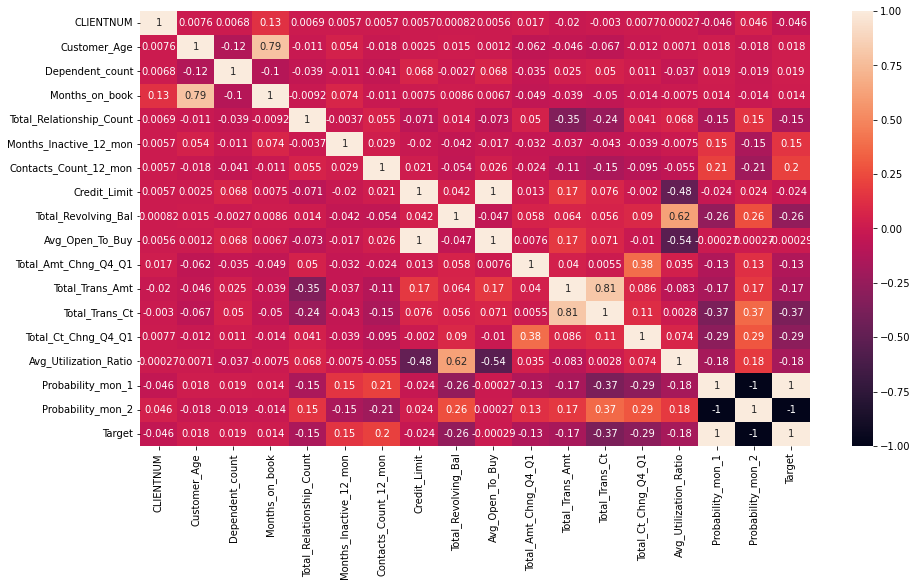

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cbar=True,annot=True)

# Numeric Columns

In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Probability_mon_1           float64
Probability_mon_2           float64
Target                        int64
dtype: object

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
df_numerical.head()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Probability_mon_1  Probability_mon_2  Target  
0                  0.061           0.000093            0.99991       0  
1                  0.105           0.000057            0.99994       0  
2                  0.000           0.000021            0.99998       0  
3                  0.760           0.000134            0.99987       0  
4                  0.000           0.000022            0.99998       0

In [ ]:
# Dropping Target Column as Numerical Column

df_numerical.drop(['Target'],axis=1,inplace = True)
df_numerical.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Probability_mon_1  Probability_mon_2  
0                  0.061           0.000093            0.99991  
1                  0.105           0.000057            0.99994  
2                  0.000           0.000021            0.99998  
3                  0.760           0.000134            0.99987  
4                  0.000           0.000022            0.99998

In [ ]:
df_numerical.shape

(10127, 17)

# Categorical Columns

In [ ]:
df_categorical =df.select_dtypes(include='object')
df_categorical.head()

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue

The Features of the dataset has been infered correctly as the Numerical or Categorical Columns. 

In [ ]:
# Adding Target Column as a Categorical Column

df_categorical['Target'] = df['Target']
df_categorical.head()

<ipython-input-17-7aa20aecef94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['Target'] = df['Target']


Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  Target  
0          Blue       0  
1          Blue       0  
2          Blue       0  
3          Blue       0  
4          Blue       0

# Check Unique Records in the Dataset

In [ ]:
print("**Unique Values By Features**")
for i in df.columns:
    unique = np.unique(df[i])
    print(i,': ',len(unique))

**Unique Values By Features**
CLIENTNUM :  10127
Attrition_Flag :  2
Customer_Age :  45
Gender :  2
Dependent_count :  6
Education_Level :  7
Marital_Status :  4
Income_Category :  6
Card_Category :  4
Months_on_book :  44
Total_Relationship_Count :  6
Months_Inactive_12_mon :  7
Contacts_Count_12_mon :  7
Credit_Limit :  6205
Total_Revolving_Bal :  1974
Avg_Open_To_Buy :  6813
Total_Amt_Chng_Q4_Q1 :  1158
Total_Trans_Amt :  5033
Total_Trans_Ct :  126
Total_Ct_Chng_Q4_Q1 :  830
Avg_Utilization_Ratio :  964
Probability_mon_1 :  1591
Probability_mon_2 :  640
Target :  2


In [ ]:
for i in df_categorical.columns:
    vc = df_categorical[i].value_counts()
    print(i,':\n',vc)

Attrition_Flag :
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender :
 F    5358
M    4769
Name: Gender, dtype: int64
Education_Level :
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status :
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category :
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category :
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
Target :
 0    8500
1    1627
Name: Target, dtype: int64


# Check Skewness of Dataset

In [ ]:
df.skew()

<ipython-input-20-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
Probability_mon_1           1.848538
Probability_mon_2          -1.848538
Target                      1.848449
dtype: float64

Credit_Limit , Avg_Open_To_Buy , Total_Amt_Chng_Q4_Q1 , Total_Trans_Amt  , Total_Ct_Chng_Q4_Q1  , Probability_mon_1 , Probability_mon_2 , Target  ARE HIGHLY SKEWED. 

CLIENTNUM , Months_Inactive_12_mon , Avg_Utilization_Ratio ARE MODERATELY SKEWED

Customer_Age , Dependent_count , Months_on_book , Total_Relationship_Count , Contacts_Count_12_mon , Total_Revolving_Bal , Total_Trans_Ct   ARE ALMOST SYMMETRICAL.

<ipython-input-21-7b8b1dccf06d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),color='blue',axlabel ='Skewness')
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

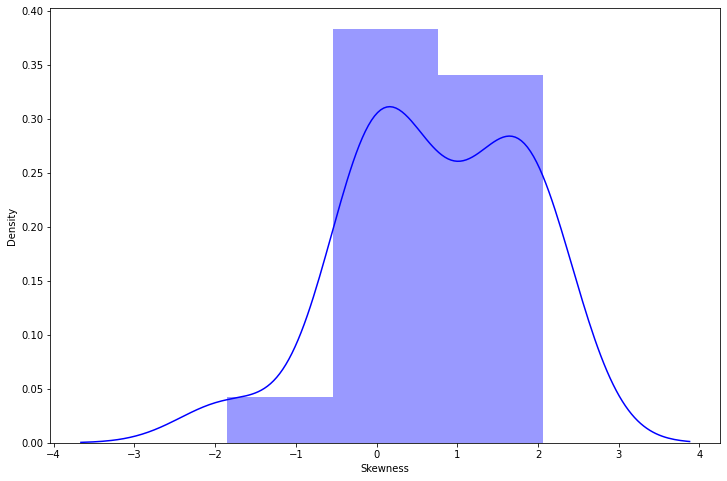

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

# Check Kurtosis of Dataset

In [ ]:
df.kurt()

<ipython-input-22-8bd0d54cd88d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


CLIENTNUM                   -0.615640
Customer_Age                -0.288620
Dependent_count             -0.683017
Months_on_book               0.400100
Total_Relationship_Count    -1.006131
Months_Inactive_12_mon       1.098523
Contacts_Count_12_mon        0.000863
Credit_Limit                 1.808989
Total_Revolving_Bal         -1.145992
Avg_Open_To_Buy              1.798617
Total_Amt_Chng_Q4_Q1         9.993501
Total_Trans_Amt              3.894023
Total_Trans_Ct              -0.367163
Total_Ct_Chng_Q4_Q1         15.689293
Avg_Utilization_Ratio       -0.794972
Probability_mon_1            1.417535
Probability_mon_2            1.417535
Target                       1.417043
dtype: float64

Contacts_Count_12_mon - Mesokurtic Distributions

Total_Amt_Chng_Q4_Q1 , Months_on_book , Months_Inactive_12_mon , Credit_Limit , Avg_Open_To_Buy , Total_Amt_Chng_Q4_Q1 , Total_Trans_Amt , Total_Ct_Chng_Q4_Q1, Probability_mon_1 , Probability_mon_2 , Target - Leptokurtic Distribution

CLIENTNUM , Customer_Age , Dependent_count , Total_Relationship_Count , Total_Revolving_Bal , Total_Trans_Ct  , Avg_Utilization_Ratio  - Platykurtic Distribution

<ipython-input-23-c86db59acea1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

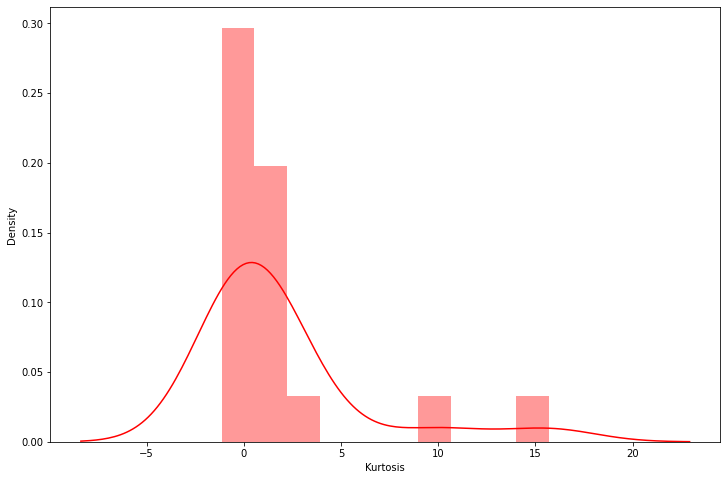

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True)

# EXPLORATORY DATA ANALYSIS ON THE FEATURES

# UNIVARIATE ANALYSIS

### 1. CLIENTNUM

<AxesSubplot:xlabel='CLIENTNUM', ylabel='Density'>

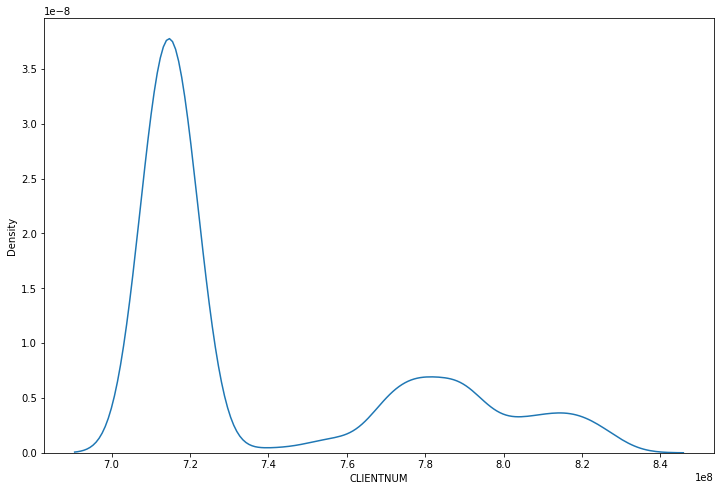

In [ ]:
plt.figure(figsize = (12,8))
sns.kdeplot(x='CLIENTNUM', data=df)

Inference - Most of the Client Numbers are ranging between 7000000000 to 7300000000.
- note: CLIENTNUM represents unique number for individual resident, so we will be droping this column in next analysis.

### 2. Attrition_Flag

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

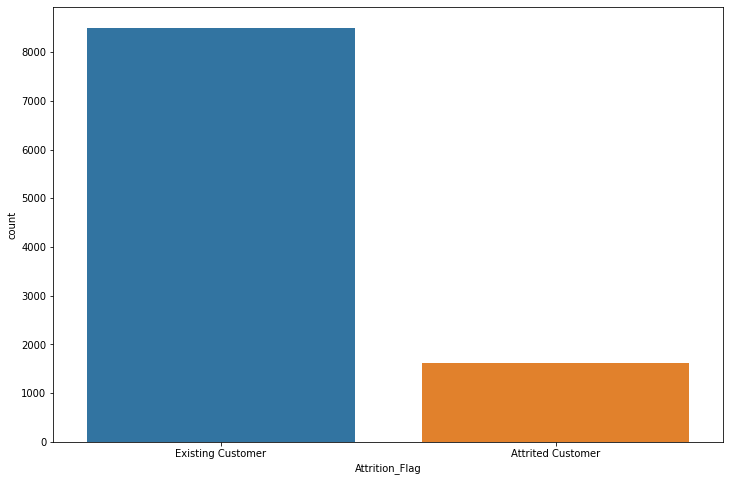

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='Attrition_Flag', data=df)

In [ ]:
df['Probability_mon_2']

0        0.999910
1        0.999940
2        0.999980
3        0.999870
4        0.999980
           ...   
10122    0.999810
10123    0.004729
10124    0.002118
10125    0.003294
10126    0.003377
Name: Probability_mon_2, Length: 10127, dtype: float64

Inference - The count of Existing Customers is 8501 while the count of Attrited Customer is around 1628.
- Note: Attrition_Flag, Probability_mon_1, Probability_mon_2 are representing the same information which is nothing but the churn information of the customer.

### 3. Customer_Age

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

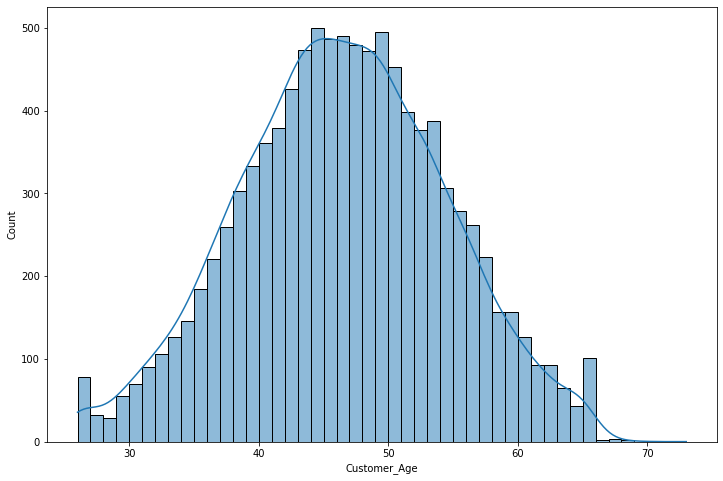

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(x='Customer_Age', data=df,kde=True)

Inference - Maximum of the Customers belong to the age gap of 40-60.

### 4. Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

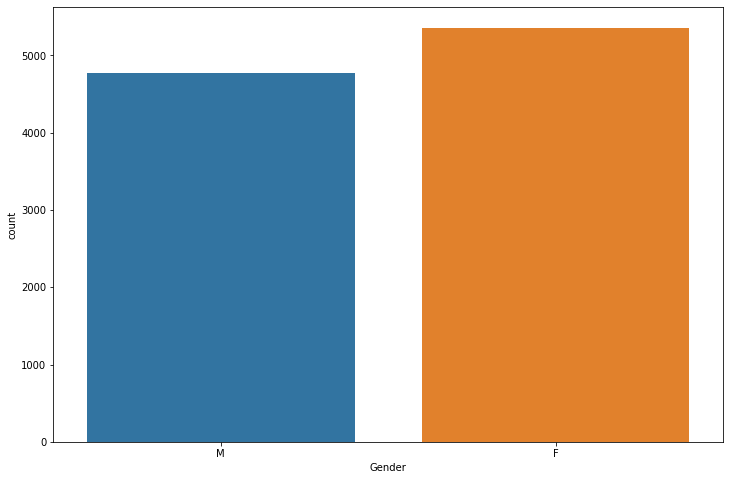

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='Gender', data=df)

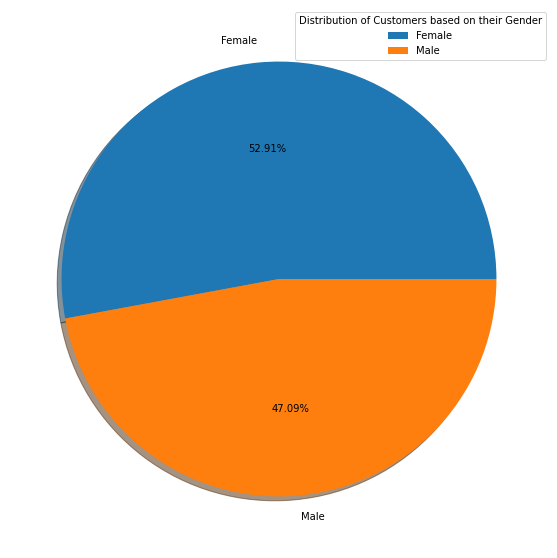

In [ ]:
plt.figure(figsize = (14,10))
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],shadow=True,autopct='%0.2f%%')
plt.legend(title = "Distribution of Customers based on their Gender")
plt.show()

Inference - The number of Female Customer are higher which is 5359 , while the number of Male Customers are lower, which is around 4770.

### 5. Dependent_count

<AxesSubplot:xlabel='Dependent_count', ylabel='Count'>

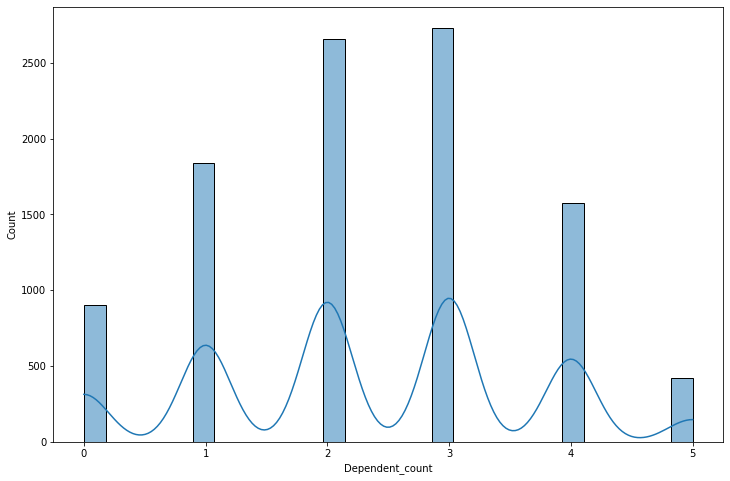

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(x='Dependent_count', data=df,kde=True)

Inference - More than 7000 customers have Dependency Count of 1 or higher.

### 6. Education_Level

In [ ]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

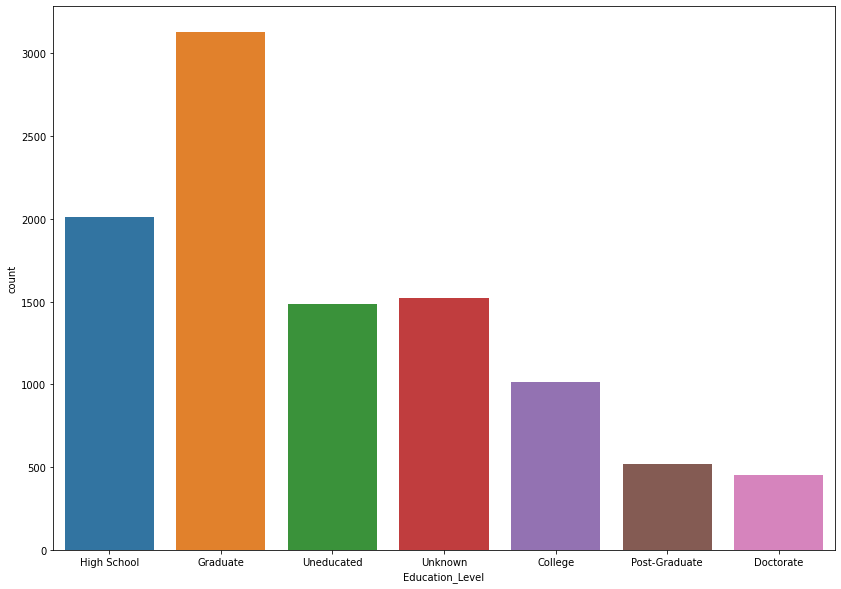

In [ ]:
plt.figure(figsize = (14,10))
sns.countplot(x='Education_Level', data=df)

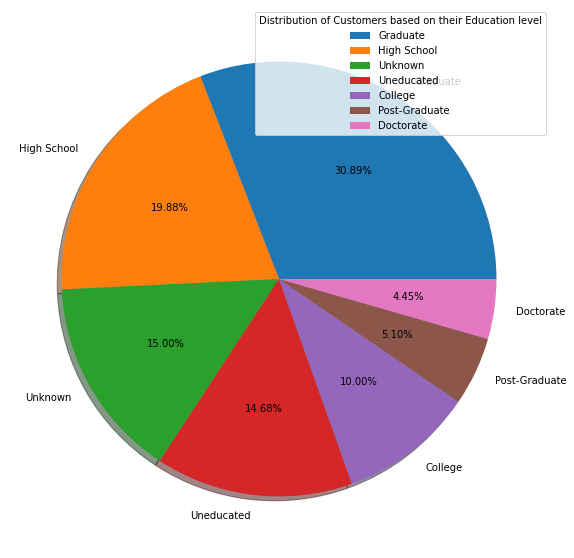

In [ ]:
plt.figure(figsize = (14,10))
plt.pie(df['Education_Level'].value_counts(),labels=['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate']
,shadow=True,autopct='%0.2f%%')
plt.legend(title = "Distribution of Customers based on their Education level")
plt.show()

It can be concluded that among the customers, when compared to others, graduates are more in number with 3128 being graduates which accounts to almost 31% of the total customers. Also, Doctrates are least in number ie 451 out of 10127 customers which accounts to almost 5% of total.

### 7. Marital_Status

In [ ]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

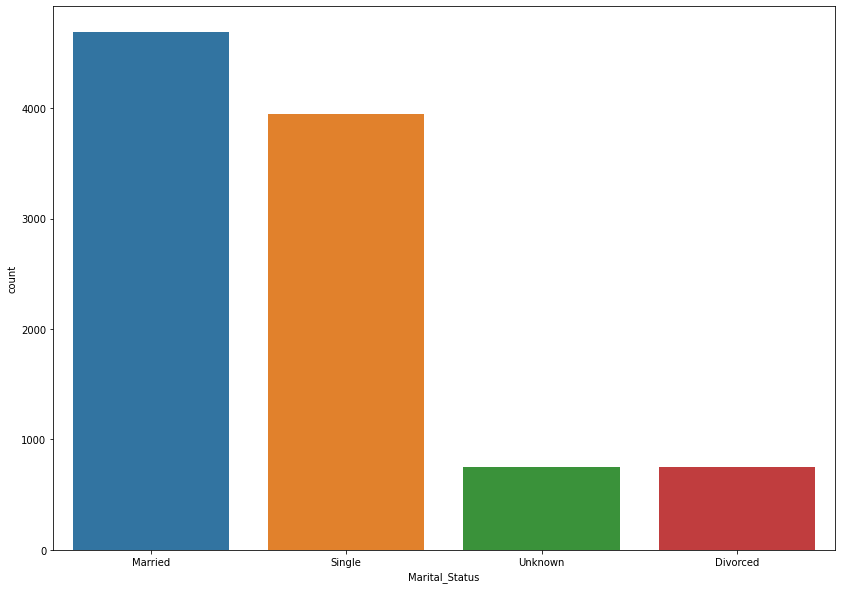

In [ ]:
plt.figure(figsize = (14,10))
sns.countplot(x='Marital_Status', data=df)

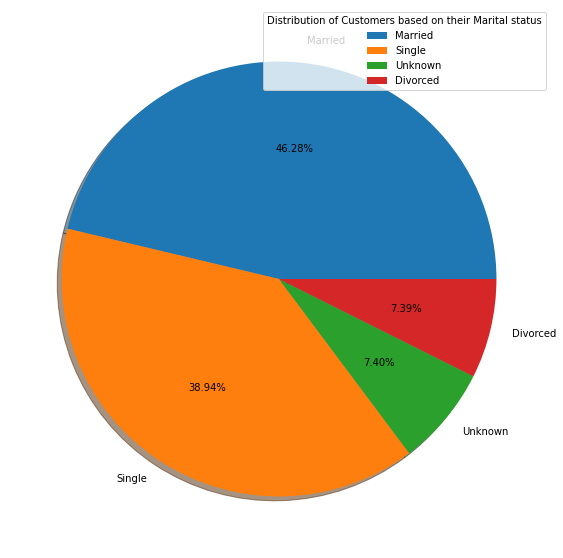

In [ ]:
plt.figure(figsize = (14,10))
plt.pie(df['Marital_Status'].value_counts(),labels=['Married','Single','Unknown','Divorced'],shadow=True,autopct='%0.2f%%')
plt.legend(title = "Distribution of Customers based on their Marital status")
plt.show()

It can be concluded that among the customers, married ones are more in number with 4687 customers being married which accounts to approximately 46% of the total customersand Customers who are 'divorced' and whose marital status is unknown are almost equal in number ie 748 and 749 out of 10127 customers repectively, where each of them account to approximately 7.4% of total. 

### 8. Income_Category

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

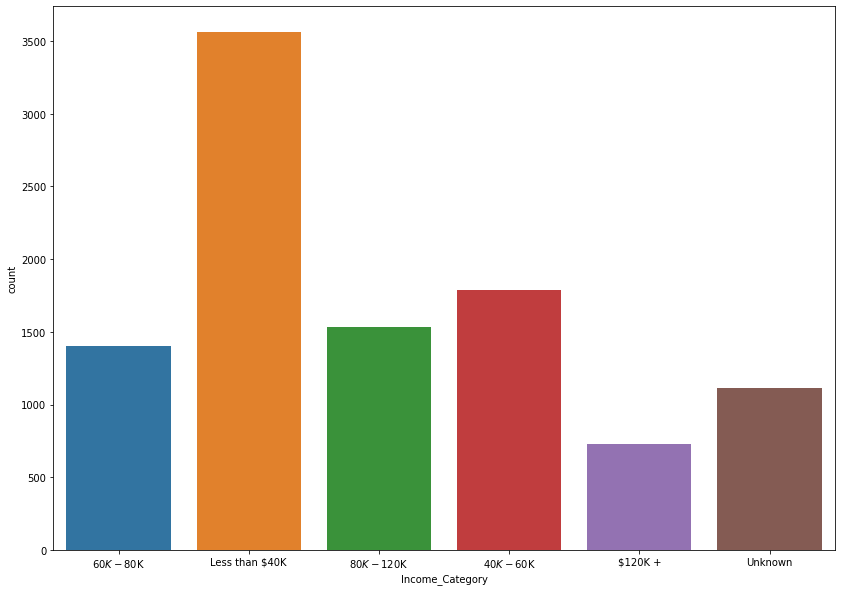

In [ ]:
plt.figure(figsize = (14,10))
sns.countplot(x='Income_Category', data=df)

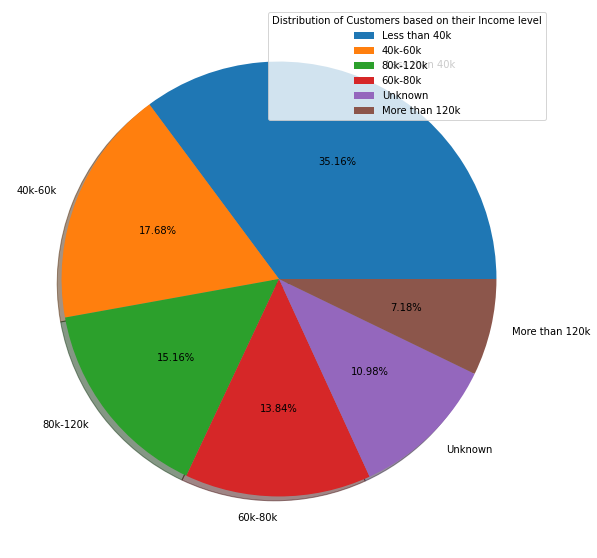

In [ ]:
plt.figure(figsize = (14,10))
plt.pie(df['Income_Category'].value_counts(),labels=['Less than 40k','40k-60k','80k-120k','60k-80k','Unknown','More than 120k'],shadow=True,autopct='%0.2f%%')
plt.legend(title = "Distribution of Customers based on their Income level")
plt.show()

It can be concluded that among the customers, the ones belonging to 'Less than 40k' category are more in number with 3561 customers which accounts to approximately 35% of the total customers. Also, the ones belonging to 'More than 120k' category are less in number with 727 customers which accounts to approximately 7% of the total customers.

### 9. Card_Category

In [ ]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

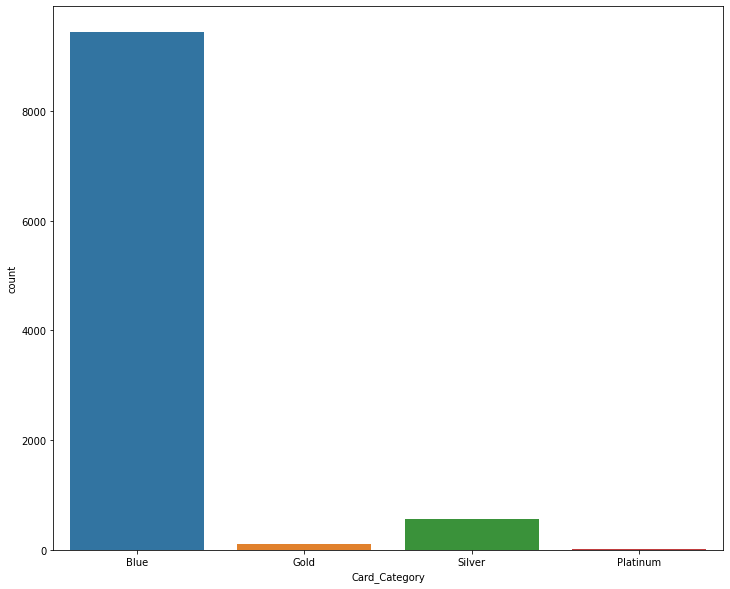

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(x='Card_Category', data=df)

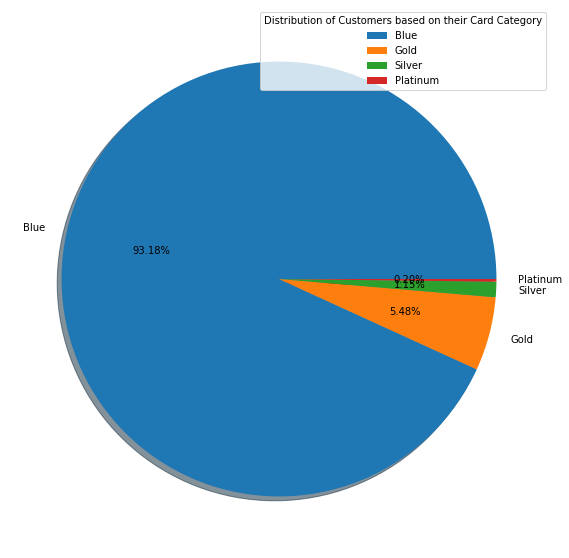

In [ ]:
plt.figure(figsize = (14,10))
plt.pie(df['Card_Category'].value_counts(),labels=['Blue','Gold','Silver','Platinum'],shadow=True,autopct='%0.2f%%')
plt.legend(title = "Distribution of Customers based on their Card Category")
plt.show()

It can be concluded that among the customers, the ones who possess 'Blue' card are majority in number comprising of 9436 customers which accounts to approximately 93% of the total customers and the ones who possess 'Platinum' card are least in number comprising of only 20 customers which accounts to only 0.2% of the total customers. Also, it can be concluded that the information about the kind of card owned by every customer is known i.e., there is no customer who belongs to 'Unknown' category.

### 10. Months_on_book

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

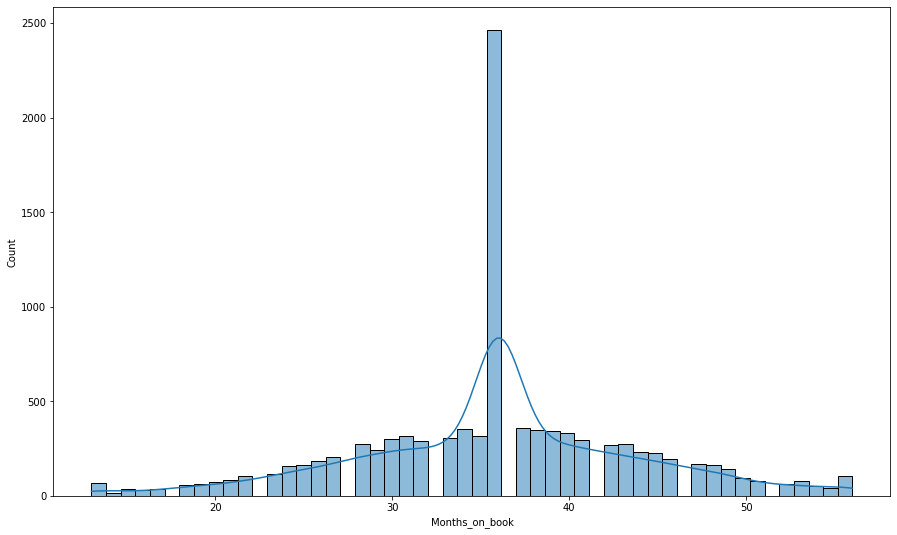

In [ ]:
plt.figure(figsize = (15,9))
sns.histplot(x='Months_on_book', data=df,kde=True)

In [ ]:
df['Months_on_book'].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

'Months on book' of a customer represents the time (in months) for which the customer is associated with the bank the range of   which varies from 13 months (minimum) to 56 months (maximum).
It can be concluded that majority of the customers are associated with the bank for a period of approximately 36 months.

### 11. Total_Relationship_Count

In [ ]:
Total_Relationship_Count = df['Total_Relationship_Count']

In [ ]:
Tot_R_C = df['Total_Relationship_Count'].value_counts().sort_index()
Tot_R_C

1     910
2    1243
3    2305
4    1912
5    1891
6    1866
Name: Total_Relationship_Count, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


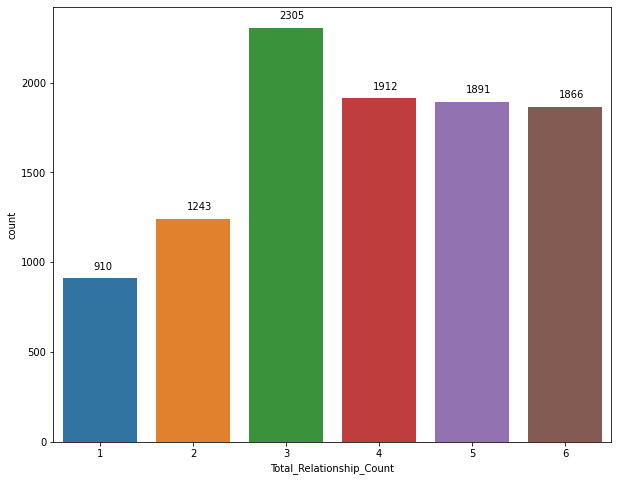

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(Total_Relationship_Count)
for x,y in zip(range(6),Tot_R_C):
    plt.text(x=x-0.07,y=y+50,s=str(y))
plt.show()

Inference-more than 2000 customers have a relationship count of 3

### 12. Months_Inactive_12_mon

In [ ]:
Months_Inactive_12_mon = df['Months_Inactive_12_mon']

In [ ]:
M_I = Months_Inactive_12_mon.value_counts().sort_index()
M_I

0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
Name: Months_Inactive_12_mon, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


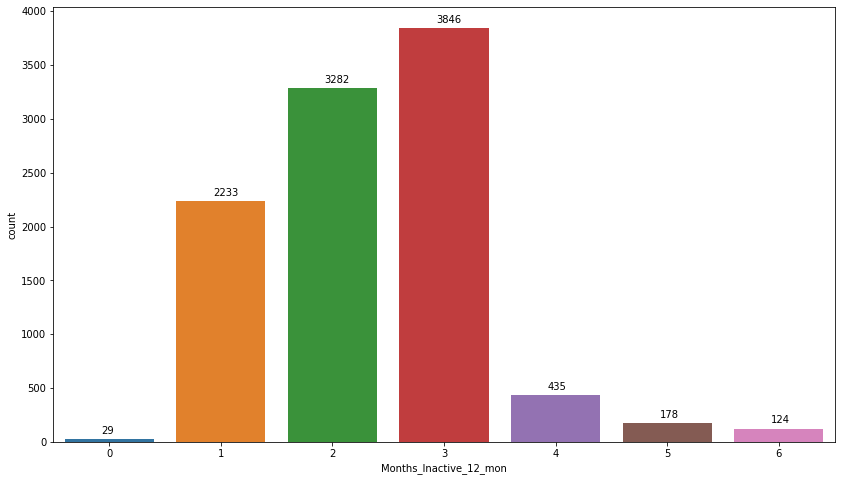

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(Months_Inactive_12_mon)
for x,y in zip(range(7),M_I):
    plt.text(x=x-0.07,y=y+50,s=str(y))
plt.show()

Inference-more than 3500 customers are inactive for a total of 3 months in a year and more than 3000 customers are inactive for a total of 2 months a year and only 29 customers are active throughout the year.

### 13. Contacts_Count_12_mon

In [ ]:
Contacts_Count_12_mon = df['Contacts_Count_12_mon']

In [ ]:
C_C = Contacts_Count_12_mon.value_counts().sort_index()
C_C

0     399
1    1499
2    3227
3    3380
4    1392
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


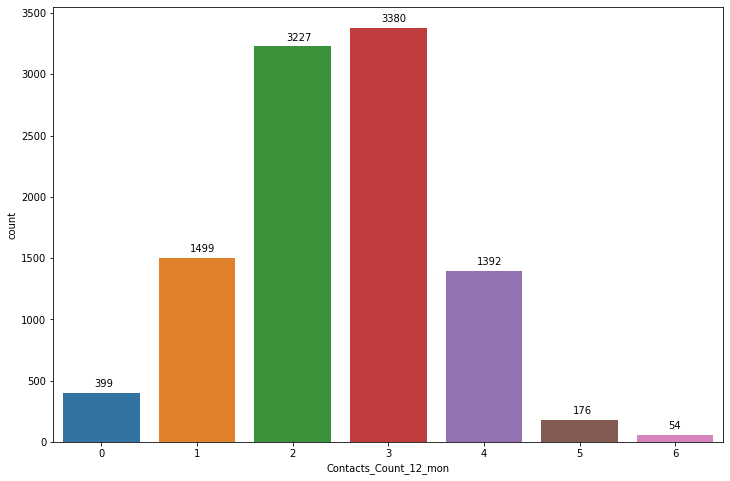

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(Contacts_Count_12_mon)
for x,y in zip(range(7),C_C):
    plt.text(x=x-0.07,y=y+50,s=str(y))
plt.show()

Inference-more than 7000 customers have a contact count of 2 or higher over a year.

### 14. Credit_Limit

In [ ]:
Credit_Limit = df['Credit_Limit']

In [ ]:
Credit_Limit.value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

Skewness: 1.666725807993647


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


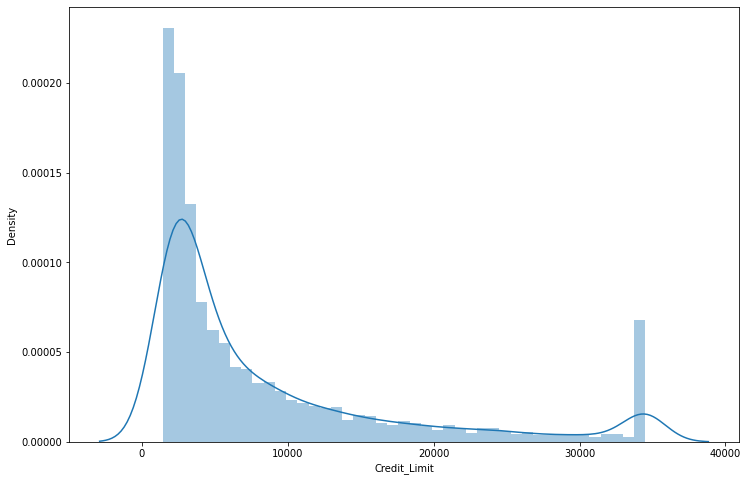

In [ ]:
plt.figure(figsize=(12,8))
print("Skewness:",Credit_Limit.skew())
sns.distplot(Credit_Limit)
plt.show()

Inference-By observing the distribution of Credit Limit,we can say that Credit Limit is Positively Skewed and the credit limit of most of the customers is less than 10000.

In [ ]:
mode = Credit_Limit.mode()
mode

0    34516.0
dtype: float64

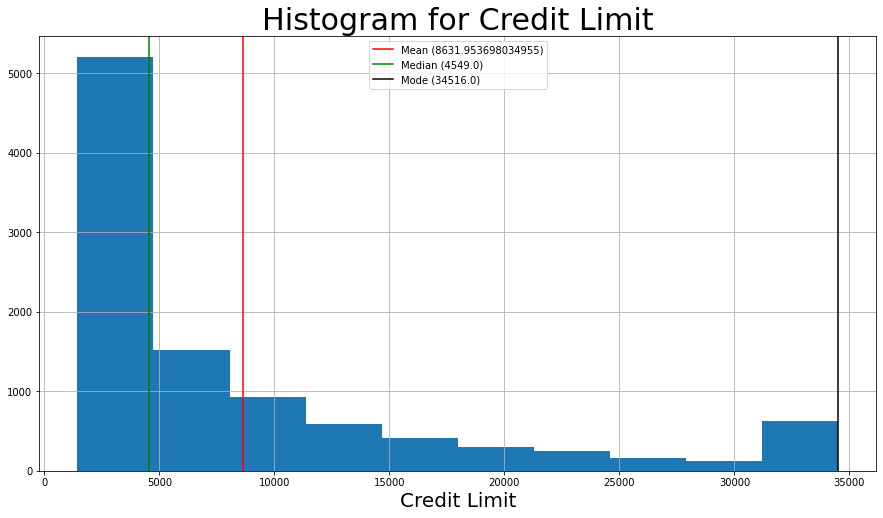

In [ ]:
plt.figure(figsize=(15,8))
Credit_Limit.hist(bins=10)
mean=Credit_Limit.mean()
median=Credit_Limit.median()
mode=Credit_Limit.mode()[0]
plt.axvline(mean,label=f'Mean ({mean})',color='r')
plt.axvline(median,label=f'Median ({median})',color='g')
plt.axvline(mode,label=f'Mode ({mode})',color='k')
plt.xlabel('Credit Limit',fontsize=20)
plt.legend()
plt.title("Histogram for Credit Limit",fontsize=30)
plt.show()

Inference-From the Histogram above,we can see that Mode is the highest among the measures of Central Tendency which means highest number of customers have the greatest credit limit and mean is greater than the median which indicates the positive skewness in the data.

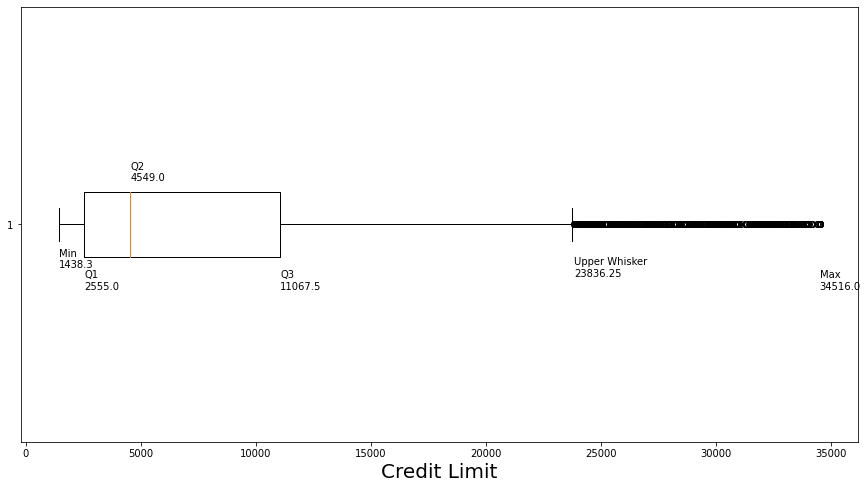

In [ ]:
plt.figure(figsize=(15,8))
iqr=Credit_Limit.quantile(0.75)-Credit_Limit.quantile(0.25)
upper_whisker=((Credit_Limit.quantile(0.75))+1.5*iqr)
plt.boxplot(Credit_Limit,vert=False)
plt.xlabel('Credit Limit',fontsize=20)
plt.text(x=Credit_Limit.quantile(0.75),y=0.85,s="Q3\n"+str(Credit_Limit.quantile(0.75)))
plt.text(x=Credit_Limit.quantile(0.25),y=0.85,s="Q1\n"+str(Credit_Limit.quantile(0.25)))
plt.text(x=Credit_Limit.quantile(0.50),y=1.1,s="Q2\n"+str(Credit_Limit.quantile(0.50)))
plt.text(x=Credit_Limit.min(),y=0.9,s="Min\n"+str(Credit_Limit.min()))
plt.text(x=Credit_Limit.max(),y=0.85,s="Max\n"+str(Credit_Limit.max()))
plt.text(x=upper_whisker,y=0.88,s="Upper Whisker\n"+str(upper_whisker))
plt.show()

From the above boxplot,we can observe that the outliers are present in the data,most of them exist above upper whisker. The outliers can affect the performance of various machine learning models.Thus it is necessary to deal with the outliers before building the model.

### 15. Total_Revolving_Bal

In [ ]:
Total_Revolving_Bal = df['Total_Revolving_Bal']

In [ ]:
Total_Revolving_Bal.value_counts()

0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

Skewness: -0.14883725028007228


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


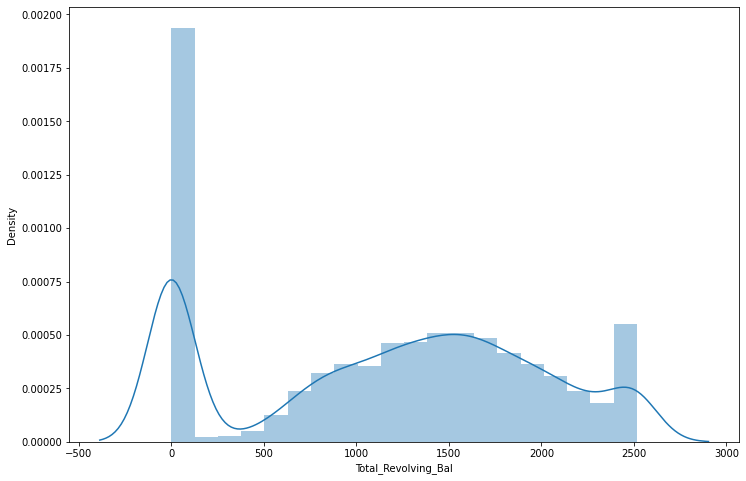

In [ ]:
plt.figure(figsize=(12,8))
print("Skewness:",Total_Revolving_Bal.skew())
sns.distplot(Total_Revolving_Bal)
plt.show()

Inference-by observing the distribution of revolving balance,we can see that it is neither positively skewed nor negatively skewed

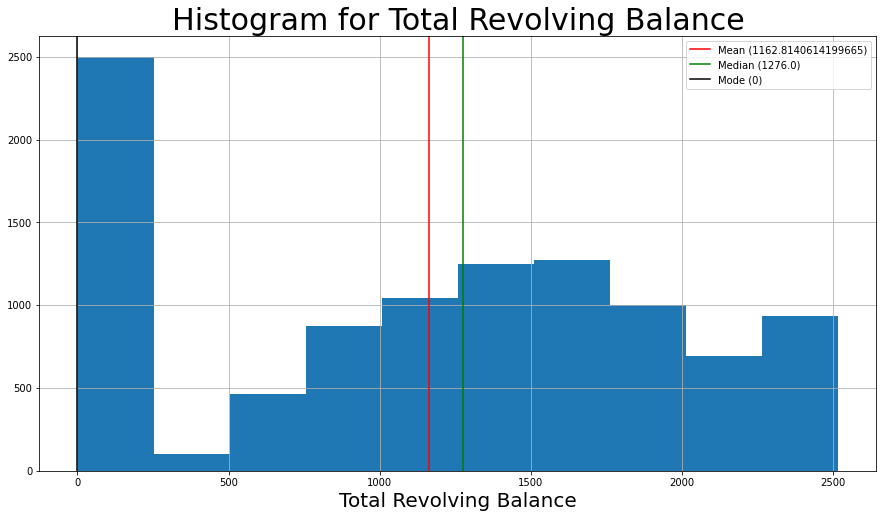

In [ ]:
plt.figure(figsize=(15,8))
Total_Revolving_Bal.hist(bins=10)
mean=Total_Revolving_Bal.mean()
median=Total_Revolving_Bal.median()
mode=Total_Revolving_Bal.mode()[0]
plt.axvline(mean,label=f'Mean ({mean})',color='r')
plt.axvline(median,label=f'Median ({median})',color='g')
plt.axvline(mode,label=f'Mode ({mode})',color='k')
plt.xlabel('Total Revolving Balance',fontsize=20)
plt.legend()
plt.title("Histogram for Total Revolving Balance",fontsize=30)
plt.show()

Inference-By observing the above Histogram,we can see that mode being 0 indicates that most number of people pay their credit card due on time and median>mean>mode does not indicate any kind of skewness in the data.

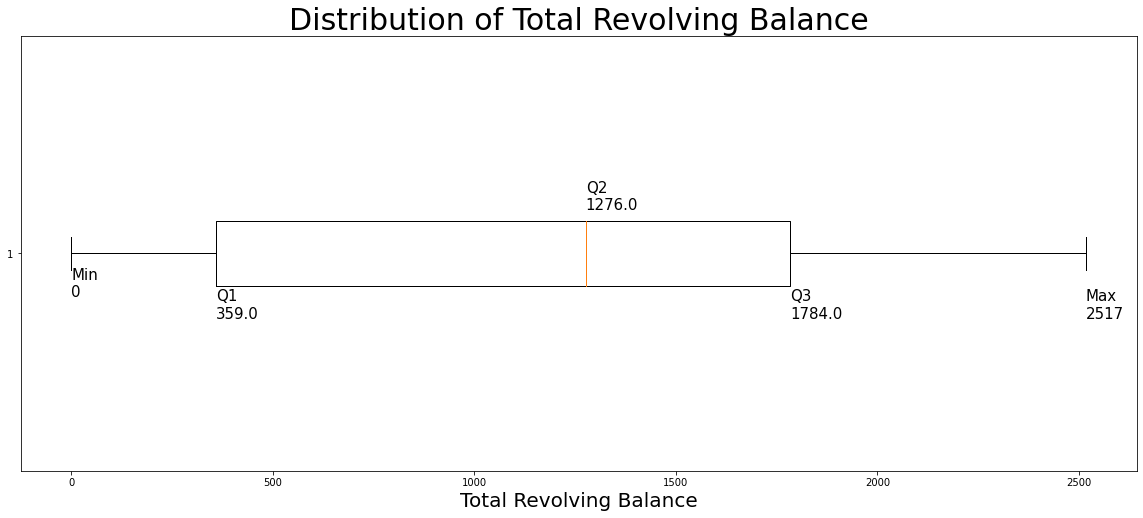

In [ ]:
plt.figure(figsize=(20,8))
iqr=Total_Revolving_Bal.quantile(0.75)-Total_Revolving_Bal.quantile(0.25)
plt.boxplot(Total_Revolving_Bal,vert=False)
plt.xlabel('Total Revolving Balance',fontsize=20)
plt.text(x=Total_Revolving_Bal.quantile(0.75),y=0.85,s="Q3\n"+str(Total_Revolving_Bal.quantile(0.75)),fontsize=15)
plt.text(x=Total_Revolving_Bal.quantile(0.25),y=0.85,s="Q1\n"+str(Total_Revolving_Bal.quantile(0.25)),fontsize=15)
plt.text(x=Total_Revolving_Bal.quantile(0.50),y=1.1,s="Q2\n"+str(Total_Revolving_Bal.quantile(0.50)),fontsize=15)
plt.text(x=Total_Revolving_Bal.min(),y=0.9,s="Min\n"+str(Total_Revolving_Bal.min()),fontsize=15)
plt.text(x=Total_Revolving_Bal.max(),y=0.85,s="Max\n"+str(Total_Revolving_Bal.max()),fontsize=15)
plt.title('Distribution of Total Revolving Balance',fontsize=30)
plt.show()

Inference-By observing the boxplot,we can see that there are no outliers present in the data.

### 16. Avg_Open_To_Buy

In [ ]:
def simple_eda(col_name):
    print(f"============================COLUMN NAME : {col_name} =============================")
    print("====> min value", df[col_name].min(), "====> max value", df[col_name].max())

    print("====> MEAN", df[col_name].mean(), "====> MEDIAN", df[col_name].median())

    Q1 = df[col_name].quantile(q=0.25)
    print("====> Q1", Q1)

    Q3 = df[col_name].quantile(q=0.75)
    print("====> Q3", Q3)

    IQR = Q3-Q1
    print("====> IQR", IQR)

    Lower_boundary = Q1 - 1.5 * IQR
    Upper_bounday = Q3 +  1.5 * IQR
    print("====>Lower_boundary :",Lower_boundary, "====>Upper_bounday:",Upper_bounday)

    plt.figure(figsize = (12,10))
    sns.histplot(df[col_name], kde=True)
    plt.title("HIST PLOT")
    print()
    print("====> from the hist plot, it looks like data is skewed and have outliers as well.")
    print("====> skewness: ", df[col_name].skew())

    plt.figure(figsize = (12,10))
    sns.boxplot(df[col_name], orient='h')
    plt.title("BOX PLOT")

============================COLUMN NAME : Avg_Open_To_Buy =============================
====> min value 3.0 ====> max value 34516.0
====> MEAN 7469.139636614989 ====> MEDIAN 3474.0
====> Q1 1324.5
====> Q3 9859.0
====> IQR 8534.5
====>Lower_boundary : -11477.25 ====>Upper_bounday: 22660.75

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  1.6616965459311595


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


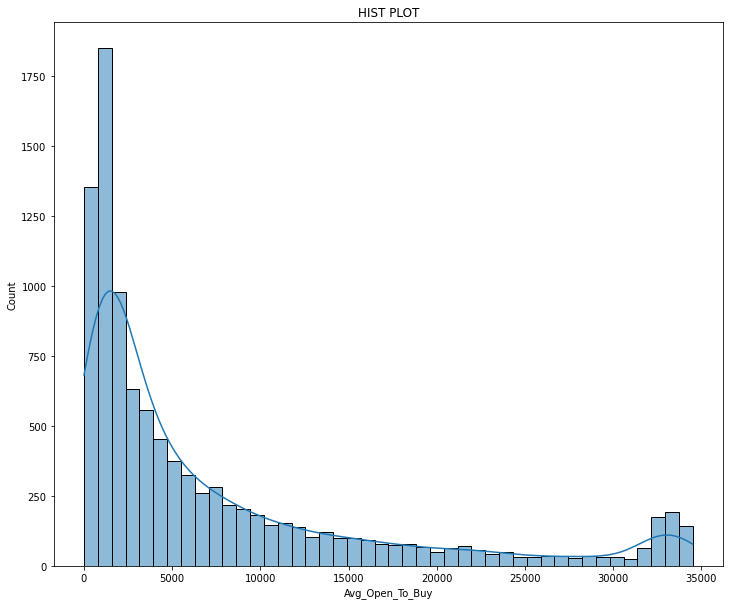

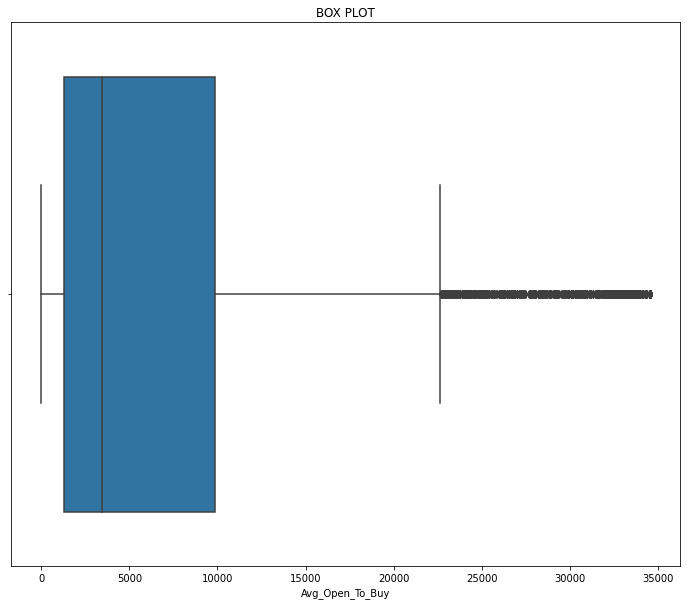

In [ ]:
simple_eda("Avg_Open_To_Buy")

Inference: Avg_Open_To_Buy might contain outliers and most of the data is between 0-10,000

### 17. Total_Amt_Chng_Q4_Q1

============================COLUMN NAME : Total_Amt_Chng_Q4_Q1 =============================
====> min value 0.0 ====> max value 3.397
====> MEAN 0.7599406536980349 ====> MEDIAN 0.736
====> Q1 0.631
====> Q3 0.859
====> IQR 0.22799999999999998
====>Lower_boundary : 0.28900000000000003 ====>Upper_bounday: 1.201

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  1.7320634114286038


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


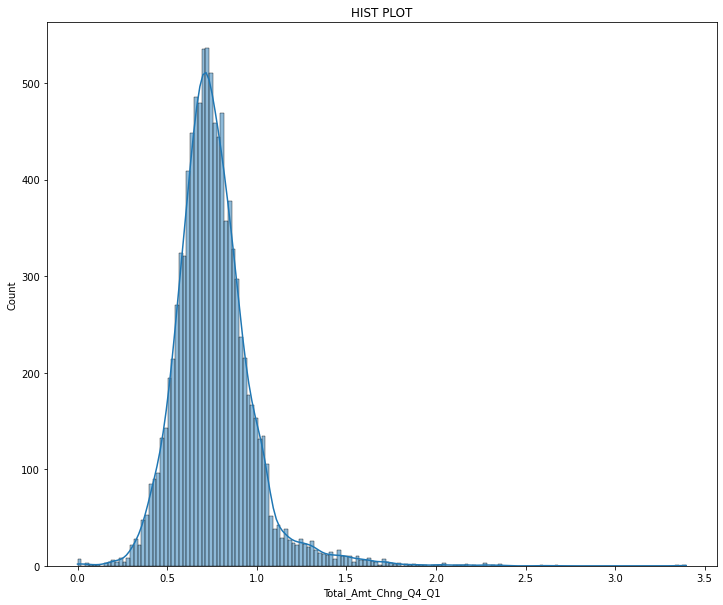

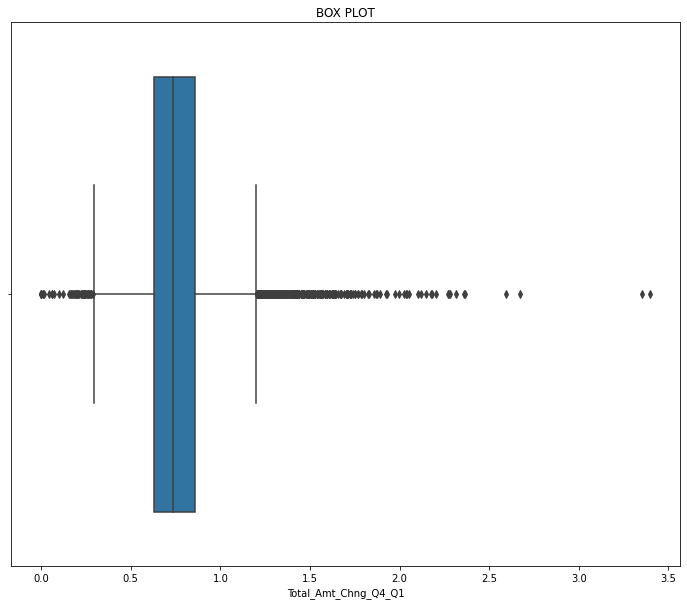

In [ ]:
simple_eda("Total_Amt_Chng_Q4_Q1")

Inference: Total_Amt_Chng_Q4_Q1 might contain outliers and most of the data is between ~0.3-1.2 and follows normal distribution

### 18. Total_Trans_Amt

============================COLUMN NAME : Total_Trans_Amt =============================
====> min value 510 ====> max value 18484
====> MEAN 4404.086303939963 ====> MEDIAN 3899.0
====> Q1 2155.5
====> Q3 4741.0
====> IQR 2585.5
====>Lower_boundary : -1722.75 ====>Upper_bounday: 8619.25

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  2.0410034025756936


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


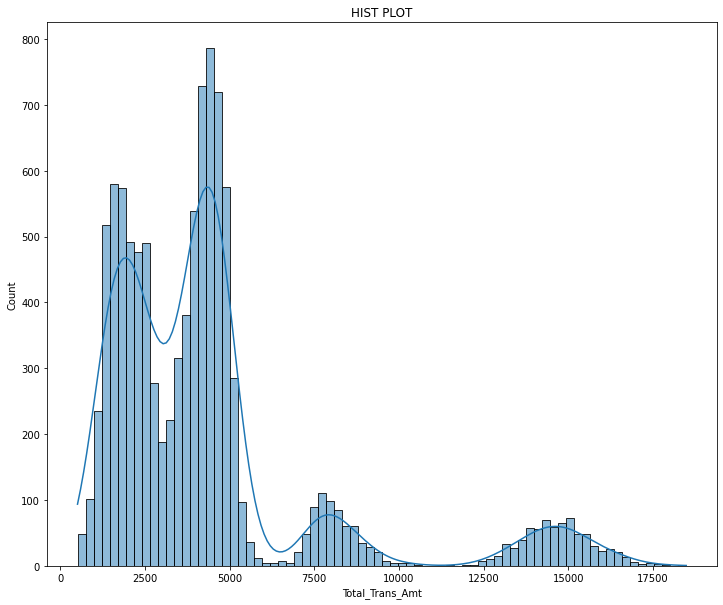

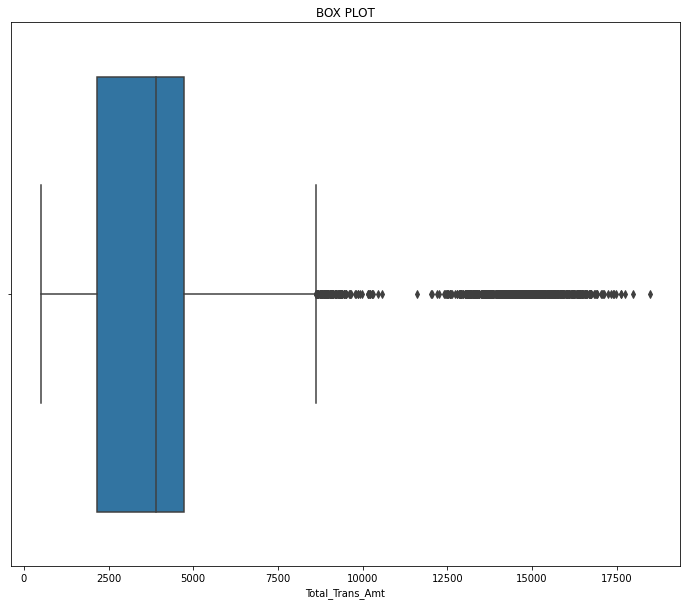

In [ ]:
simple_eda("Total_Trans_Amt")

Inference: Total_Trans_Amt might contain outliers and it does not follow the normal distribution.

### 19. Total_Trans_Ct

============================COLUMN NAME : Total_Trans_Ct =============================
====> min value 10 ====> max value 139
====> MEAN 64.85869457884863 ====> MEDIAN 67.0
====> Q1 45.0
====> Q3 81.0
====> IQR 36.0
====>Lower_boundary : -9.0 ====>Upper_bounday: 135.0

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  0.15367306849872275


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


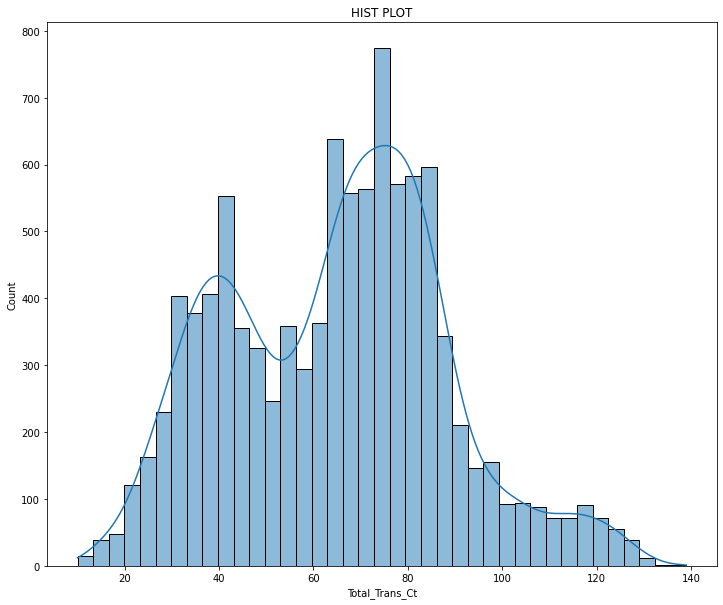

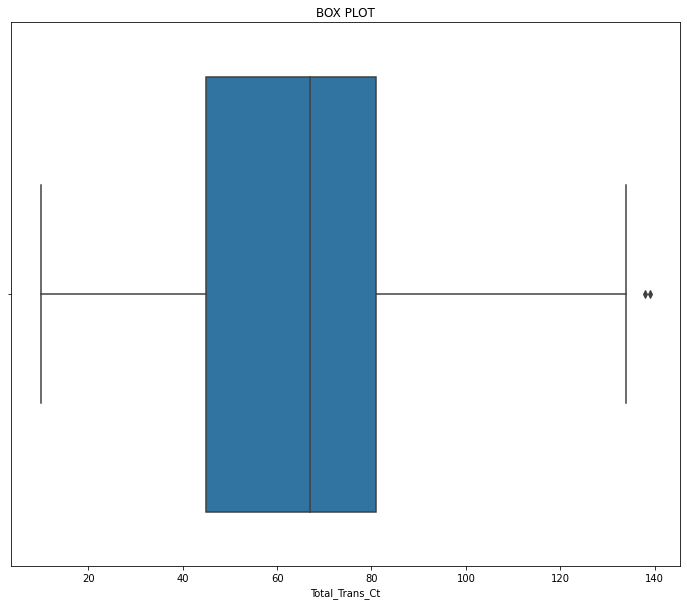

In [ ]:
simple_eda("Total_Trans_Ct")

Inference: Total_Trans_Ct might contain outliers but it seems very low. Also, it is slightly skewed on right side and it follows the normal distribution

### 20. Total_Ct_Chng_Q4_Q1

============================COLUMN NAME : Total_Ct_Chng_Q4_Q1 =============================
====> min value 0.0 ====> max value 3.714
====> MEAN 0.7122223758269972 ====> MEDIAN 0.702
====> Q1 0.582
====> Q3 0.818
====> IQR 0.236
====>Lower_boundary : 0.22799999999999998 ====>Upper_bounday: 1.172

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  2.0640305679077477


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


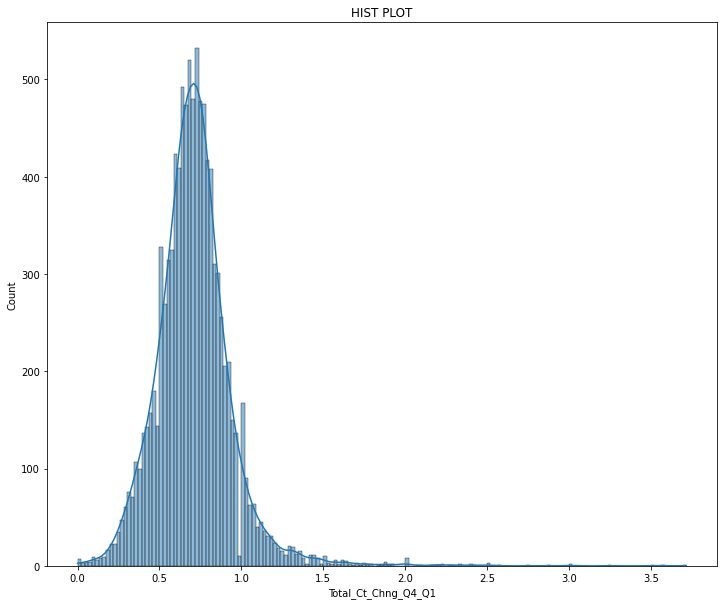

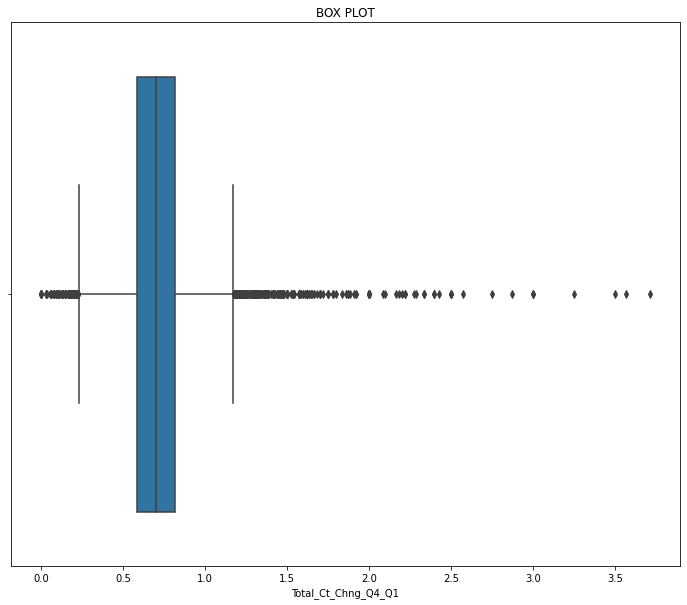

In [ ]:
simple_eda("Total_Ct_Chng_Q4_Q1")

Inference: Total_Ct_Chng_Q4_Q1 might contain outliers. Also, it is slightly skewed on right side and it follows the normal distribution

### 21. Avg_Utilization_Ratio

In [ ]:
df['Avg_Utilization_Ratio'].value_counts()

0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.927       1
0.935       1
0.954       1
0.385       1
0.009       1
Name: Avg_Utilization_Ratio, Length: 964, dtype: int64

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Density'>

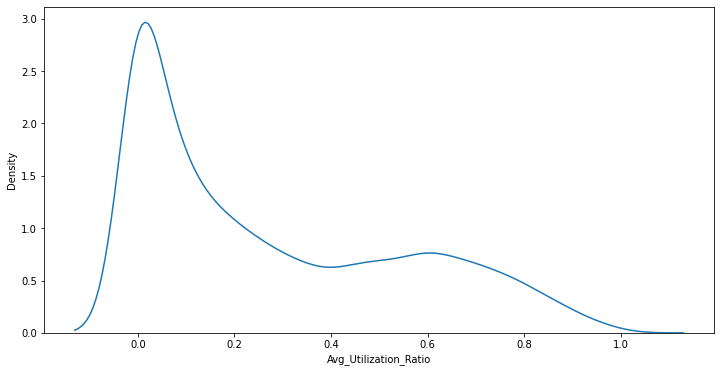

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x='Avg_Utilization_Ratio', data=df)

Inference - The average utilization ratio of the credit card is clustered around 0 to 0.2. whereas it is drastically falling as it is nearing to 1. This indicated that the usage of credit card is very low.

### 22. Probability_mon_1

In [ ]:
df['Probability_mon_1'].value_counts()

0.000199    80
0.000314    78
0.000303    77
0.000187    73
0.000114    71
            ..
0.000936     1
0.997660     1
0.000143     1
0.000466     1
0.996620     1
Name: Probability_mon_1, Length: 1591, dtype: int64

<AxesSubplot:xlabel='Probability_mon_1', ylabel='Density'>

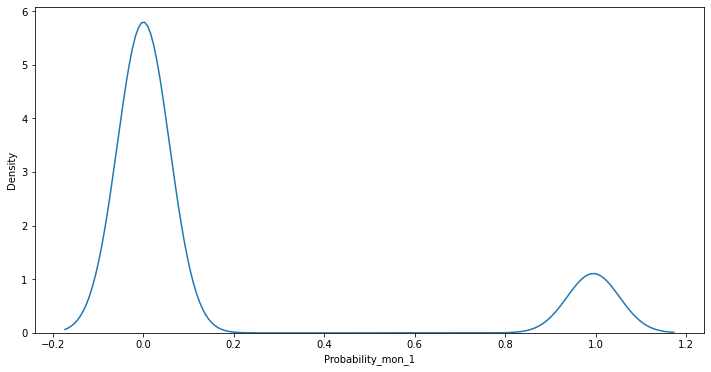

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x='Probability_mon_1', data=df)

Inference - The values of probability of the customer churning is more around 0 which indicates that the event of churning is an unlikely event. Thus we can infer that people are less tending to churn.

## 23. Probability_mon_2

In [ ]:
df['Probability_mon_2'].value_counts()

0.999890    631
0.999940    551
0.999810    478
0.999900    452
0.999930    394
           ... 
0.000967      1
0.003262      1
0.009370      1
0.016310      1
0.003377      1
Name: Probability_mon_2, Length: 640, dtype: int64

<AxesSubplot:xlabel='Probability_mon_2', ylabel='Density'>

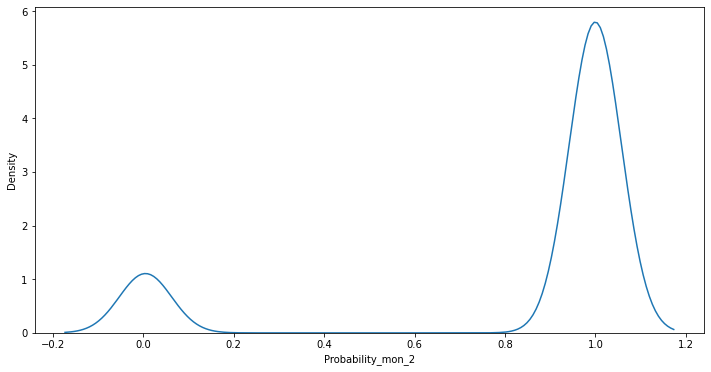

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x='Probability_mon_2', data=df)

Inference - The values of probability of the customer churning is more around 0 which indicates that the event of churning is an unlikely event. Thus we can infer that people are less tending to churn.

## 24. Target

<AxesSubplot:xlabel='Target', ylabel='Density'>

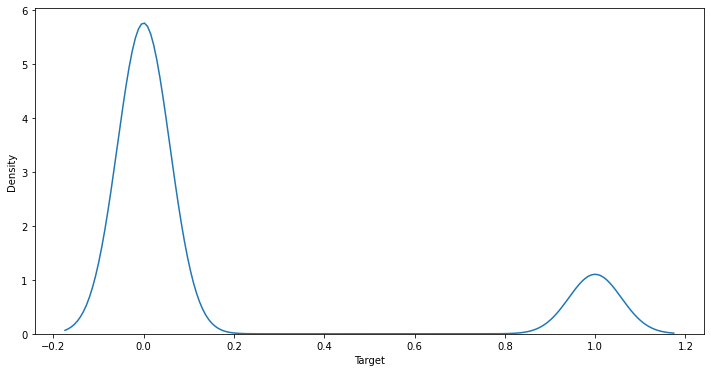

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x='Target', data=df)

<AxesSubplot:xlabel='Target', ylabel='count'>

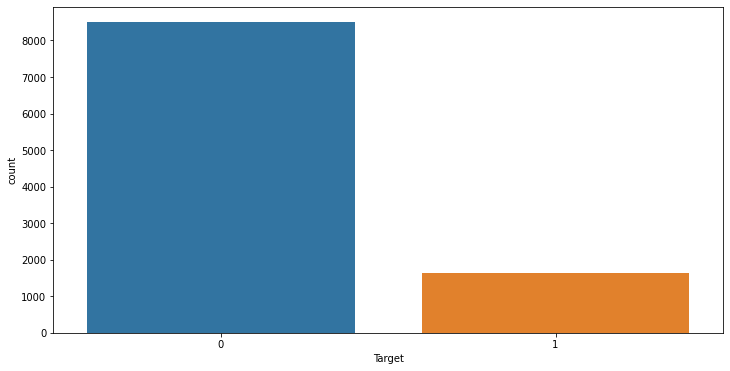

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Target', data=df)

# BIVARIATE ANALYSIS

# BIVARIATE ANALYSIS OF NUMERICAL-NUMERICAL COLUMNS

In [ ]:
df_numerical.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Probability_mon_1', 'Probability_mon_2'],
      dtype='object')

## How does Customer Age affect the Dependent Count ?

<AxesSubplot:xlabel='Customer_Age', ylabel='Dependent_count'>

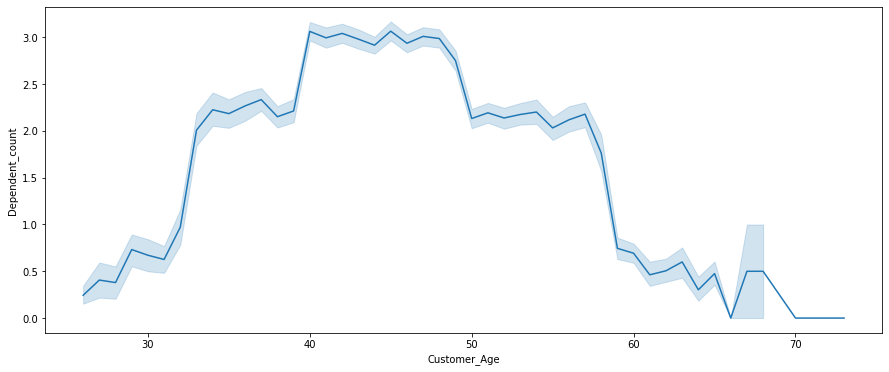

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Customer_Age',y='Dependent_count',data=df)

Inference - Customer in the Age Group of 33 to 58 have the maximum number of Dependent Counts which is in between 2 to 5. 

## How does Customer Age affect the Period of relationship of the customer and the bank ?

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

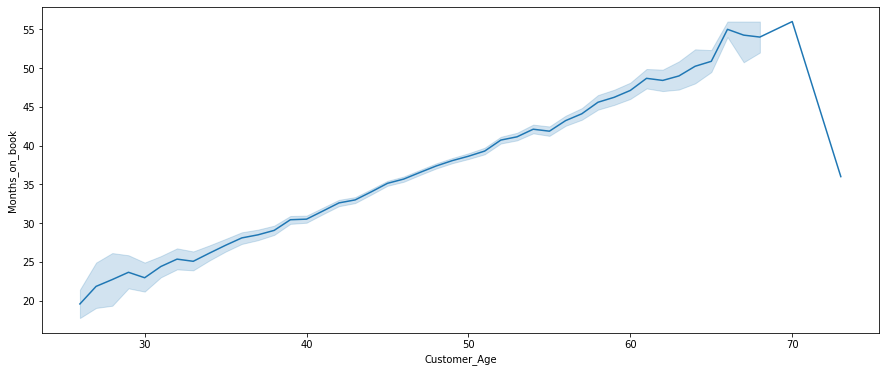

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Customer_Age',y='Months_on_book',data=df)

Inference - From the above graph, we can clearly observe that with an increase in the customer age the period of their relationship with the bank has also increased. 

## How does Customer Age affect the Total no. of products held by the customer ?

<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Relationship_Count'>

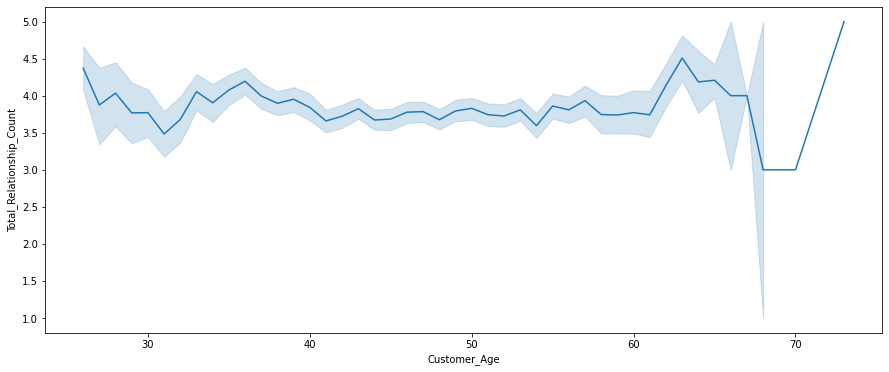

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Customer_Age',y='Total_Relationship_Count',data=df)

Inference - Customer Age does not affect much the total number of products which the customer holds in the bank.

## How does Customer Age affect the Credit Limit of the customer ?

<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

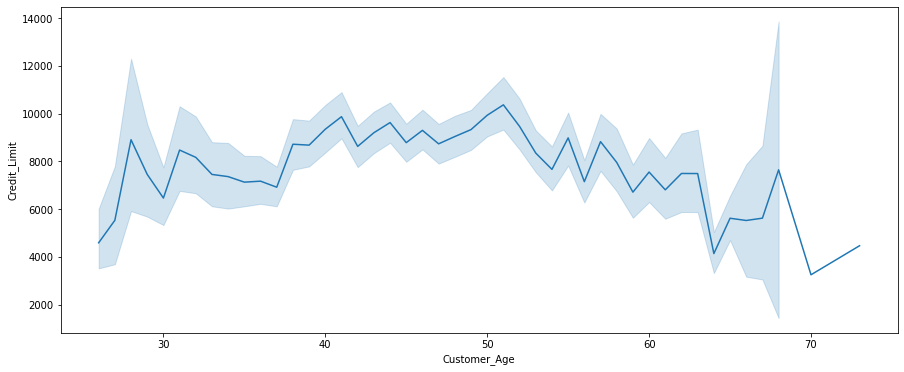

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Customer_Age',y='Credit_Limit',data=df)

Inference - Customer Age does not affect much the credit limit of the customer in the bank.

## How does Customer Age affect the Average Card Utilization Ratio ?

<AxesSubplot:xlabel='Customer_Age', ylabel='Avg_Utilization_Ratio'>

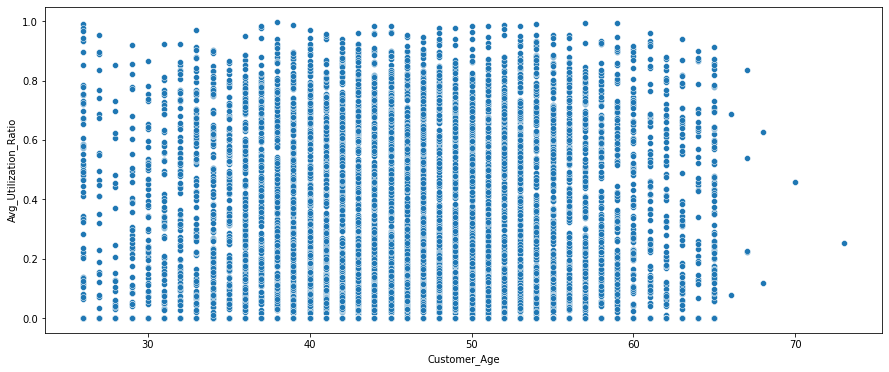

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='Customer_Age',y='Avg_Utilization_Ratio',data=df)

Inference - Customer Age does not affect the Average Card Utilization Ratio.

## How does No. of months inactive of customers affect the No. of Contacts in the last 12 months made to the customer?

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Months_Inactive_12_mon'>

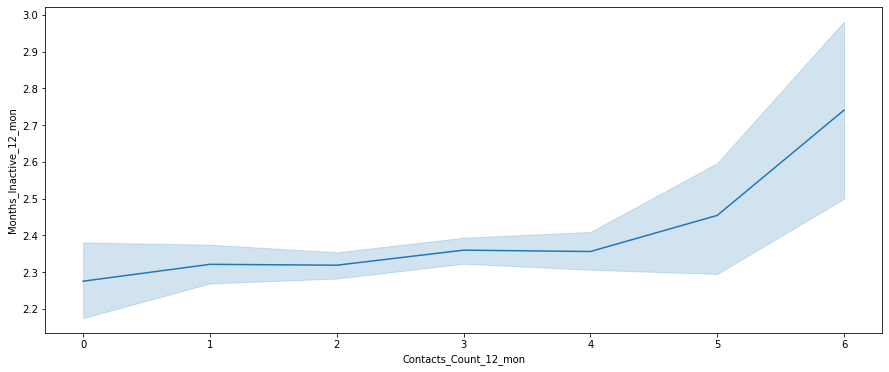

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(y='Months_Inactive_12_mon',x='Contacts_Count_12_mon',data=df)

Inference - Contacts made to the customer has steadily increased with the number of months the customer has been inactive for.

## How does the Credit Limit affect the fact that the customer is open to buy Credit Line ?

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

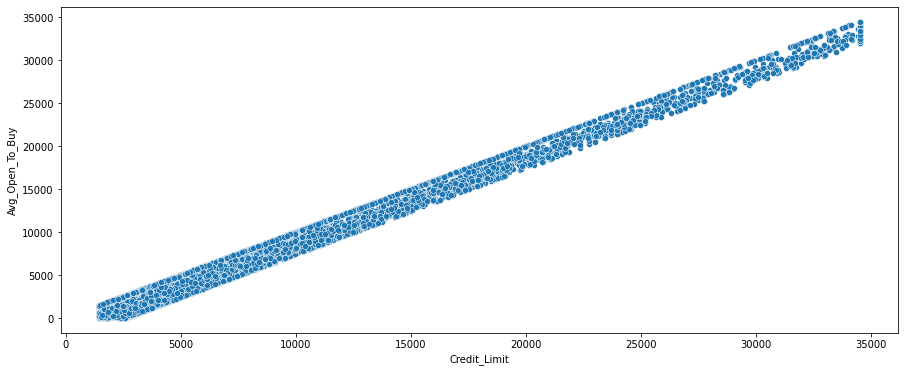

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='Credit_Limit',y='Avg_Open_To_Buy',data=df)

Inference - With an increase in Credit Limit, the Open to Buy Credit Line has steadily increased.

## How does the Credit Limit affect the card utilization ratio ?

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Utilization_Ratio'>

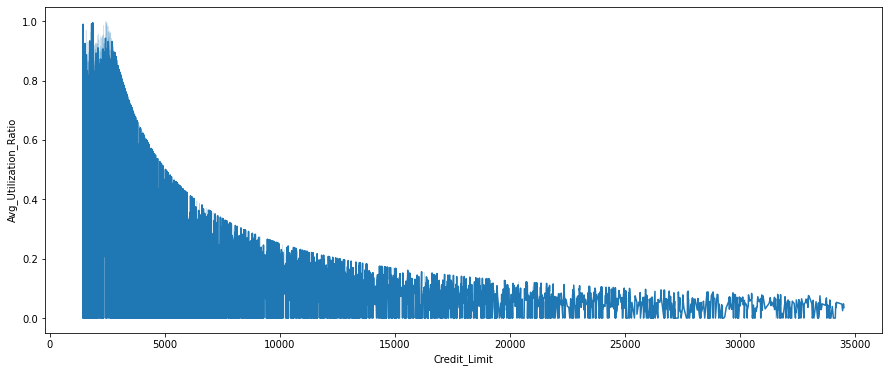

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Credit_Limit',y='Avg_Utilization_Ratio',data=df)

Inference - With an increase in the credit limit, the Card Utilization Ratio has decreased.

## How does the Total Transaction Count  affect the Total Transaction Amount ?

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

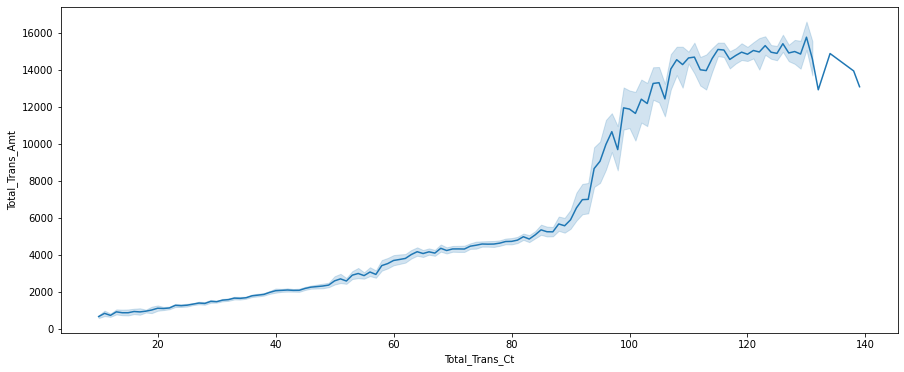

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(x='Total_Trans_Ct',y='Total_Trans_Amt',data=df)

Inference - The Total Transaction count of the customer has increase with an increase of the Total Transaction Amount.

# BIVARIATE ANALYSIS OF NUMERICAL-CATEGORICAL COLUMNS

In [ ]:
nc = df_numerical.columns
nc = nc.drop("Probability_mon_2")
nc

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Probability_mon_1'],
      dtype='object')

In [ ]:
cc = df_categorical.columns
cc = cc.drop("Target")
cc

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

## ATTRITION FLAG

## 1. Dependent_count

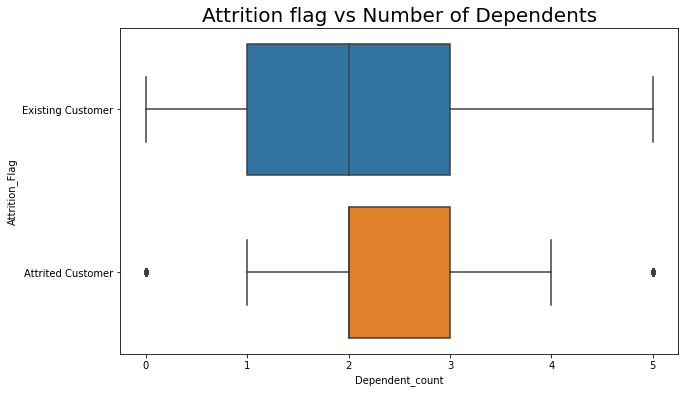

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Dependent_count'],y=df['Attrition_Flag'],data =df,orient='h')
plt.title("Attrition flag vs Number of Dependents",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Dependent_count'].median()

Attrition_Flag
Attrited Customer    2.0
Existing Customer    2.0
Name: Dependent_count, dtype: float64

In [ ]:
df.groupby(by='Attrition_Flag')['Dependent_count'].mean()

Attrition_Flag
Attrited Customer    2.402581
Existing Customer    2.335412
Name: Dependent_count, dtype: float64

Inference: The Mean of Dependents count for Attrited customers is slightly more when compared to that of Existing customers. Also, the distribution of Dependents count for Attrited customers ranges from 1 to 4 with less variation than that of Existing customers, where distribution ranges from 1 to 5 and variation is comparatively more.

## 2. Total_Relationship_Count

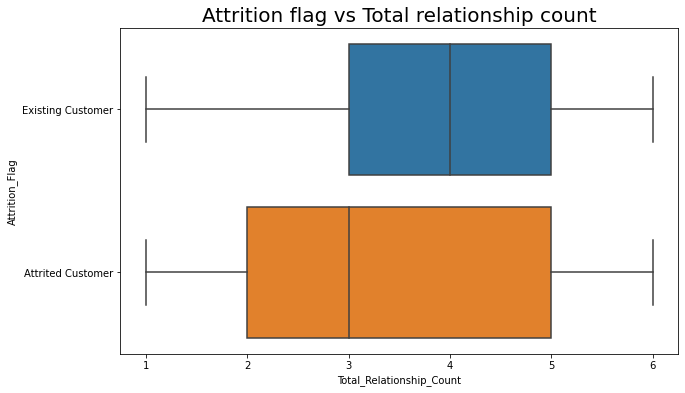

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Relationship_Count'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total relationship count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Relationship_Count'].median()

Attrition_Flag
Attrited Customer    3.0
Existing Customer    4.0
Name: Total_Relationship_Count, dtype: float64

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Relationship_Count'].mean()

Attrition_Flag
Attrited Customer    3.279656
Existing Customer    3.914588
Name: Total_Relationship_Count, dtype: float64

Inference: The Mean and Median of Total Relationship count for Existing customers (3.91 & 4 respectively) is more when compared to that of Attrited customers (3.28 & 3 respectively), which implies Total Relationship count for Existing customers is more than that of Attrited customers.

## 3. Months_Inactive_12_mon

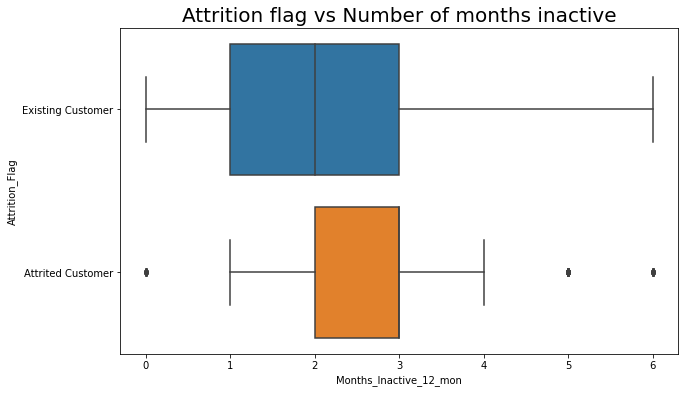

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Months_Inactive_12_mon'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Number of months inactive",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Months_Inactive_12_mon'].median()

Attrition_Flag
Attrited Customer    3.0
Existing Customer    2.0
Name: Months_Inactive_12_mon, dtype: float64

## 4. Contacts_Count_12_mon

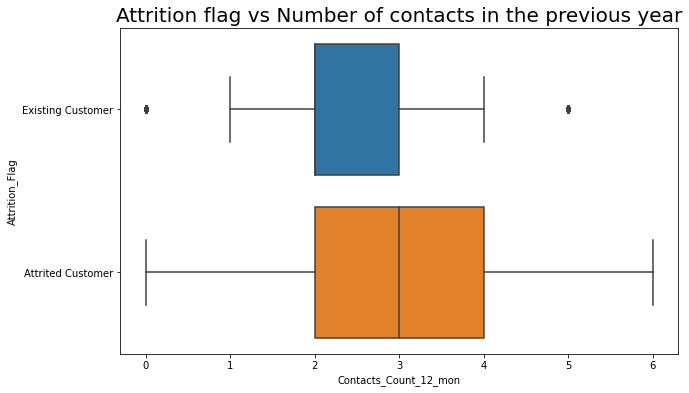

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Contacts_Count_12_mon'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Number of contacts in the previous year",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Contacts_Count_12_mon'].median()

Attrition_Flag
Attrited Customer    3.0
Existing Customer    2.0
Name: Contacts_Count_12_mon, dtype: float64

Inference: The median for the number of months inactive for the past year and Contact counts for the past year of Attrited customers is more when compared to that of Existing customers, which implies Attrited customers are inactive for more time in past one year period and are being contacted more in the past year, when compared to Existing customers.

## 5. Total_Revolving_Bal

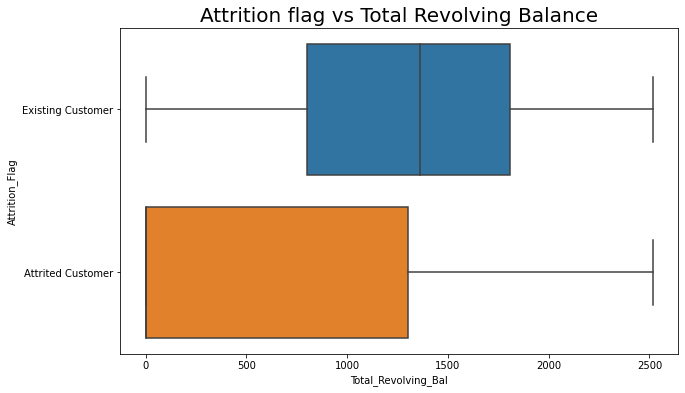

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Revolving_Bal'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total Revolving Balance",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Revolving_Bal'].median()

Attrition_Flag
Attrited Customer       0.0
Existing Customer    1364.0
Name: Total_Revolving_Bal, dtype: float64

Inference: The median for Total Revolving Balance for Existing customers (1364) is significantly more than that of Attrited customers (0), which implies Total Revolving Balance for Existing customers is significantly more than that of Attrited customers.

## 6. Total_Trans_Amt

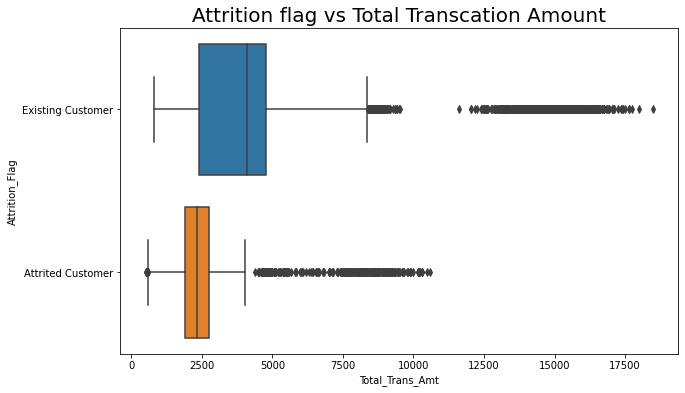

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Amt'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total Transcation Amount",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Trans_Amt'].median()

Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64

## 7. Total_Trans_Ct

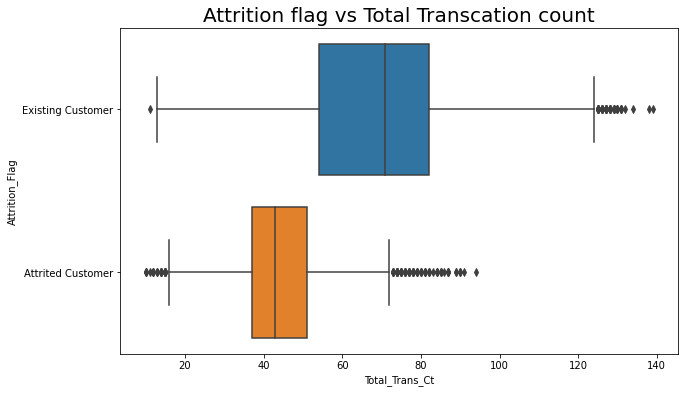

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Ct'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total Transcation count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Trans_Ct'].median()

Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64

Inference: The mean and median for Total Transaction Amount and Total Transaction Count of Existing customers is significantly more than that of Attrited customers, which implies that Total Transaction Amount and Total Transaction Count is more for Existing customers when compared to Attrited customers.

## 8. Total_Amt_Chng_Q4_Q1

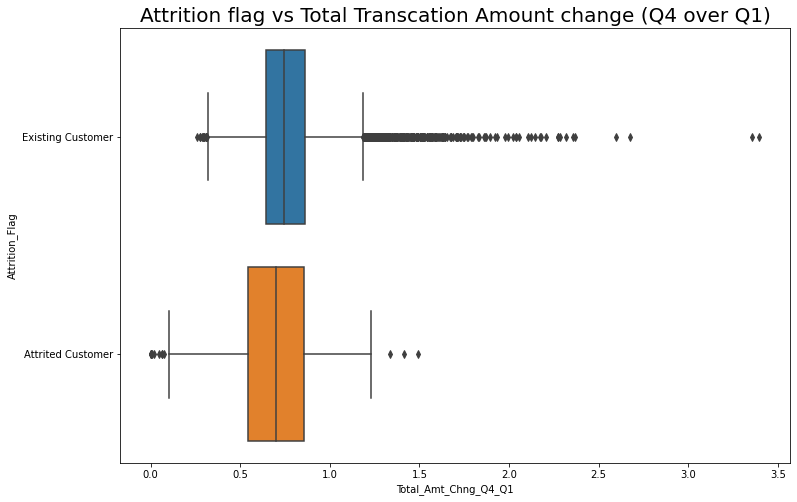

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Total_Amt_Chng_Q4_Q1'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total Transcation Amount change (Q4 over Q1)",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Amt_Chng_Q4_Q1'].median()

Attrition_Flag
Attrited Customer    0.701
Existing Customer    0.743
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

## 9. Total_Ct_Chng_Q4_Q1

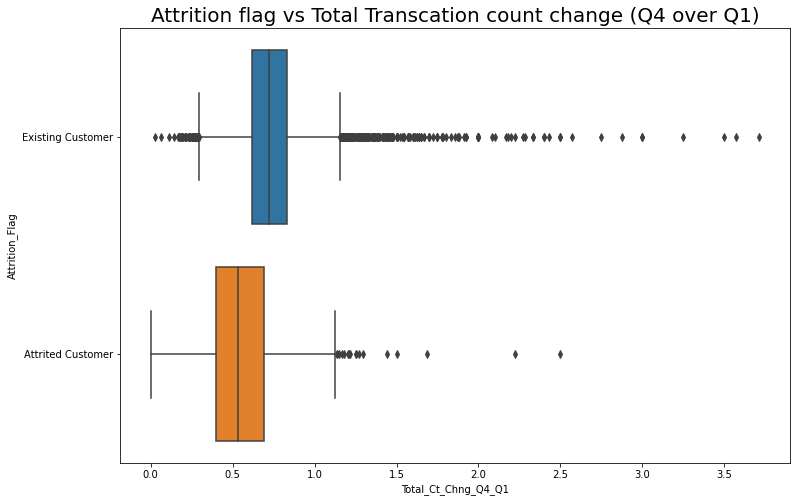

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Total_Ct_Chng_Q4_Q1'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Total Transcation count change (Q4 over Q1)",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].median()

Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

Inference: The mean and median for Total Amount Change (Q4 over Q1) and Total Count Change (Q4 over Q1) of Existing customers is significantly more than that of Attrited customers, which implies that Total Amount Change (Q4 over Q1) and Total Count Change (Q4 over Q1) is more for Existing customers when compared to Attrited customers.

## 10. Avg_Utilization_Ratio

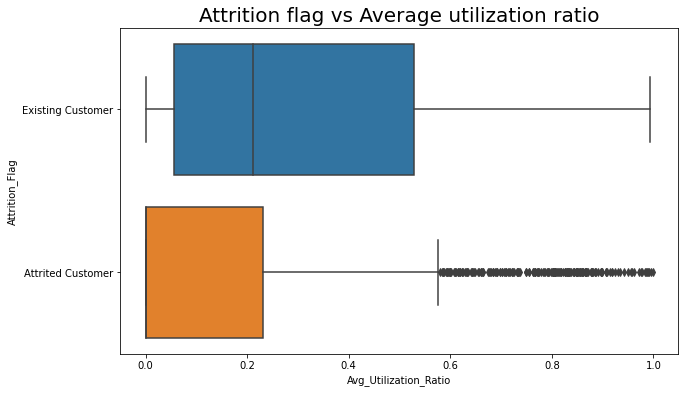

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Utilization_Ratio'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Average utilization ratio",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Avg_Utilization_Ratio'].median()

Attrition_Flag
Attrited Customer    0.000
Existing Customer    0.211
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
df.groupby(by='Attrition_Flag')['Avg_Utilization_Ratio'].mean()

Attrition_Flag
Attrited Customer    0.162475
Existing Customer    0.296412
Name: Avg_Utilization_Ratio, dtype: float64

Inference: Mean and Median for Average Utilization ratio of Existing customers (0.296, 0.211 respectively) are significantly more than that of Attrited customers (0.162, 0 respectively), which implies that the Average Utilization Ratio is more for Existing customers when compared to Attrited customers.

## 11. Probability_mon_1

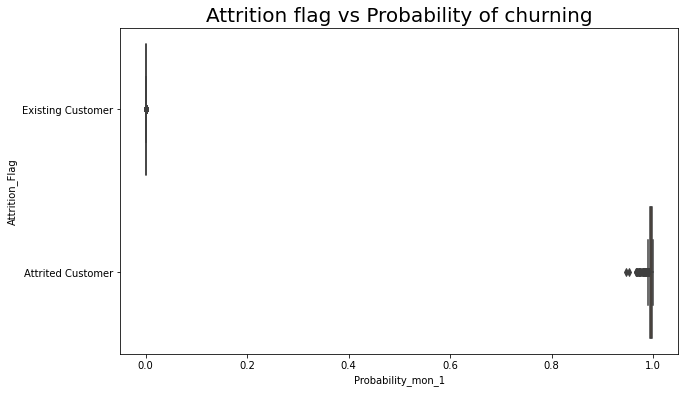

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Probability_mon_1'],y=df['Attrition_Flag'],data=df,orient='h')
plt.title("Attrition flag vs Probability of churning",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Attrition_Flag')['Probability_mon_1'].mean()

Attrition_Flag
Attrited Customer    0.994909
Existing Customer    0.000186
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Attrition_Flag')['Probability_mon_1'].median()

Attrition_Flag
Attrited Customer    0.996310
Existing Customer    0.000158
Name: Probability_mon_1, dtype: float64

Inference: The mean and median for Probability_mon_1 of Attrited customer (0.9949 & 0.9963 respectively), is significantly more when compared to that of the Existing Customer (0.000186 & 0.000158 respectively) which implies the Probability of churning is high for Attrited customer when compared to Existing Customer.

## GENDER

In [ ]:
nc

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Probability_mon_1'],
      dtype='object')

## 1. Credit_Limit

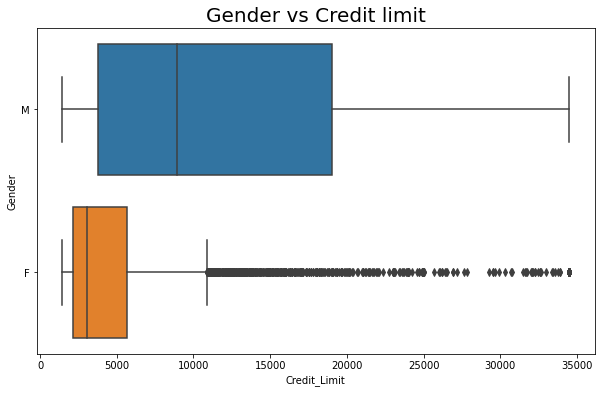

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Credit_Limit'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Credit limit",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Credit_Limit'].median()

Gender
F    3048.0
M    8902.0
Name: Credit_Limit, dtype: float64

In [ ]:
df.groupby(by='Gender')['Credit_Limit'].mean()

Gender
F     5023.854274
M    12685.674963
Name: Credit_Limit, dtype: float64

In [ ]:
df.groupby(by='Gender')['Credit_Limit'].min()

Gender
F    1438.3
M    1438.3
Name: Credit_Limit, dtype: float64

In [ ]:
df.groupby(by='Gender')['Credit_Limit'].max()

Gender
F    34516.0
M    34516.0
Name: Credit_Limit, dtype: float64

Inference: Mean and Median of Credit Limit of Male customers (12686 & 8902 respectively) are significantly more than that of Females(5024 & 3048 respectively) which implies that the Credit Limit of Male customers is more than that of Female customers. Also, the distribution of Credit limits varies from around 1500 to 35000 for males, whereas for Females, it varies from around 1500 to 11500, which implies the range of Credit limits is more for Males.

## 2. Avg_Open_To_Buy

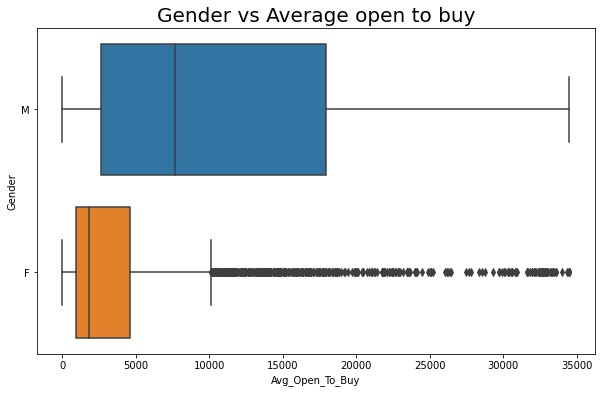

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Open_To_Buy'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Average open to buy",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Avg_Open_To_Buy'].median()

Gender
F    1797.5
M    7656.0
Name: Avg_Open_To_Buy, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Open_To_Buy'].mean()

Gender
F     3883.843076
M    11497.241749
Name: Avg_Open_To_Buy, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Open_To_Buy'].min()

Gender
F     3.0
M    15.0
Name: Avg_Open_To_Buy, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Open_To_Buy'].max()

Gender
F    34516.0
M    34516.0
Name: Avg_Open_To_Buy, dtype: float64

Inference: Mean and Median of Average open to buy of Male customers (11497 & 7656 respectively) are significantly more than that of Females (3884 & 1797 respectively) which implies that the Average open-to-buy of Male customers is more than that of Female customers. Also, the distribution of Average open-to-buy varies from around 10 to 35000 for males, whereas for Females, it varies from around 5 to 10500, which implies the range of Average open-to-buy is more for Males.

## 3. Total_Trans_Amt

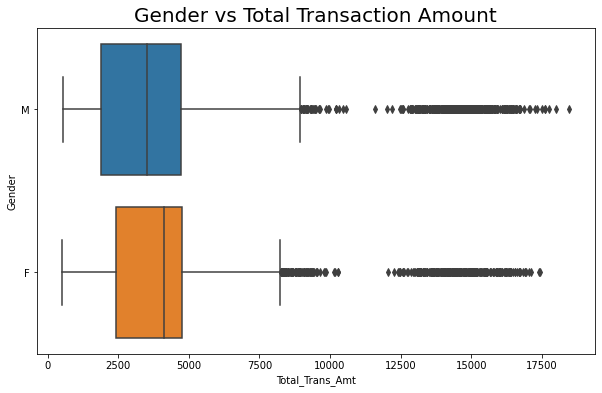

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Amt'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Total Transaction Amount",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Total_Trans_Amt'].median()

Gender
F    4134.0
M    3513.0
Name: Total_Trans_Amt, dtype: float64

In [ ]:
df.groupby(by='Gender')['Total_Trans_Amt'].mean()

Gender
F    4324.318216
M    4493.706228
Name: Total_Trans_Amt, dtype: float64

Inference: The Mean and Median of Total Transaction amount for Feamles (4494 &4134 respectively) is slightly more when compared to that of Males (4324 &3513 respectively), which implies that the Total Transaction Amount for Females is more when compared to that of Males.

## 4. Total_Trans_Ct

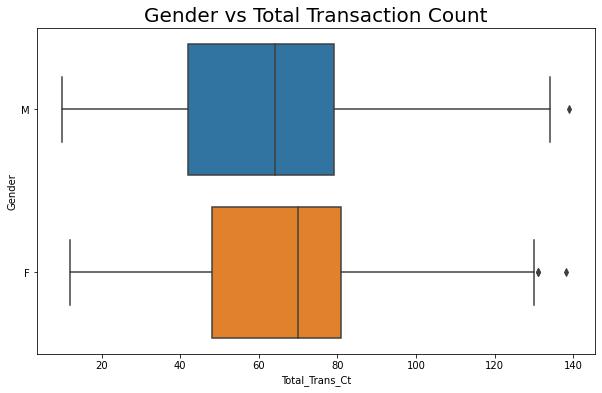

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Ct'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Total Transaction Count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Total_Trans_Ct'].median()

Gender
F    70.0
M    64.0
Name: Total_Trans_Ct, dtype: float64

In [ ]:
df.groupby(by='Gender')['Total_Trans_Ct'].mean()

Gender
F    66.352370
M    63.180541
Name: Total_Trans_Ct, dtype: float64

Inference: The Mean and Median of Total Transaction count for Females ( 66 & 70 respectively) is slightly more when compared to that of Males (63 & 64 respectively), which implies that the Total Transaction count for Females is more when compared to that of Males.

## 5. Avg_Utilization_Ratio

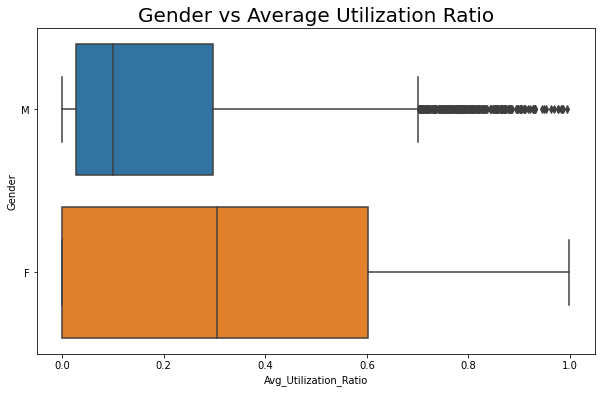

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Utilization_Ratio'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Average Utilization Ratio",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Avg_Utilization_Ratio'].median()

Gender
F    0.304
M    0.100
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Utilization_Ratio'].mean()

Gender
F    0.341957
M    0.199548
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Utilization_Ratio'].min()

Gender
F    0.0
M    0.0
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
df.groupby(by='Gender')['Avg_Utilization_Ratio'].max()

Gender
F    0.999
M    0.994
Name: Avg_Utilization_Ratio, dtype: float64

Inference: Mean and Median of Average Utilization Ratio of Female customers (0.34 & 0.30 respectively) is significantly more than that of Males (0.20 & 0.10 respectively) which implies that Average open to buy of Female customers is more than that of Male customers. Also, the distribution of Average Utilization Ratio varies from 0 to 1 for Females, whereas for Males, it varies from 0 to around 0.70, which implies Average Utilization Ratio is more for Females.

## 6. Probability_mon_1

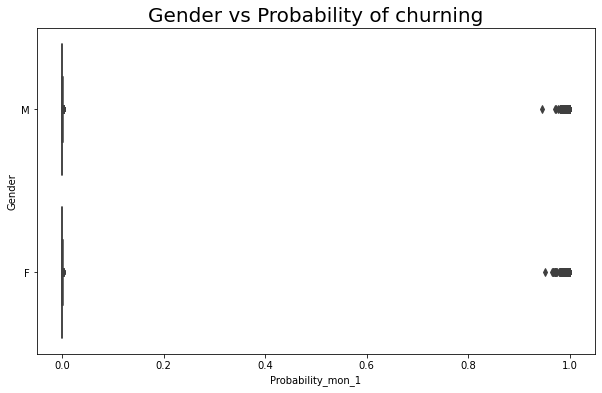

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Probability_mon_1'],y=df['Gender'],data =df,orient='h')
plt.title("Gender vs Probability of churning",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Gender')['Probability_mon_1'].median()

Gender
F    0.000182
M    0.000181
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Gender')['Probability_mon_1'].mean()

Gender
F    0.172819
M    0.145593
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Gender')['Probability_mon_1'].min()

Gender
F    0.000008
M    0.000008
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Gender')['Probability_mon_1'].max()

Gender
F    0.99958
M    0.99945
Name: Probability_mon_1, dtype: float64

Inference: Probability of churning is slightly higher forr females when compared to males.

## EDUCATION LEVEL

## 1. Dependent_count

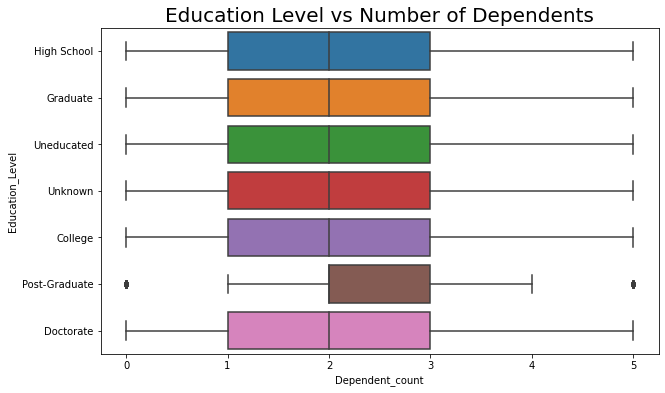

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Dependent_count'],y=df['Education_Level'],data =df,orient='h')
plt.title("Education Level vs Number of Dependents",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Education_Level')['Dependent_count'].median()

Education_Level
College          2.0
Doctorate        2.0
Graduate         2.0
High School      2.0
Post-Graduate    2.0
Uneducated       2.0
Unknown          2.0
Name: Dependent_count, dtype: float64

## 2. Credit_Limit

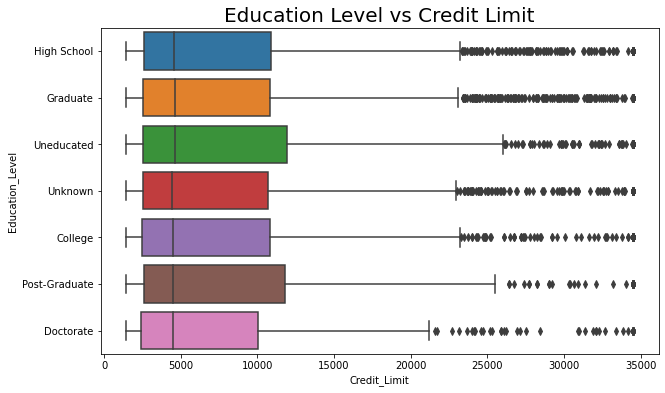

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Credit_Limit'],y=df['Education_Level'],data =df,orient='h')
plt.title("Education Level vs Credit Limit",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Education_Level')['Credit_Limit'].median()

Education_Level
College          4489.0
Doctorate        4480.0
Graduate         4607.5
High School      4546.0
Post-Graduate    4473.0
Uneducated       4654.0
Unknown          4411.0
Name: Credit_Limit, dtype: float64

## 3. Total_Revolving_Bal

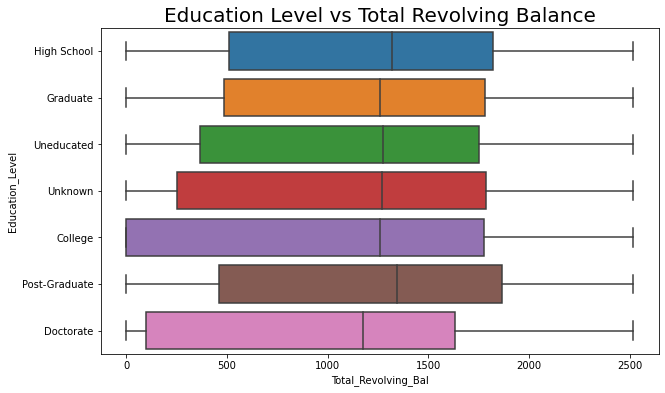

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Revolving_Bal'],y=df['Education_Level'],data =df,orient='h')
plt.title("Education Level vs Total Revolving Balance",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Education_Level')['Total_Revolving_Bal'].median()

Education_Level
College          1258.0
Doctorate        1176.0
Graduate         1262.0
High School      1320.0
Post-Graduate    1344.0
Uneducated       1274.0
Unknown          1270.0
Name: Total_Revolving_Bal, dtype: float64

## 4. Probability_mon_1

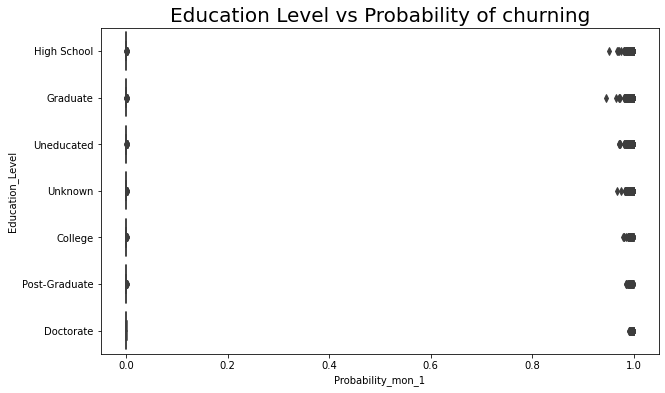

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Probability_mon_1'],y=df['Education_Level'],data =df,orient='h')
plt.title("Education Level vs Probability of churning",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Education_Level')['Probability_mon_1'].median()

Education_Level
College          0.000175
Doctorate        0.000270
Graduate         0.000180
High School      0.000175
Post-Graduate    0.000212
Uneducated       0.000185
Unknown          0.000198
Name: Probability_mon_1, dtype: float64

## MARITAL STATUS

## 1. Dependent_count

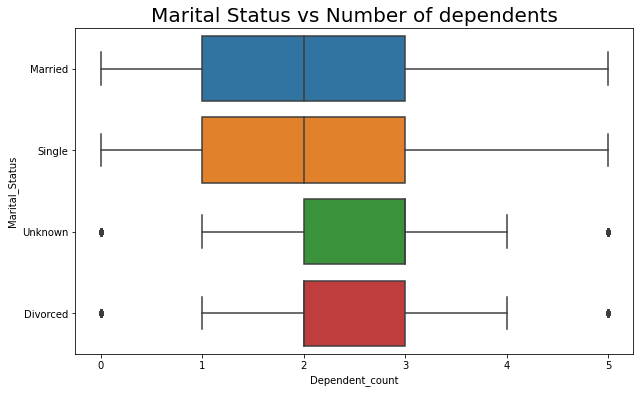

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Dependent_count'],y=df['Marital_Status'],data =df,orient='h')
plt.title("Marital Status vs Number of dependents",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Marital_Status')['Dependent_count'].median()

Marital_Status
Divorced    2.0
Married     2.0
Single      2.0
Unknown     3.0
Name: Dependent_count, dtype: float64

## 2. Credit_Limit

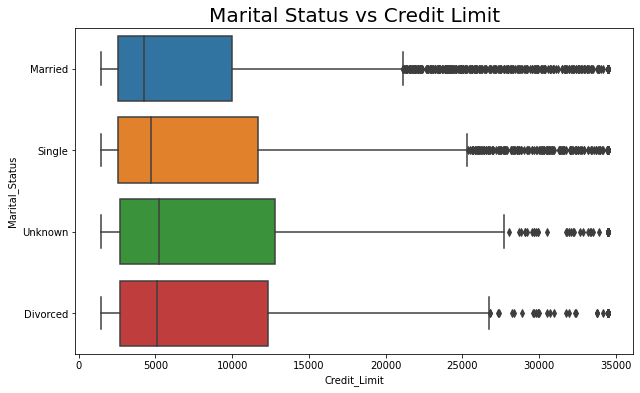

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Credit_Limit'],y=df['Marital_Status'],data =df,orient='h')
plt.title("Marital Status vs Credit Limit",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Marital_Status')['Credit_Limit'].median()

Marital_Status
Divorced    5119.5
Married     4234.0
Single      4712.0
Unknown     5222.0
Name: Credit_Limit, dtype: float64

## 3. Avg_Utilization_Ratio

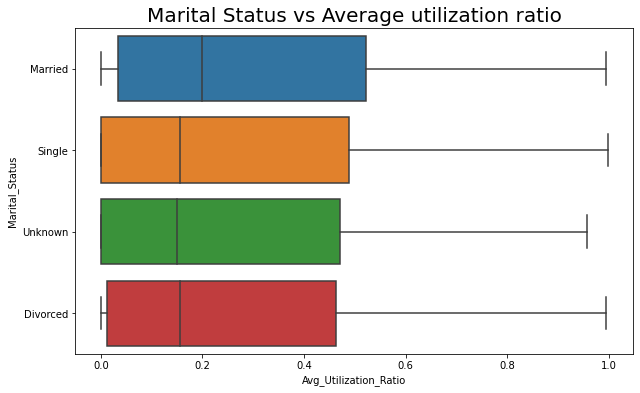

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Utilization_Ratio'],y=df['Marital_Status'],data =df,orient='h')
plt.title("Marital Status vs Average utilization ratio",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Marital_Status')['Avg_Utilization_Ratio'].median()

Marital_Status
Divorced    0.1565
Married     0.1990
Single      0.1560
Unknown     0.1500
Name: Avg_Utilization_Ratio, dtype: float64

## INCOME CATEGORY

## 1. Dependent_count

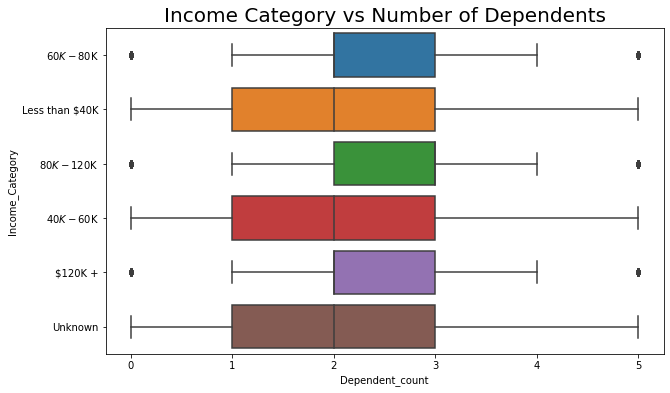

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Dependent_count'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Number of Dependents",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Dependent_count'].median()

Income_Category
$120K +           2.0
$40K - $60K       2.0
$60K - $80K       2.0
$80K - $120K      3.0
Less than $40K    2.0
Unknown           2.0
Name: Dependent_count, dtype: float64

In [ ]:
df.groupby(by='Income_Category')['Dependent_count'].mean()

Income_Category
$120K +           2.462173
$40K - $60K       2.308380
$60K - $80K       2.440086
$80K - $120K      2.492508
Less than $40K    2.263690
Unknown           2.275180
Name: Dependent_count, dtype: float64

Inference: The distribution of 'Less than  40𝐾′,′ 40K -  60𝐾′𝑎𝑛𝑑′𝑈𝑛𝑘𝑛𝑜𝑤𝑛′𝑎𝑟𝑒𝑠𝑖𝑚𝑙𝑎𝑟𝑡𝑜𝑒𝑎𝑐ℎ𝑜𝑡ℎ𝑒𝑟𝑎𝑛𝑑𝑡ℎ𝑒𝑑𝑖𝑠𝑡𝑖𝑏𝑢𝑡𝑖𝑜𝑛𝑜𝑓′ 60K -  80𝐾′𝑎𝑛𝑑′ 120K +' are similar to each other in terms of range.

## 2. Credit_Limit

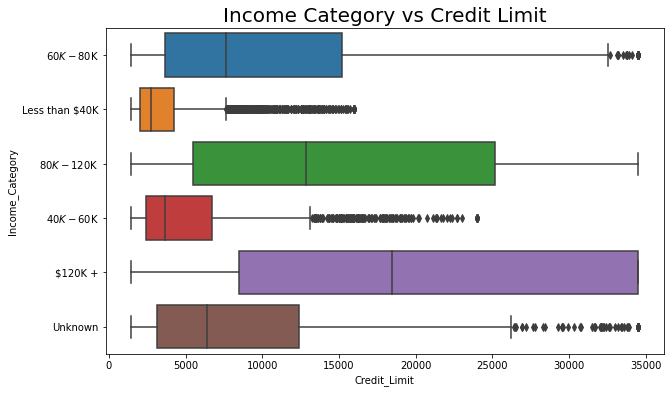

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Credit_Limit'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Credit Limit",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Credit_Limit'].median()

Income_Category
$120K +           18442.0
$40K - $60K        3682.0
$60K - $80K        7660.0
$80K - $120K      12830.0
Less than $40K     2766.0
Unknown            6380.0
Name: Credit_Limit, dtype: float64

In [ ]:
df.groupby(by='Income_Category')['Credit_Limit'].mean()

Income_Category
$120K +           19717.322558
$40K - $60K        5462.259832
$60K - $80K       10758.772967
$80K - $120K      15809.890945
Less than $40K     3754.404521
Unknown            9516.582464
Name: Credit_Limit, dtype: float64

Inference: Both Mean and Median of Credit Limit inreases as the level of Income increases i.e from ‘Less than  40𝑘′𝑡𝑜‘ 120k+’, being minimum for ‘Less than  40k’ (3754.4 & 2766 respectively) and maximum for ‘ 120k+’ (19717.3 & 18442 respectively), with the unknown category falling in between ‘ 40𝐾− 60K’ & ‘ 40𝐾− 60K’ categories of income.

## 3. Avg_Open_To_Buy

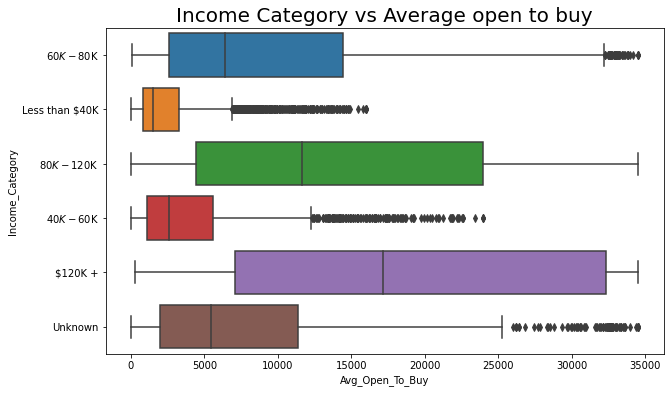

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Open_To_Buy'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Average open to buy",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Avg_Open_To_Buy'].median()

Income_Category
$120K +           17117.0
$40K - $60K        2580.5
$60K - $80K        6418.5
$80K - $120K      11606.0
Less than $40K     1478.0
Unknown            5464.5
Name: Avg_Open_To_Buy, dtype: float64

Inference: Median of Average open to buy inreases as the level of Income increases i.e from ‘Less than  40𝑘′𝑡𝑜‘ 120k+’, being minimum for ‘Less than  40𝑘′(1478)𝑎𝑛𝑑𝑚𝑎𝑥𝑖𝑚𝑢𝑚𝑓𝑜𝑟‘ 120k+’ (17117), with the unknown category falling in between ‘ 40𝐾− 60K’ & ‘ 40𝐾− 60K’ categories of income

## 4. Total_Trans_Amt

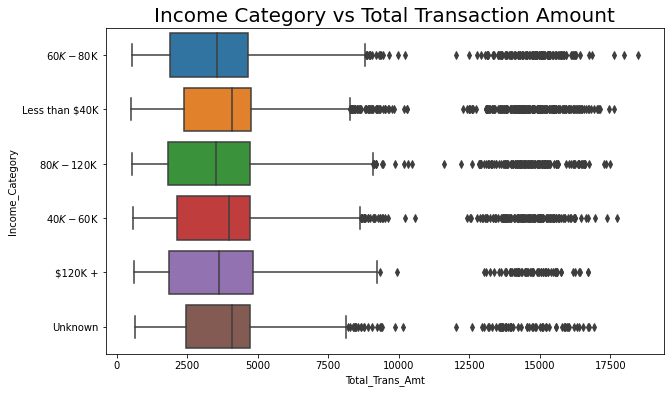

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Amt'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Total Transaction Amount",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Total_Trans_Amt'].mean()

Income_Category
$120K +           4529.467675
$40K - $60K       4405.618994
$60K - $80K       4450.712553
$80K - $120K      4482.960261
Less than $40K    4363.420107
Unknown           4282.211331
Name: Total_Trans_Amt, dtype: float64

In [ ]:
df.groupby(by='Income_Category')['Total_Trans_Amt'].median()

Income_Category
$120K +           3643.0
$40K - $60K       3967.0
$60K - $80K       3552.5
$80K - $120K      3525.0
Less than $40K    4099.0
Unknown           4107.0
Name: Total_Trans_Amt, dtype: float64

Inference: Median of Total Transaction Amount inreases as the level of Income increases i.e from ‘Less than  40𝑘′𝑡𝑜‘ 120k+’, being minimum for ‘Less than  40𝑘′(14363.42)𝑎𝑛𝑑𝑚𝑎𝑥𝑖𝑚𝑢𝑚𝑓𝑜𝑟‘ 120k+’ (4529.47), with the medium of unknown category being the least among all (4282.21) falling in below ‘Less than $40k’ income category.

## 5. Total_Trans_Ct

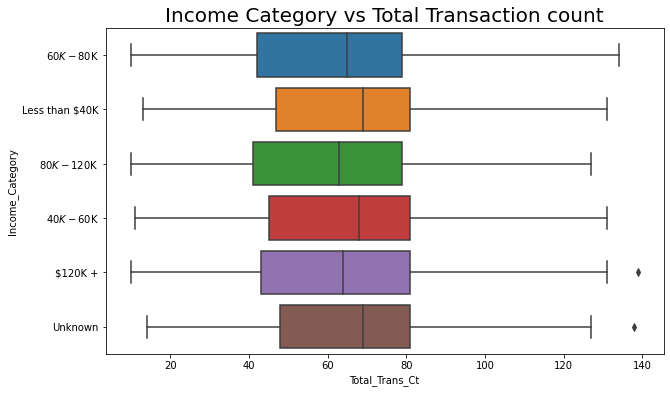

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Ct'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Total Transaction count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Total_Trans_Ct'].median()

Income_Category
$120K +           64.0
$40K - $60K       68.0
$60K - $80K       65.0
$80K - $120K      63.0
Less than $40K    69.0
Unknown           69.0
Name: Total_Trans_Ct, dtype: float64

Inference: Mean of Total Transaction Count decreases as the level of Income increases i.e from ‘Less than  40𝑘′𝑡𝑜‘ 120k+’, being miniimum for ‘ 120𝑘+′(64)𝑎𝑛𝑑𝑚𝑎𝑥𝑖𝑚𝑢𝑚𝑓𝑜𝑟‘𝐿𝑒𝑠𝑠𝑡ℎ𝑎𝑛 40k’ (69),with the median of unknown category being equal to ‘Less than $40k’(69) income category.

## 6. Avg_Utilization_Ratio

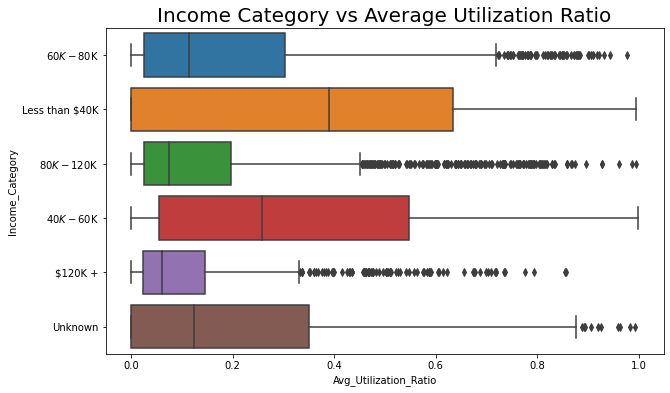

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Utilization_Ratio'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Average Utilization Ratio",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Avg_Utilization_Ratio'].median()

Income_Category
$120K +           0.0620
$40K - $60K       0.2590
$60K - $80K       0.1135
$80K - $120K      0.0750
Less than $40K    0.3900
Unknown           0.1250
Name: Avg_Utilization_Ratio, dtype: float64

Inference: Median of Average Utilization ratio decreases as the level of Income increases i.e from ‘Less than  40𝑘′𝑡𝑜‘ 120k+’, being maximum for ‘Less than  40𝑘′(0.390)𝑎𝑛𝑑𝑚𝑖𝑛𝑖𝑚𝑢𝑚𝑓𝑜𝑟‘ 120k+’ (0.062), with the unknown category falling in between ‘ 40𝐾− 60K’ & ‘ 60𝐾− 80K’ categories of income (0.125).

## 7. Probability_mon_1

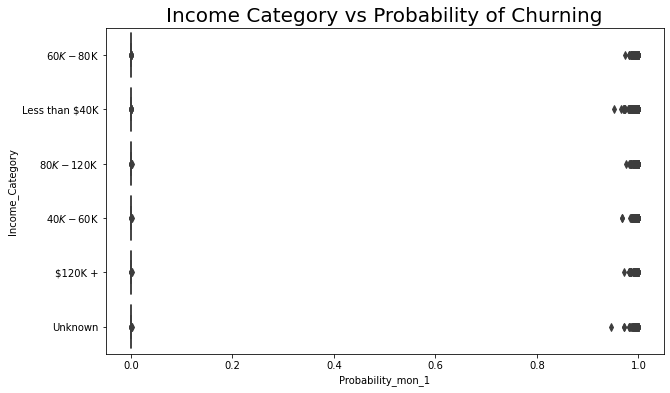

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Probability_mon_1'],y=df['Income_Category'],data =df,orient='h')
plt.title("Income Category vs Probability of Churning",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Income_Category')['Probability_mon_1'].median()

Income_Category
$120K +           0.000186
$40K - $60K       0.000180
$60K - $80K       0.000180
$80K - $120K      0.000185
Less than $40K    0.000185
Unknown           0.000181
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Income_Category')['Probability_mon_1'].mean()

Income_Category
$120K +           0.172571
$40K - $60K       0.150836
$60K - $80K       0.134297
$80K - $120K      0.157054
Less than $40K    0.171087
Unknown           0.167478
Name: Probability_mon_1, dtype: float64

Inference: Both Mean & Median of Probability of churning decreases as the level of Income increases i.e from the ‘Less than  40𝑘′𝑡𝑜‘ 60K -  80𝐾′𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦𝑎𝑛𝑑𝑡ℎ𝑒𝑛𝑖𝑛𝑐𝑟𝑒𝑎𝑠𝑒𝑠𝑓𝑟𝑜𝑚‘ 60K -  80𝐾′𝑡𝑜‘ 120k+’ being minimum for ‘ 60𝐾− 80K’ (0.1343 & 0.000180 respectively), which means that Probability of churning for ‘ 60𝐾− 80K’ income category is the minimum when compared to other categories of income.

## CARD CATEGORY

## 1. Total_Relationship_Count

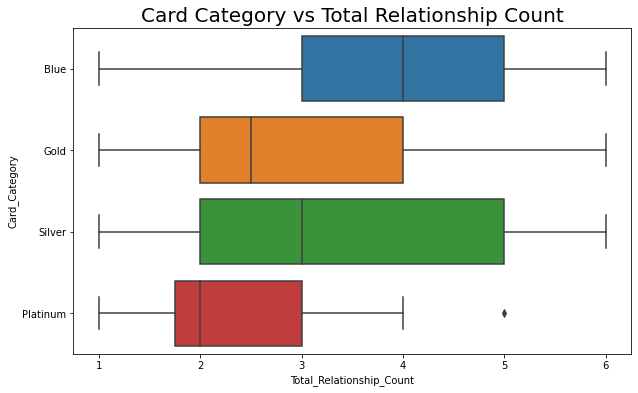

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Relationship_Count'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Total Relationship Count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Total_Relationship_Count'].median()

Card_Category
Blue        4.0
Gold        2.5
Platinum    2.0
Silver      3.0
Name: Total_Relationship_Count, dtype: float64

Inference: Median of Total relationship count decreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being maximum for Blue (4) and minimum for Platinum(2).

## 2. Credit_Limit

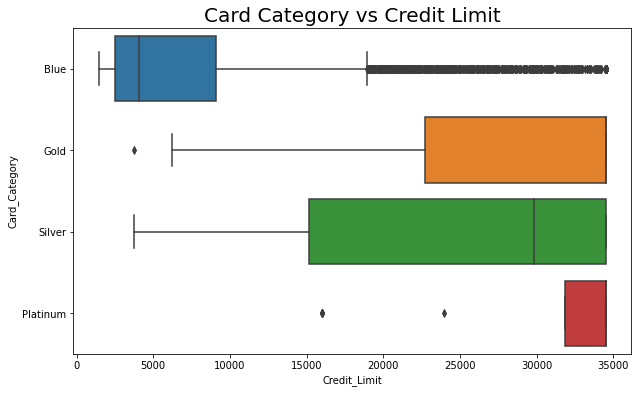

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Credit_Limit'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Credit Limit",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Credit_Limit'].median()

Card_Category
Blue         4105.0
Gold        34516.0
Platinum    34516.0
Silver      29808.0
Name: Credit_Limit, dtype: float64

In [ ]:
df.groupby(by='Card_Category')['Credit_Limit'].mean()

Card_Category
Blue         7363.780002
Gold        28416.370690
Platinum    30283.450000
Silver      25277.836036
Name: Credit_Limit, dtype: float64

Inference: Both Mean and Median of Credit Limit inreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being minimum for Blue (7364 & 4105) and maximum for Platinum(30283 & 34516).

## 3. Total_Revolving_Bal

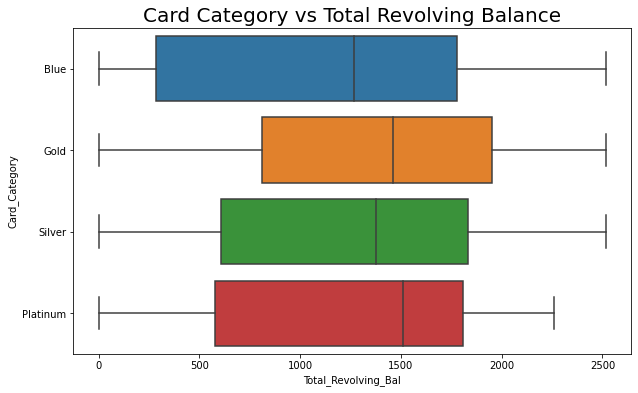

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Revolving_Bal'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Total Revolving Balance",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Total_Revolving_Bal'].median()

Card_Category
Blue        1267.5
Gold        1459.0
Platinum    1512.5
Silver      1378.0
Name: Total_Revolving_Bal, dtype: float64

Inference: Median of Total Revolving Balance inreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being minimum for Blue (1267.5) and maximum for Platinum (1512.5).

## 4. Avg_Open_To_Buy

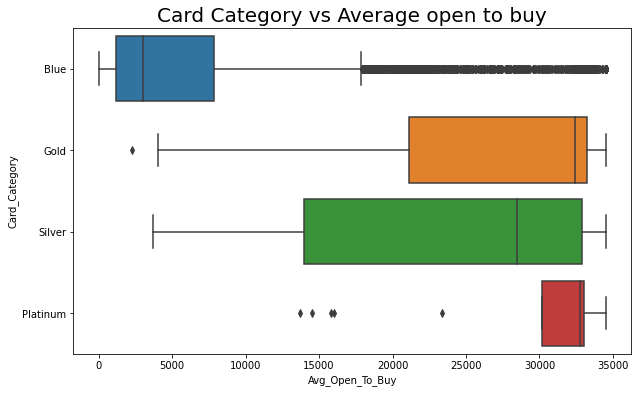

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Open_To_Buy'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Average open to buy",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Avg_Open_To_Buy'].median()

Card_Category
Blue         3006.0
Gold        32441.5
Platinum    32767.5
Silver      28471.0
Name: Avg_Open_To_Buy, dtype: float64

Inference: Median of Average open to buy inreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being minimum for Blue (3006.0) and maximum for Platinum (32767.5).

## 5. Total_Trans_Amt

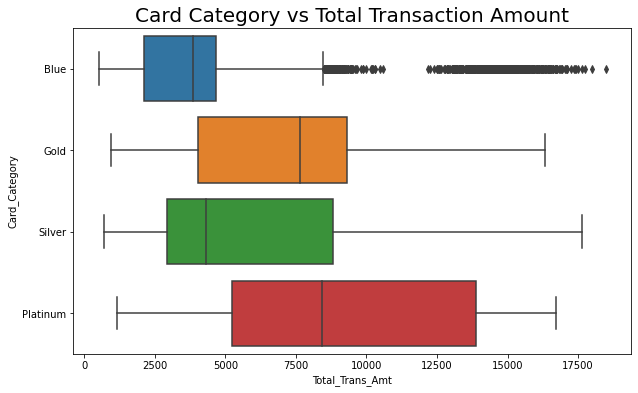

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Amt'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Total Transaction Amount",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Total_Trans_Amt'].median()

Card_Category
Blue        3856.5
Gold        7652.5
Platinum    8427.0
Silver      4303.0
Name: Total_Trans_Amt, dtype: float64

Inference: Median of Total Transaction Amount inreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being minimum for Blue (3856.5) and maximum for Platinum (8427.5).

## 6. Total_Trans_Ct

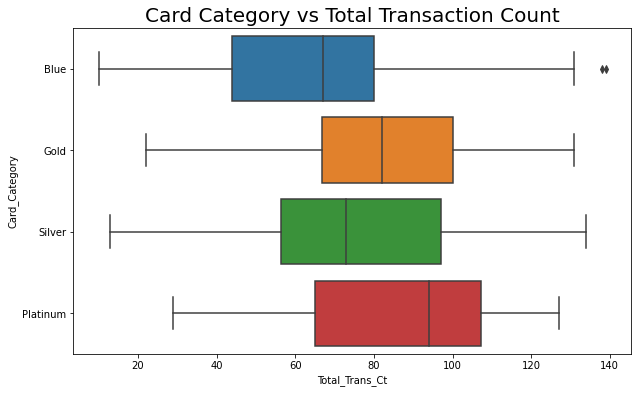

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total_Trans_Ct'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Total Transaction Count",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Total_Trans_Ct'].median()

Card_Category
Blue        67.0
Gold        82.0
Platinum    94.0
Silver      73.0
Name: Total_Trans_Ct, dtype: float64

Inference: Median of Total Transaction Amount inreases as the grade of the credit card increases i.e from Blue to Platinum (Blue, Silver, Gold, Platinum), being minimum for Blue (67) and maximum for Platinum (94).

## 7. Probability_mon_1

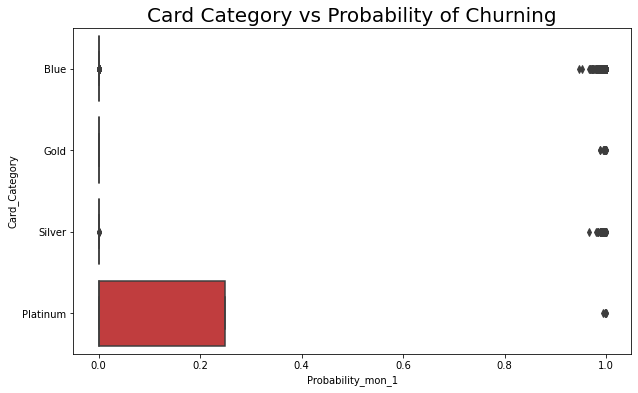

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Probability_mon_1'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Probability of Churning",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Probability_mon_1'].median()

Card_Category
Blue        0.000184
Gold        0.000195
Platinum    0.000338
Silver      0.000163
Name: Probability_mon_1, dtype: float64

In [ ]:
df.groupby(by='Card_Category')['Probability_mon_1'].mean()

Card_Category
Blue        0.160319
Gold        0.180432
Platinum    0.249621
Silver      0.147028
Name: Probability_mon_1, dtype: float64

Inference: Median and Mean of Probabilty of churning is maximum for Platinum Card holders (0.000338 & 0.249 repectively) Hence, it indicates that the probability of churning is high for Platinum card holders when compared to other card holders.

## 8. Avg_Utilization_Ratio

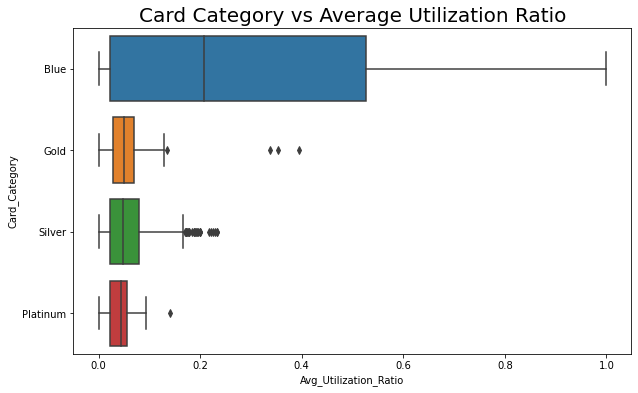

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Avg_Utilization_Ratio'],y=df['Card_Category'],data =df,orient='h')
plt.title("Card Category vs Average Utilization Ratio",fontsize=20)
plt.show()

In [ ]:
df.groupby(by='Card_Category')['Avg_Utilization_Ratio'].median()

Card_Category
Blue        0.2070
Gold        0.0505
Platinum    0.0445
Silver      0.0490
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
df.groupby(by='Card_Category')['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

Inference: Both Mean & Median of Average Utilization Ratio is minimum for Platinum (0.0436 & 0.0445 respectively) and maximum for Blue (0.291 & 0.207 respectively). Also, the distribution of the Average Utilization Ratio ranges from 0 to 1 for Blue card holders, whereas the range is between 0 & 0.2 for all the other card holders.

## BIVARIATE ANALYSIS OF ALL CATEGORICAL/CATEGORICAL FEATURES

In [ ]:
from scipy.stats import chi2_contingency
df_categorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Target'],
      dtype='object')

## How does the Gender affect the Attrition_Flag ?

In [ ]:
chisqt1 = pd.crosstab(df.Attrition_Flag, df.Gender, margins=True)
print(chisqt1)
value = np.array([chisqt1.iloc[0][0:5].values,
                  chisqt1.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Gender                F     M    All
Attrition_Flag                      
Attrited Customer   930   697   1627
Existing Customer  4428  4072   8500
All                5358  4769  10127
(14.068218798353646, 0.0008813027044334518, 2)


(array([0, 1]),
 [Text(0, 0, 'Attrited Customer'), Text(1, 0, 'Existing Customer')])

<Figure size 1080x432 with 0 Axes>

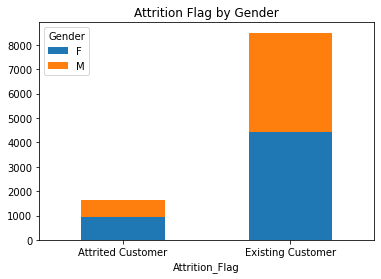

In [ ]:
plt.figure(figsize = (15,6))
attr_gen = df.groupby(['Attrition_Flag','Gender'])['Gender'].count().unstack().fillna(0)
attr_gen.plot(kind='bar', stacked=True)
plt.title('Attrition Flag by Gender')
plt.xticks(rotation=0, ha='center')

H0 - The two variables are independent.

H1 - The two variables have a correlation with each other.

Inference - As the p-value is 0.0008(<0.05). The variables are associated with each other and happen to have a correlation between the variables. From the crosstab and the bar graph, it is clear that most of the attrited customers are females. Also, most of the existing customers are females.

## How does the Education Level affect the Attrition_Flag ?

In [ ]:
chisqt2 = pd.crosstab(df.Attrition_Flag, df.Education_Level, margins=True)
print(chisqt2)
value = np.array([chisqt2.iloc[0][0:5].values,
                  chisqt2.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   
All                   1013        451      3128         2013            516   

Education_Level    Uneducated  Unknown    All  
Attrition_Flag                                 
Attrited Customer         237      256   1627  
Existing Customer        1250     1263   8500  
All                      1487     1519  10127  
(11.77361631226398, 0.019116557475945217, 4)


(array([0, 1]),
 [Text(0, 0, 'Attrited Customer'), Text(1, 0, 'Existing Customer')])

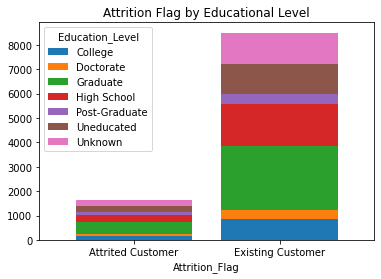

In [ ]:
attr_edu = df.groupby(['Attrition_Flag','Education_Level'])['Education_Level'].count().unstack().fillna(0)
attr_edu.plot(kind='bar', stacked=True, width=0.8)
plt.title('Attrition Flag by Educational Level')
plt.xticks(rotation=0, ha='center')

H0 - The two variables are independent.

H1 - The two variables have a correlation with each other.

Inference - As the p-value is 0.019(<0.05). The variables are associated with each other and happen to have a correlation between the variables. From the crosstab and bar graph, it is evident that the education level of most of the attrited customers falls at the graduate level.

## How does the Income Level affect the Attrition_Flag ?

In [ ]:
chisqt3 = pd.crosstab(df.Attrition_Flag, df.Income_Category, margins=True)
print(chisqt3)
value = np.array([chisqt3.iloc[0][0:5].values,
                  chisqt3.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
Attrited Customer      126          271          189           242   
Existing Customer      601         1519         1213          1293   
All                    727         1790         1402          1535   

Income_Category    Less than $40K  Unknown    All  
Attrition_Flag                                     
Attrited Customer             612      187   1627  
Existing Customer            2949      925   8500  
All                          3561     1112  10127  
(12.368085415012892, 0.01481403211198152, 4)


(array([0, 1]),
 [Text(0, 0, 'Attrited Customer'), Text(1, 0, 'Existing Customer')])

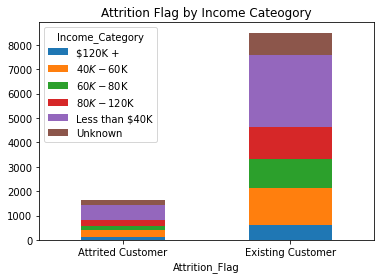

In [ ]:
attr_inc = df.groupby(['Attrition_Flag','Income_Category'])['Income_Category'].count().unstack().fillna(0)
attr_inc.plot(kind='bar', stacked=True)
plt.title('Attrition Flag by Income Cateogory')
plt.xticks(rotation=0, ha='center')

H0 - The two variables are independent.

H1 - The two variables have a correlation with each other.

Inference - As the p-value is 0.0148(<0.05). The variables are associated with each other and happen to have a correlation between the variables. Also, we understand from the crosstab and bar graph that the income level of most of the attrited customers is less than $40K.

## How does the Gender affect the Income Level ?

In [ ]:
chisqt4 = pd.crosstab(df.Gender, df.Income_Category, margins=True)
print(chisqt4)
value = np.array([chisqt4.iloc[0][0:5].values,
                  chisqt4.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Gender                                                             
F                      0         1014            0             0   
M                    727          776         1402          1535   
All                  727         1790         1402          1535   

Income_Category  Less than $40K  Unknown    All  
Gender                                           
F                          3284     1060   5358  
M                           277       52   4769  
All                        3561     1112  10127  
(6228.8140869859535, 0.0, 4)


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

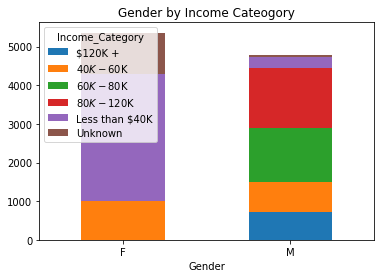

In [ ]:
gen_inc = df.groupby(['Gender','Income_Category'])['Income_Category'].count().unstack().fillna(0)
gen_inc.plot(kind='bar', stacked=True)
plt.title('Gender by Income Cateogory')
plt.xticks(rotation=0, ha='center')

H0 - The two variables are independent

H1 - The two variables have a correlation with each other

Inference - As the p-value is 0.0(<0.05). The variables are associated with each other and happen to have a correlation between the variables Also we understand from the crosstab and bar graph that the income level of most of the female customers is less than  40𝐾𝑤ℎ𝑒𝑟𝑒𝑎𝑠𝑚𝑜𝑠𝑡𝑜𝑓𝑡ℎ𝑒𝑚𝑎𝑙𝑒𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠ℎ𝑎𝑣𝑒𝑡ℎ𝑒𝑖𝑟𝑖𝑛𝑐𝑜𝑚𝑒𝑖𝑛𝑡ℎ𝑒𝑟𝑎𝑛𝑔𝑒𝑜𝑓 80K to $120K

## How does the Education Level affect the Income ?

In [ ]:
chisqt5 = pd.crosstab(df.Education_Level, df.Income_Category, margins=True)
print(chisqt5)
value = np.array([chisqt5.iloc[0][0:5].values,
                  chisqt5.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Education_Level                                                    
College               70          183          132           175   
Doctorate             37           70           59            57   
Graduate             204          553          422           478   
High School          147          355          307           308   
Post-Graduate         30          111           77            81   
Uneducated           119          249          195           217   
Unknown              120          269          210           219   
All                  727         1790         1402          1535   

Income_Category  Less than $40K  Unknown    All  
Education_Level                                  
College                     345      108   1013  
Doctorate                   158       70    451  
Graduate                   1139      332   3128  
High School                 671      225   2013  
Post-Graduate      

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'College'),
  Text(1, 0, 'Doctorate'),
  Text(2, 0, 'Graduate'),
  Text(3, 0, 'High School'),
  Text(4, 0, 'Post-Graduate'),
  Text(5, 0, 'Uneducated'),
  Text(6, 0, 'Unknown')])

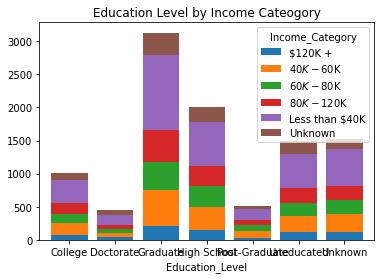

In [ ]:
edu_inc = df.groupby(['Education_Level','Income_Category'])['Income_Category'].count().unstack().fillna(0)
edu_inc.plot(kind='bar', width=0.8, stacked=True)
plt.title('Education Level by Income Cateogory')
plt.xticks(rotation=0, ha='center')

Inference - As the p value is 0.24(<0.05). The variables are not associated with each other and hence do not have a correlation between the variables.

## How does the Marital status affect the Income ?

In [ ]:
chisqt6 = pd.crosstab(df.Marital_Status, df.Income_Category, margins=True)
print(chisqt6)
value = np.array([chisqt6.iloc[0][0:5].values,
                  chisqt6.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Marital_Status                                                     
Divorced              52          138          108           103   
Married              354          816          661           735   
Single               274          704          531           561   
Unknown               47          132          102           136   
All                  727         1790         1402          1535   

Income_Category  Less than $40K  Unknown    All  
Marital_Status                                   
Divorced                    254       93    748  
Married                    1628      493   4687  
Single                     1429      444   3943  
Unknown                     250       82    749  
All                        3561     1112  10127  
(2.1703171868098075, 0.7044670798925821, 4)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Unknown')])

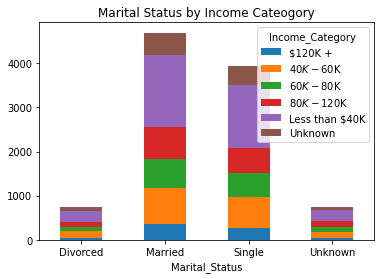

In [ ]:
mar_inc = df.groupby(['Marital_Status','Income_Category'])['Income_Category'].count().unstack().fillna(0)
mar_inc.plot(kind='bar', stacked=True)
plt.title('Marital Status by Income Cateogory')
plt.xticks(rotation=0, ha='center')

H0 - The two variables are independent

H1 - The two variables have a correlation with each other

Inference - As the p-value is 0.704(<0.05). The variables are not associated with each other and hence do not have a correlation between the variables.

# MULTIVARIATE ANALYSIS

## Correlation Matrix

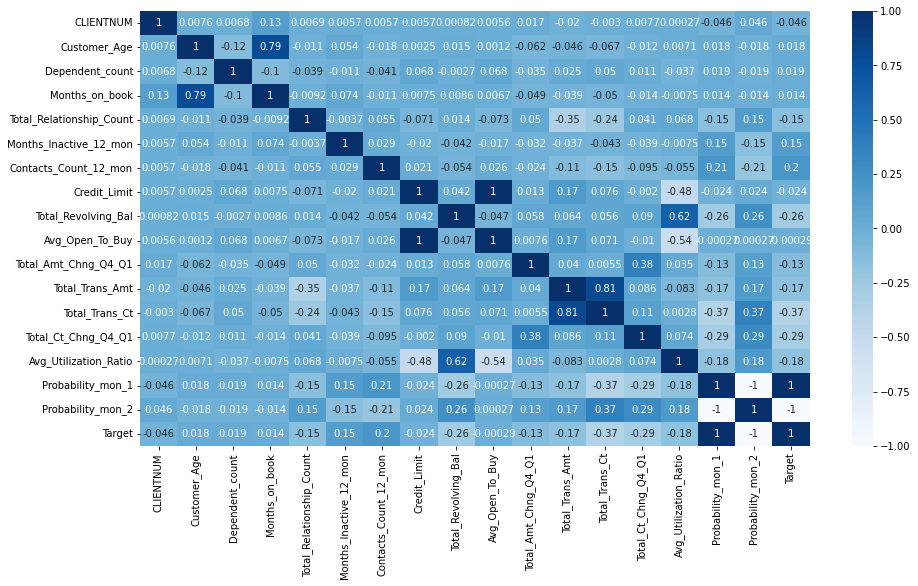

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

In [ ]:
df.corr()

CLIENTNUM  Customer_Age  Dependent_count  \
CLIENTNUM                  1.000000      0.007613         0.006772   
Customer_Age               0.007613      1.000000        -0.122254   
Dependent_count            0.006772     -0.122254         1.000000   
Months_on_book             0.134588      0.788912        -0.103062   
Total_Relationship_Count   0.006907     -0.010931        -0.039076   
Months_Inactive_12_mon     0.005729      0.054361        -0.010768   
Contacts_Count_12_mon      0.005694     -0.018452        -0.040505   
Credit_Limit               0.005708      0.002476         0.068065   
Total_Revolving_Bal        0.000825      0.014780        -0.002688   
Avg_Open_To_Buy            0.005633      0.001151         0.068291   
Total_Amt_Chng_Q4_Q1       0.017369     -0.062042        -0.035439   
Total_Trans_Amt           -0.019692     -0.046446         0.025046   
Total_Trans_Ct            -0.002961     -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1        0.007696     -0.012143         0.011087   
Avg_Utilization_Ratio      0.000266      0.007114        -0.037135   
Probability_mon_1         -0.046411      0.018189         0.019189   
Probability_mon_2          0.046410     -0.018189        -0.019189   
Target                    -0.046430      0.018203         0.018991   

                          Months_on_book  Total_Relationship_Count  \
CLIENTNUM                       0.134588                  0.006907   
Customer_Age                    0.788912                 -0.010931   
Dependent_count                -0.103062                 -0.039076   
Months_on_book                  1.000000                 -0.009203   
Total_Relationship_Count       -0.009203                  1.000000   
Months_Inactive_12_mon          0.074164                 -0.003675   
Contacts_Count_12_mon          -0.010774                  0.055203   
Credit_Limit                    0.007507                 -0.071386   
Total_Revolving_Bal             0.008623                  0.013726   
Avg_Open_To_Buy                 0.006732                 -0.072601   
Total_Amt_Chng_Q4_Q1           -0.048959                  0.050119   
Total_Trans_Amt                -0.038591                 -0.347229   
Total_Trans_Ct                 -0.049819                 -0.241891   
Total_Ct_Chng_Q4_Q1            -0.014072                  0.040831   
Avg_Utilization_Ratio          -0.007541                  0.067663   
Probability_mon_1               0.013693                 -0.149981   
Probability_mon_2              -0.013694                  0.149981   
Target                          0.013687                 -0.150005   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
CLIENTNUM                               0.005729               0.005694   
Customer_Age                            0.054361              -0.018452   
Dependent_count                        -0.010768              -0.040505   
Months_on_book                          0.074164              -0.010774   
Total_Relationship_Count               -0.003675               0.055203   
Months_Inactive_12_mon                  1.000000               0.029493   
Contacts_Count_12_mon                   0.029493               1.000000   
Credit_Limit                           -0.020394               0.020817   
Total_Revolving_Bal                    -0.042210              -0.053913   
Avg_Open_To_Buy                        -0.016605               0.025646   
Total_Amt_Chng_Q4_Q1                   -0.032247              -0.024445   
Total_Trans_Amt                        -0.036982              -0.112774   
Total_Trans_Ct                         -0.042787              -0.152213   
Total_Ct_Chng_Q4_Q1                    -0.038989              -0.094997   
Avg_Utilization_Ratio                  -0.007503              -0.055471   
Probability_mon_1                       0.153452               0.205772   
Probability_mon_2                      -0.153452              -0.205772   
Target        

Inferences-

Customer Age has a strong positive correlation with Months on the book.

Total Transaction count has a strong positive correlation with Total Transaction amount.

Total Revolving Balance has a strong positive correlation with Average Card Utilization Ratio.
Credit Limit has a strong positive correlation with Average Open to Buy Amount.

Average Open to Buy Amount has a strong negative correlation with Average Card Utilization Ratio.

Credit Limit has a strong negative correlation with Average Card Utilization Ratio.

## Effect of Marital Status on the relationship between Credit Limit and Card Utilization Ratio

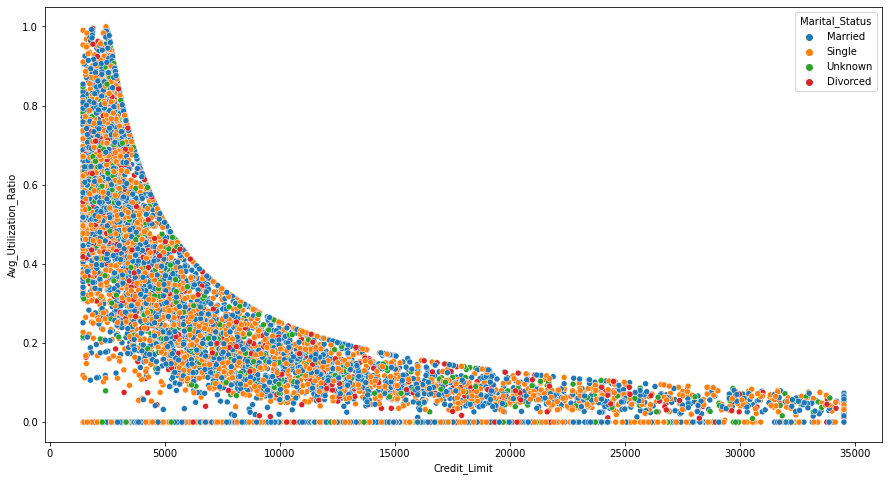

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],hue=df['Marital_Status'])
plt.show()

Inference-Based on the above plot, Married and Single Customers utilize the Credit card to a greater extent compared to Divorced Ones, and the Credit Limit increased Card Utilization Rate decreased which means that the total transaction made by the customer through credit card did not change subsequently as the Credit Limit increased.

## Effect of Card Category on the relationship between Credit Limit and Card Utilization Ratio

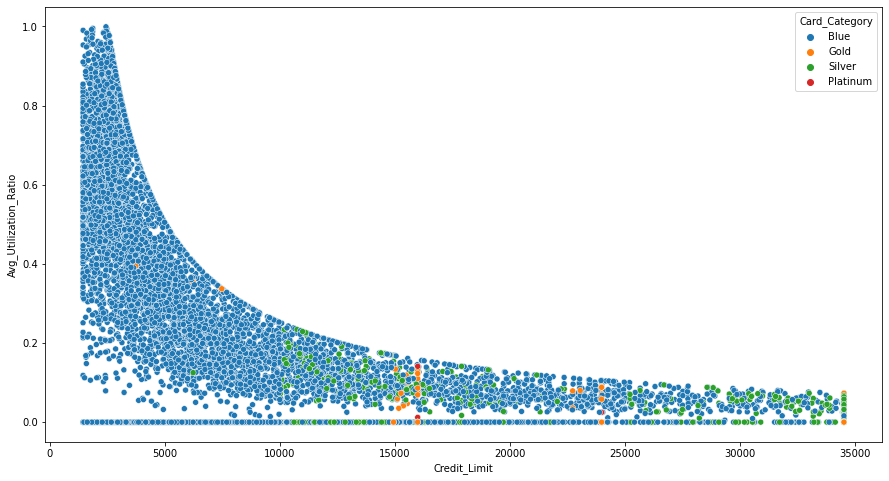

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],hue=df['Card_Category'])
plt.show()

Inference - From the plot, It is observed that most customers possess blue cards whose utilization rate falls down as the credit limit is increased. Customers who possess Gold and Platinum have no effect on the relationship between card utilization rate and credit limit.

## Effect of Income Category on the relationship between Credit Limit and Card Utilization Ratio

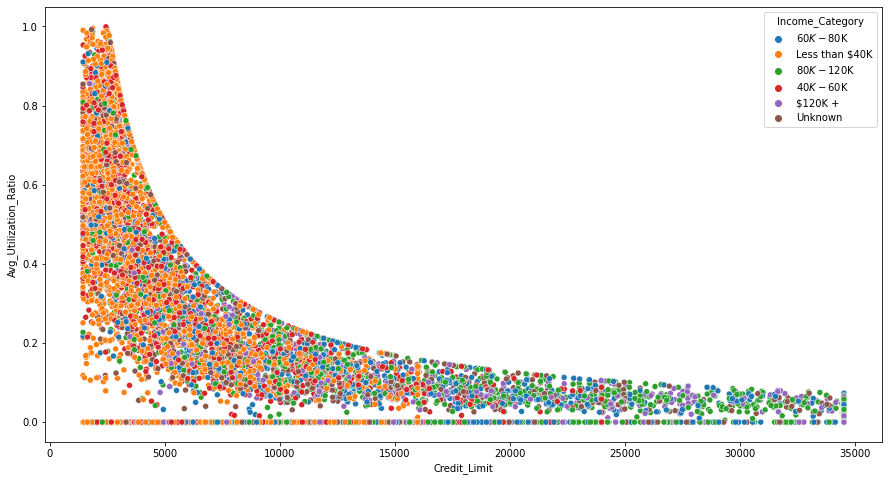

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],hue=df['Income_Category'])
plt.show()

Inference - From the above plot, It can be observed that customers whose income is less than 40Kutilizethecreditcardtoafargreaterextentthanothersandmostoftheircreditlimitdoesnotgobeyond 15K. It can also be observed that the utilization ratio decreases as the Income category becomes richer and richer which means that customers who earn more tend to spend less through credit cards.

## Effect of Gender on the relationship between Credit Limit and Card Utilization Ratio

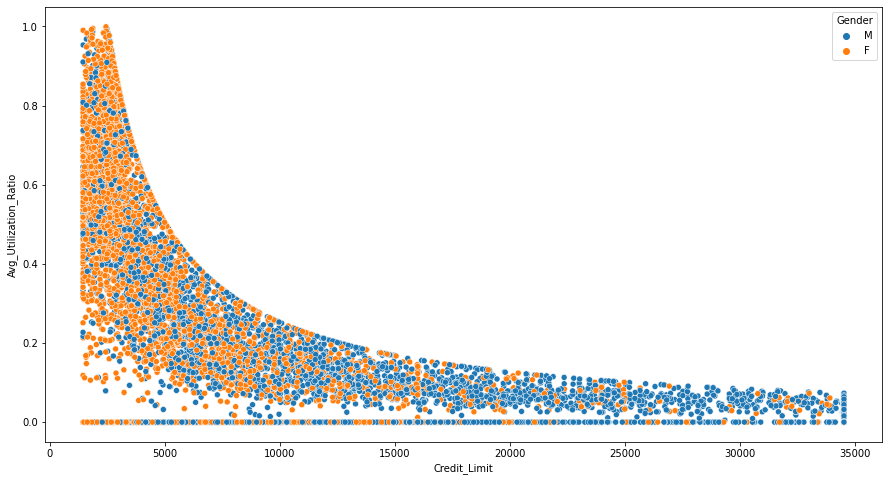

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],hue=df['Gender'])
plt.show()

## Effect of Education Level on the relationship between Credit Limit and Card Utilization Ratio

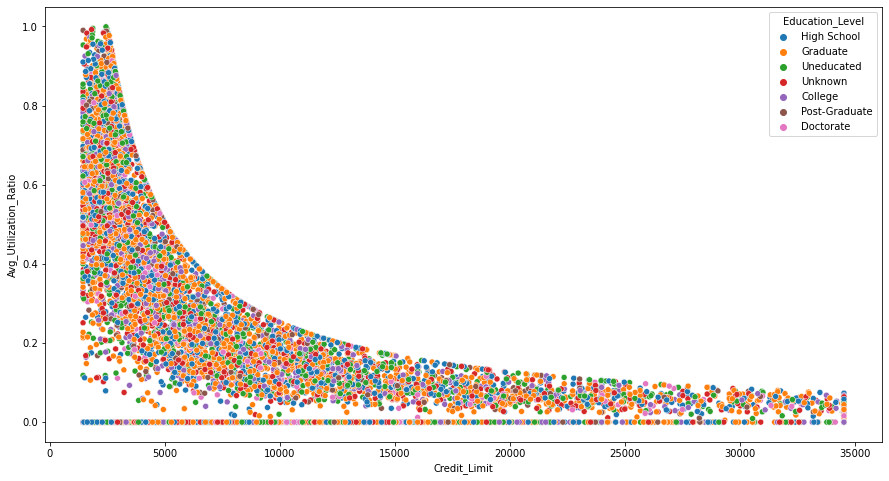

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],hue=df['Education_Level'])
plt.show()

## Pair Plot

In [ ]:
plt.rcParams['figure.figsize']=[20,30]
sns.pairplot(df,diag_kind='kde',hue='Attrition_Flag')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Effect of Attrition Flag on the relationship between Months on Book and Customer Age based on each Marital Status

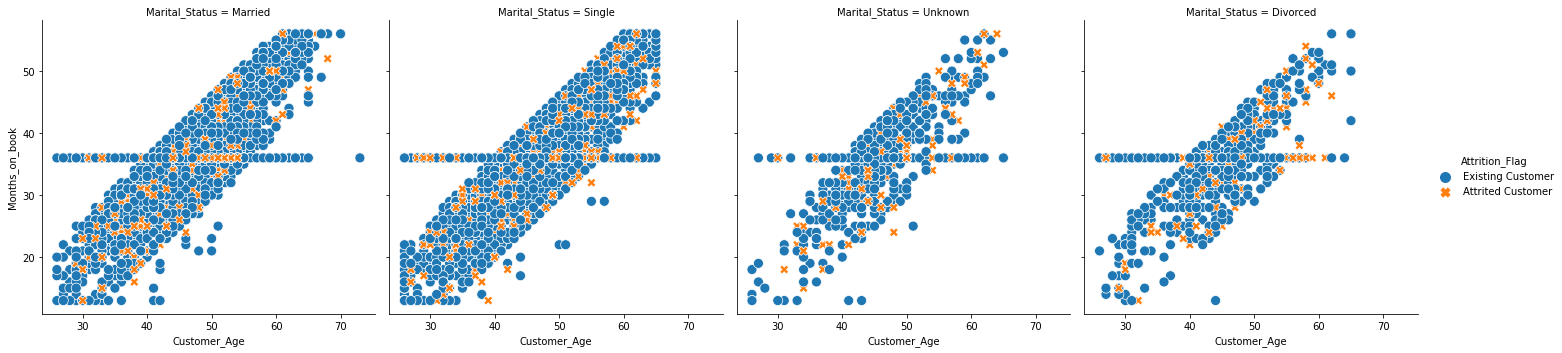

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.relplot(x=df['Customer_Age'],y=df['Months_on_book'],col=df['Marital_Status'],size=df['Attrition_Flag'],style=df['Attrition_Flag'],hue=df['Attrition_Flag'],sizes=(80,100))
plt.show()

In [ ]:
pd.crosstab(df['Marital_Status'],df['Attrition_Flag'])

Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                      121                627
Married                       709               3978
Single                        668               3275
Unknown                       129                620

Inference- From the plots it is clear that married and single customers are the most loyal ones to the company but on the contrary it is also observed that the majority of Attrited Customers come married and single category.

## Effect of Attrition Flag on the relationship between Months on Book and Customer Age based on each card category

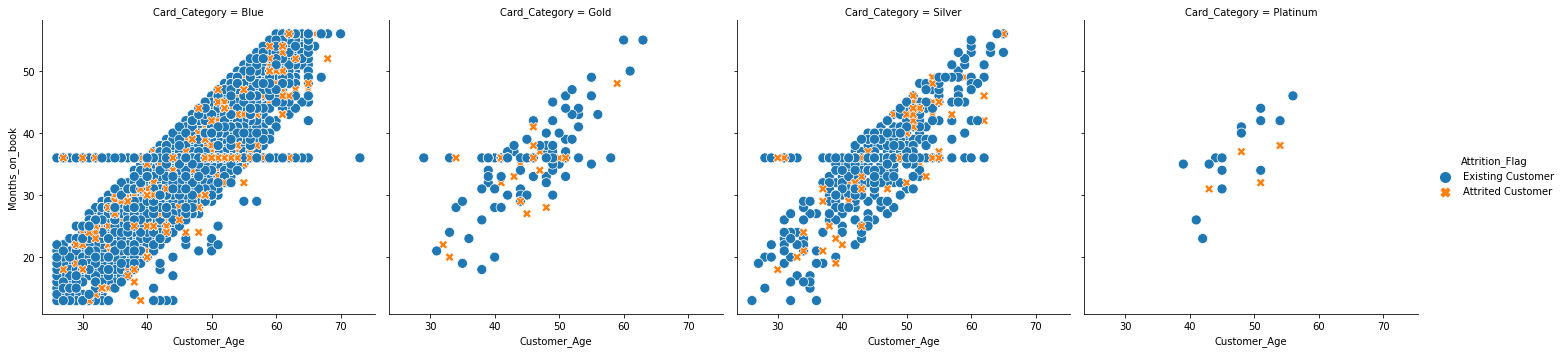

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.relplot(x=df['Customer_Age'],y=df['Months_on_book'],col=df['Card_Category'],size=df['Attrition_Flag'],style=df['Attrition_Flag'],hue=df['Attrition_Flag'],sizes=(80,100))
plt.show()

Inference:
->Blue Card Customers follow the strongest positive relationship between Months on book and Customer Age.
->Only customers aged around 40 to 60 use Platinum Cards.

## Effect of card category on the relationship between Total Transaction Amount and Total Transaction Count

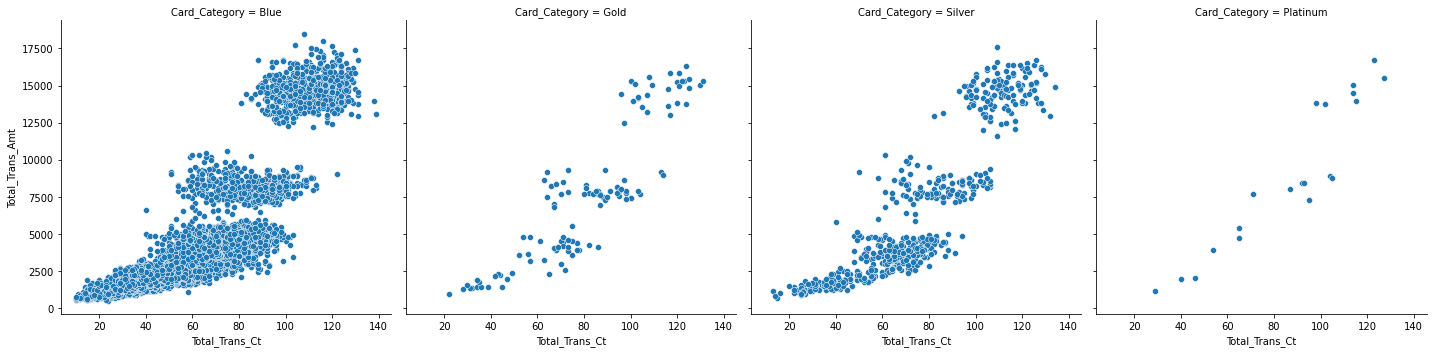

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.relplot(y=df['Total_Trans_Amt'],x=df['Total_Trans_Ct'],col=df['Card_Category'])
plt.show()

Inference-In terms of relationship there is no effect of Card category

# HYPOTHESES STATISTICAL TESTING

In [ ]:
import scipy.stats as st

import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

In [ ]:
# Creating a copy dataframe to use in further steps of Hypothesis Testing
df_new = df.copy()

In [ ]:
# Dropping the redundant features

df_new.drop(['Attrition_Flag', 'Probability_mon_2','Target'],axis=1,inplace = True)

In [ ]:
df_new.head()

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0  768805383            45      M                3     High School   
1  818770008            49      F                5        Graduate   
2  713982108            51      M                3        Graduate   
3  769911858            40      F                4     High School   
4  709106358            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Probability_mon_1  
0                  0.061           0.000093  
1                  0.105           0.000057  
2                  0.000           0.000021  
3                  0.760           0.000134  
4                  0.000           0.000022  

[5 rows x 21 columns]

In [ ]:
# Creating a new feature for Target
df_new.loc[:, 'Target'] = df_new.Probability_mon_1.apply(lambda x: 0 if x<=0.5 else 1)

In [ ]:
df_new.head()

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0  768805383            45      M                3     High School   
1  818770008            49      F                5        Graduate   
2  713982108            51      M                3        Graduate   
3  769911858            40      F                4     High School   
4  709106358            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
0                         5  ...       12691.0                  777   
1                         6  ...        8256.0                  864   
2                         4  ...        3418.0                    0   
3                         3  ...        3313.0                 2517   
4                         5  ...        4716.0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   
3            796.0                 1.405             1171              20   
4           4716.0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Probability_mon_1  Target  
0                1.625                  0.061           0.000093       0  
1                3.714                  0.105           0.000057       0  
2                2.333                  0.000           0.000021       0  
3                2.333                  0.760           0.000134       0  
4                2.500                  0.000           0.000022       0  

[5 rows x 22 columns]

In [ ]:
# Numerical Columns
df_numerical = df_new.select_dtypes(include=np.number)
df_numerical

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Probability_mon_1  Target  
0                    1.625                  0.061           0.000093       0  
1                    3.714                  0.105           0.000057       0  
2                    2.333                  0.000           0.000021       0  
3                    2.333                  0.760           0.000134       0  
4                    2.500                  0.000           0.000022       0  
...                    ...                    ...                ...     ...  
10122                0.857                  0.462           0.000191       0  
10123                0.683                  0.511           0.995270       1  
1012

In [ ]:
# Removing the numerical features which has Categorical Values

df_numerical.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Probability_mon_1', 'Target'],
      dtype='object')

In [ ]:
df_numerical.drop(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], axis=1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_numerical.columns

Index(['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Probability_mon_1', 'Target'],
      dtype='object')

## HYPOTHESES TESTING - NUMERICAL COLUMNS SIGNIFICANCE ON THE TARGET COLUMN

Using a Linear Regression Model to generate p-value of all the Numerical Columns to test the Significance of the columns on the Target Column.

Splitting the Dataset into Dependent and Independent Variable

In [ ]:
X = df_numerical.iloc[:,1:-2]

y = df_numerical.iloc[:,-1]

X2 = sma.add_constant(X)

import statsmodels.api as sm
import pandas as pd 

log_reg = sm.Logit(y, X2).fit()

print(log_reg.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.277013
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10116
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.3715
Time:                        13:18:36   Log-Likelihood:                -2805.3
converged:                      False   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.1383      0.280     21.949      0.000       5.590       6.686
Customer_Age             -0.0077

From the above logistic regression model, we can see that p-value for following columns is less than 0.05. So, we can say that following columns are significant.
- Total_Amt_Chng_Q4_Q1 
- Total_Trans_Amt
- Total_Trans_Ct 
- Total_Ct_Chng_Q4_Q1 

## HYPOTHESES TESTING OF CATEGORICAL COLUMNS SIGNIFICANCE ON THE TARGET COLUMN

Performing Chi Square Contingency Test to check the dependency.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_categorical.columns

categorical_car_to_trasform = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

for c in categorical_car_to_trasform:
    le.fit(df[c])
    df_new[c] = le.transform(df_new[c])
    category_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(category_labels)
    print("====================================================================")

{'F': 0, 'M': 1}
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [ ]:
for var_name in categorical_car_to_trasform:
    print(f"=========================================={var_name}==================================================")
    print(f"H0: {var_name} and Target are independent ")
    print(f"H1: {var_name} and Target are not independent [are dependent] ")
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df_new['Target'],df_new[var_name]))
    prob = 0.95
    alpha = 1.0 - prob
    print('The alpha/significance level = %.3f' % alpha)
    print('The p-value is = %.2f' % p)
    if p <= alpha:
        print('Reject the Null Hypothesis (Reject H0) because p')
        print("Thus we go with")
        print(f"H1: {var_name} and Target are not independent [are dependent] ")
        # print(f"=================================Statically=={var_name}==================================================")
    else:
        print('Accept the Null Hypothesis (Do not reject H0)')
        print("Thus we go with")
        print(f"H0: {var_name} and Target are independent ")

==========================================Gender==================================================
H0: Gender and Target are independent 
H1: Gender and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) because p
Thus we go with
H1: Gender and Target are not independent [are dependent] 
==========================================Education_Level==================================================
H0: Education_Level and Target are independent 
H1: Education_Level and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.05
Accept the Null Hypothesis (Do not reject H0)
Thus we go with
H0: Education_Level and Target are independent 
==========================================Marital_Status==================================================
H0: Marital_Status and Target are independent 
H1: Marital_Status and Target are not independent [are dependent] 
The al

Inference - From the above analysis, we can say that following columns are significantly dependent with the output variable. Gender and Income_Category

## HYPOTHESES TESTING OF NUMERICAL COLUMNS ( HAVING CATEGORIES ) SIGNIFICANCE ON THE TARGET COLUMN

### Assigning the Numerical Columns which have Categories in a Dataframe along with the Output Variable - Target

In [ ]:
df_new_2 = df_new[['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Target']]

df_new_2

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0                    3                         5                       1   
1                    5                         6                       1   
2                    3                         4                       1   
3                    4                         3                       4   
4                    3                         5                       1   
...                ...                       ...                     ...   
10122                2                         3                       2   
10123                2                         4                       2   
10124                1                         5                       3   
10125                2                         4                       3   
10126                2                         6                       2   

       Contacts_Count_12_mon  Target  
0                          3       0  
1                          2       0  
2                          0       0  
3                          1       0  
4                          0       0  
...                      ...     ...  
10122                      3       0  
10123                      3       1  
10124                      4       1  
10125                      3       1  
10126                      4       1  

[10127 rows x 5 columns]

### Encoding all the Columns to Categories using Label Encoder

In [ ]:
num_val_trasform = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for n in num_val_trasform:
    le.fit(df[n])
    df_new_2[n] = le.transform(df_new_2[n])
    category_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(category_labels)
    print("====================================================================")

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


<ipython-input-234-56b31d6063ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_2[n] = le.transform(df_new_2[n])
<ipython-input-234-56b31d6063ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_2[n] = le.transform(df_new_2[n])
<ipython-input-234-56b31d6063ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Performing Chi Square Contingency Test after Encoding the Numerical Columns to Categorical Values

In [ ]:
for var_name in num_val_trasform:
    print(f"=========================================={var_name}==================================================")
    print(f"H0: {var_name} and Target are independent ")
    print(f"H1: {var_name} and Target are not independent [are dependent] ")
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df_new_2['Target'],df_new_2[var_name]))
    prob = 0.95
    alpha = 1.0 - prob
    print('The alpha/significance level = %.3f' % alpha)
    print('The p-value is = %.2f' % p)
    if p <= alpha:
        print('Reject the Null Hypothesis (Reject H0) because p')
        print("Thus we go with")
        print(f"H1: {var_name} and Target are not independent [are dependent] ")
        #print(f"=================================Statically=={var_name}==================================================")
    else:
        print('Accept the Null Hypothesis (Do not reject H0)')
        print("Thus we go with")
        print(f"H0: {var_name} and Target are independent ")

==========================================Dependent_count==================================================
H0: Dependent_count and Target are independent 
H1: Dependent_count and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.09
Accept the Null Hypothesis (Do not reject H0)
Thus we go with
H0: Dependent_count and Target are independent 
==========================================Total_Relationship_Count==================================================
H0: Total_Relationship_Count and Target are independent 
H1: Total_Relationship_Count and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) because p
Thus we go with
H1: Total_Relationship_Count and Target are not independent [are dependent] 
==========================================Months_Inactive_12_mon==================================================
H0: Months_Inactive_12_mon and Target ar

Inference - From the above analysis, we can say that following columns are significantly dependent with the output variable are
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon.

# FEATURE ENGINEERING

In [ ]:
# Copy dataset which would be used for further steps of Feature Engineering and Modelling

df1 = df.copy()
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                  39  ...                  777          11914.0   
1                  44  ...                  864           7392.0   
2                  36  ...                    0           3418.0   
3                  34  ...                 2517            796.0   
4                  21  ...                    0           4716.0   
...               ...  ...                  ...              ...   
10122              40  ...                 1851           2152.0   
10123              25  ...                 2186           2091.0   
10124              36  ...                    0           5409.0   
10125              36  ...                    0           5281.0   
10126              25  ...                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Probability_mon_1  \
0                    1.625                  0.061           0.000093   
1                    3.714                  0.105           0.000057   
2                    2.333                  0.000           0.000021   
3                    2.333                  0.760           0.000134   
4                    2.500                  0.000           0.000022   
...                    ...                    ...                ...   
10122                0.857                  0.462           0.000191   
10123                0.683                  0.511           0.995270   
10124  

# 1. DROPPING REDUNDANT COLUMNS

According to our analysis, we observed that 4 features - Attrition_Flag, Probability_mon_1, Probability_mon_2 and Target are almost the same columns giving similar information about the dataset.

Attrition_Flag - given in database - having categorical value [Existing Customer, Attrited Customer].

Probability_mon_1 - given in database - probability of getting churned [higher the probability, higher the chanced of getting churned.].

Probability_mon_2 - given in database -> 1 - Probability_mon_1.

Target- derived - Probability_mon_1 >0.5 ->1 else 0.

So we are dropping three columns - Attrition_Flag, Probability_mon_2 and Target to reduce the redundancy of information in our dataset.

In [ ]:
df1.drop(['Attrition_Flag','Probability_mon_2','Target'],axis=1,inplace=True)

In [ ]:
df1

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0      768805383            45      M                3     High School   
1      818770008            49      F                5        Graduate   
2      713982108            51      M                3        Graduate   
3      769911858            40      F                4     High School   
4      709106358            40      M                3      Uneducated   
...          ...           ...    ...              ...             ...   
10122  772366833            50      M                2        Graduate   
10123  710638233            41      M                2         Unknown   
10124  716506083            44      F                1     High School   
10125  717406983            30      M                2        Graduate   
10126  714337233            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                             5  ...                      3       12691.0   
1                             6  ...                      2        8256.0   
2                             4  ...                      0        3418.0   
3                             3  ...                      1        3313.0   
4                             5  ...                      0        4716.0   
...                         ...  ...                    ...           ...   
10122                         3  ...                      3        4003.0   
10123                         4  ...                      3        4277.0   
10124                         5  ...                      4        5409.0   
10125                         4  ...                      3        5281.0   
10126                         6  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8

In [ ]:
df1.skew()

<ipython-input-239-da7f0cf1c7b0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
Probability_mon_1           1.848538
dtype: float64

# 2. TRANSFORMING HIGHLY SKEWED FEATURED TO HANDLE THE SKEWNESS

Credit_Limit , Avg_Open_To_Buy , Total_Amt_Chng_Q4_Q1 , Total_Trans_Amt , Total_Ct_Chng_Q4_Q1 , Probability_mon_1  - ARE HIGHLY SKEWED.

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

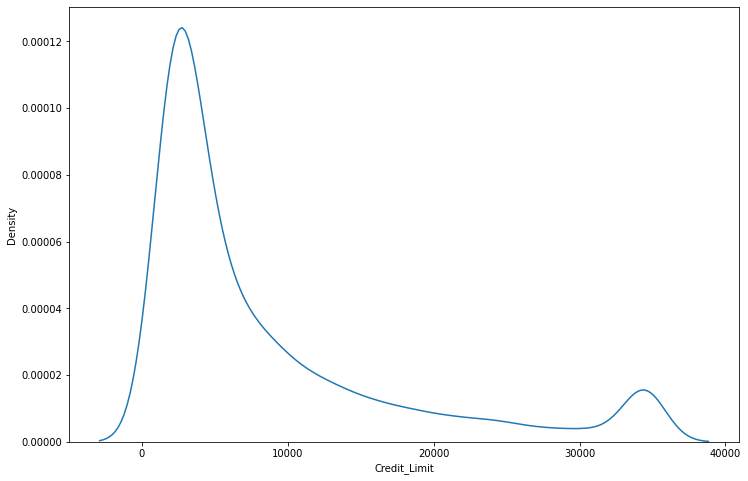

In [ ]:
# Credit_Limit 
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Credit_Limit'])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

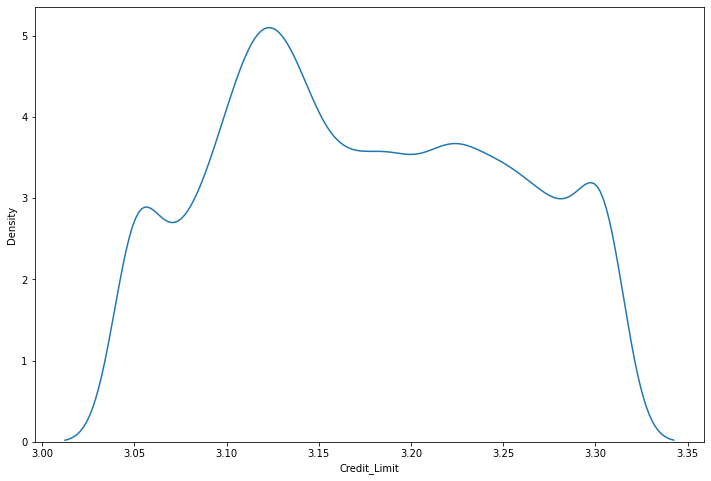

In [ ]:
df1['Credit_Limit'] =  st.boxcox(df1['Credit_Limit'])[0]
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Credit_Limit'])

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

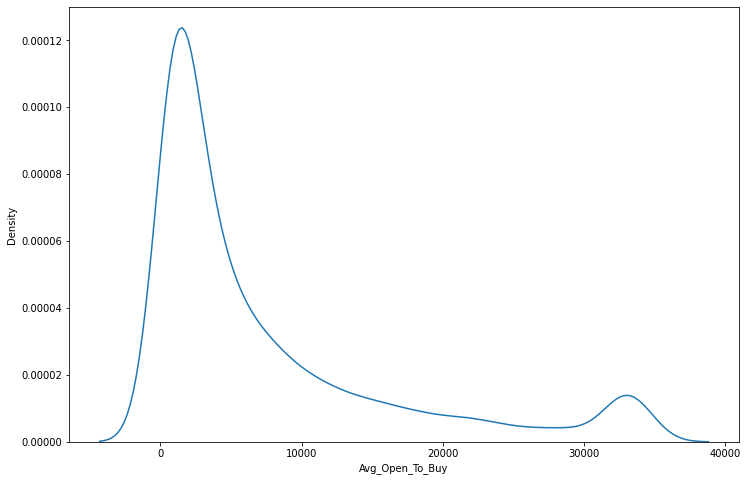

In [ ]:
# Avg_Open_To_Buy 
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Avg_Open_To_Buy'])

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

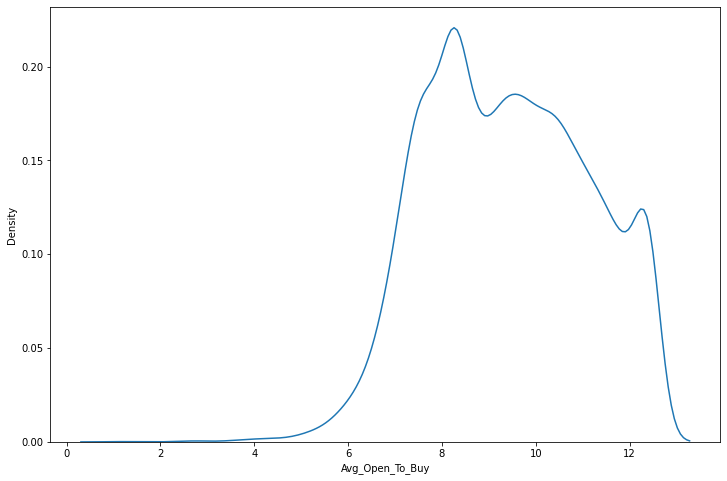

In [ ]:
df1['Avg_Open_To_Buy'] =  st.boxcox(df1['Avg_Open_To_Buy'])[0]
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Avg_Open_To_Buy'])

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Density'>

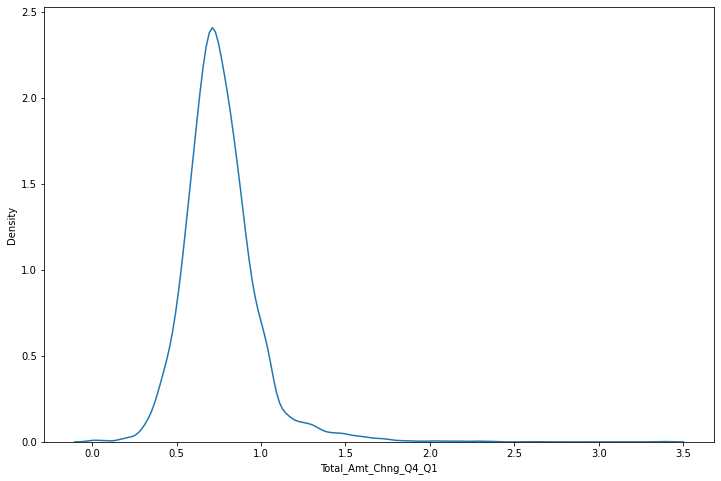

In [ ]:
# Total_Amt_Chng_Q4_Q1
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Amt_Chng_Q4_Q1'])

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Density'>

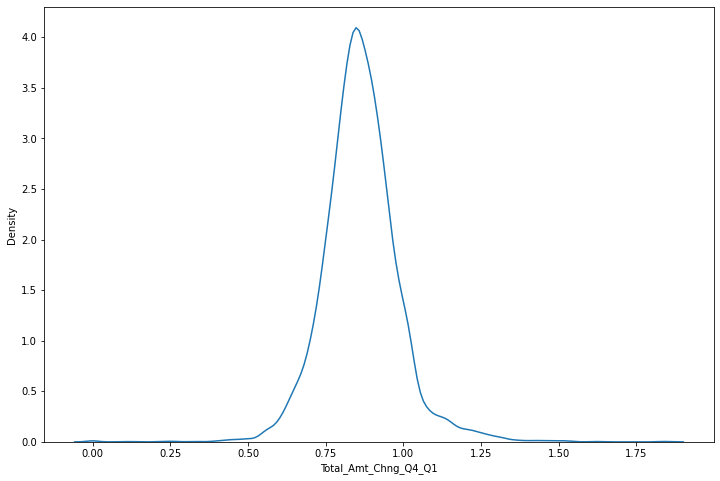

In [ ]:
df1['Total_Amt_Chng_Q4_Q1'] =  np.sqrt(df1['Total_Amt_Chng_Q4_Q1'])
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Amt_Chng_Q4_Q1'])

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

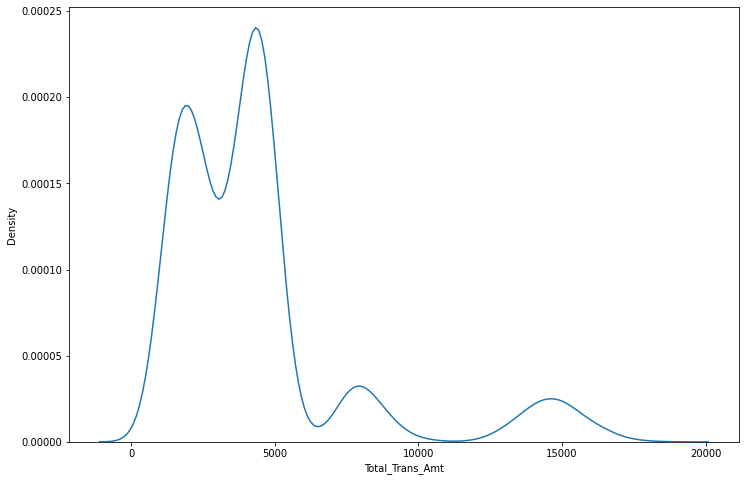

In [ ]:
# Total_Trans_Amt
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Trans_Amt'])

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

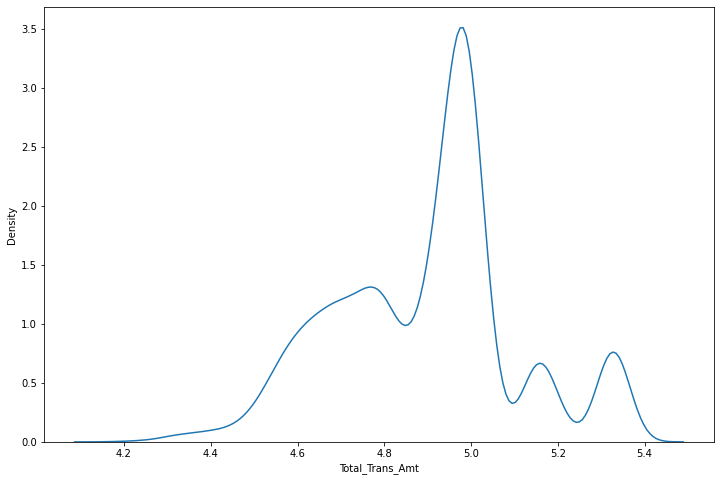

In [ ]:
df1['Total_Trans_Amt'] =  st.boxcox(df1['Total_Trans_Amt'])[0]
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Trans_Amt'])

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

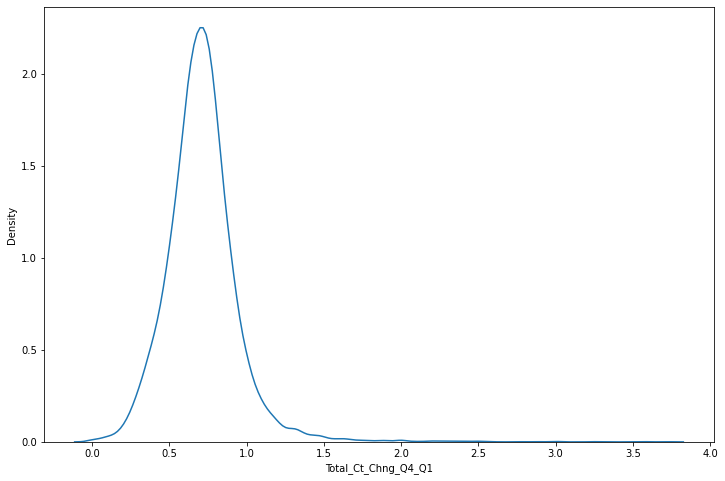

In [ ]:
# Total_Ct_Chng_Q4_Q1
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Ct_Chng_Q4_Q1'])

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

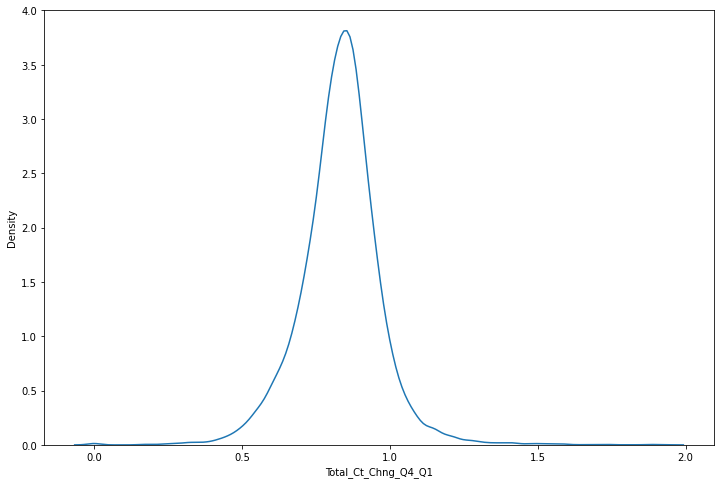

In [ ]:
df1['Total_Ct_Chng_Q4_Q1'] =  np.sqrt(df1['Total_Ct_Chng_Q4_Q1'])
plt.figure(figsize=(12, 8))
sns.kdeplot(df1['Total_Ct_Chng_Q4_Q1'])

In [ ]:
df1.skew()

<ipython-input-250-da7f0cf1c7b0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                0.102921
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy            -0.009088
Total_Amt_Chng_Q4_Q1        0.389287
Total_Trans_Amt             0.002919
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         0.224686
Avg_Utilization_Ratio       0.718008
Probability_mon_1           1.848538
dtype: float64

Hence, we can conclude that the High Skewness of the features have been successfully handled.

# 3. ENCODING THE CATEGORICAL FEATURES

In [ ]:
df_categorical.columns

categorical_car_to_trasform = ['Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category']

### Performing Label Encoding on all Categorical Features

In [ ]:
for c in categorical_car_to_trasform:
    le.fit(df1[c])
    df1[c] = le.transform(df1[c])
    category_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(category_labels)
    print("====================================================================")

{'F': 0, 'M': 1}
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [ ]:
df1

CLIENTNUM  Customer_Age  Gender  Dependent_count  Education_Level  \
0      768805383            45       1                3                3   
1      818770008            49       0                5                2   
2      713982108            51       1                3                2   
3      769911858            40       0                4                3   
4      709106358            40       1                3                5   
...          ...           ...     ...              ...              ...   
10122  772366833            50       1                2                2   
10123  710638233            41       1                2                6   
10124  716506083            44       0                1                3   
10125  717406983            30       1                2                2   
10126  714337233            43       0                2                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0              39   
1                   2                4              0              44   
2                   1                3              0              36   
3                   3                4              0              34   
4                   1                2              0              21   
...               ...              ...            ...             ...   
10122               2                1              0              40   
10123               0                1              0              25   
10124               1                4              0              36   
10125               3                1              0              36   
10126               1                4              3              25   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                             5  ...                      3      3.248734   
1                             6  ...                      2      3.218468   
2                             4  ...                      0      3.143353   
3                             3  ...                      1      3.140331   
4                             5  ...                      0      3.173000   
...                         ...  ...                    ...           ...   
10122                         3  ...                      3      3.158246   
10123                         4  ...                      3      3.164290   
10124                         5  ...                      4      3.184818   
10125                         4  ...                      3      3.182787   
10126                         6  ...                      4      3.235103   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777        10.994246              1.155422   
1                      864        10.349511              1.241370   
2                        0         9.328766              1.610590   
3                     2517         7.469609              1.185327   
4                        0         9.751611              1.474788   
...                    ...              ...                   ...   
10122                 1851         8.728817              0.838451   
10123                 2186         8.691829              0.896660   
10124                    0         9.933068              0.904986   
10125                    0         9.901313              0.731437   
10126                 1961        10.525511              0.838451   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             4.511115              42             1.274755   
1             4.556639              33             1.927174   
2             4.694759              20             1.527416   
3             4.519958              20             1.527416   
4             4.379790              28             1.581139   
...                ...             ...                  ...   
10122         5.342461

# 4. Creating a new feature for Output Variable - Target Feature. 
- Currently we are assuming the threshold as 0.5 as from Business Understanding as we are assuming there is a Medium Probability that customer would churn.

In [ ]:
# Creating a new feature for Target
df1.loc[:, 'Target'] = df1.Probability_mon_1.apply(lambda x: 0 if x<=0.5 else 1)

In [ ]:
df1['Target'].value_counts()

0    8500
1    1627
Name: Target, dtype: int64

In [ ]:
# Dropping Probability_mon_1 feature to avoid redundancy
df1.drop('Probability_mon_1',axis=1,inplace=True)

In [ ]:
df1

CLIENTNUM  Customer_Age  Gender  Dependent_count  Education_Level  \
0      768805383            45       1                3                3   
1      818770008            49       0                5                2   
2      713982108            51       1                3                2   
3      769911858            40       0                4                3   
4      709106358            40       1                3                5   
...          ...           ...     ...              ...              ...   
10122  772366833            50       1                2                2   
10123  710638233            41       1                2                6   
10124  716506083            44       0                1                3   
10125  717406983            30       1                2                2   
10126  714337233            43       0                2                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0              39   
1                   2                4              0              44   
2                   1                3              0              36   
3                   3                4              0              34   
4                   1                2              0              21   
...               ...              ...            ...             ...   
10122               2                1              0              40   
10123               0                1              0              25   
10124               1                4              0              36   
10125               3                1              0              36   
10126               1                4              3              25   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                             5  ...                      3      3.248734   
1                             6  ...                      2      3.218468   
2                             4  ...                      0      3.143353   
3                             3  ...                      1      3.140331   
4                             5  ...                      0      3.173000   
...                         ...  ...                    ...           ...   
10122                         3  ...                      3      3.158246   
10123                         4  ...                      3      3.164290   
10124                         5  ...                      4      3.184818   
10125                         4  ...                      3      3.182787   
10126                         6  ...                      4      3.235103   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777        10.994246              1.155422   
1                      864        10.349511              1.241370   
2                        0         9.328766              1.610590   
3                     2517         7.469609              1.185327   
4                        0         9.751611              1.474788   
...                    ...              ...                   ...   
10122                 1851         8.728817              0.838451   
10123                 2186         8.691829              0.896660   
10124                    0         9.933068              0.904986   
10125                    0         9.901313              0.731437   
10126                 1961        10.525511              0.838451   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             4.511115              42             1.274755   
1             4.556639              33             1.927174   
2             4.694759              20             1.527416   
3             4.519958              20             1.527416   
4             4.379790              28             1.581139   
...                ...             ...                  ...   
10122         5.342461

# SCALLING OF THE NUMERICAL FEATURES

In [ ]:
df1_numerical = df1.select_dtypes(include=np.number)
df1_numerical.head()

CLIENTNUM  Customer_Age  Gender  Dependent_count  Education_Level  \
0  768805383            45       1                3                3   
1  818770008            49       0                5                2   
2  713982108            51       1                3                2   
3  769911858            40       0                4                3   
4  709106358            40       1                3                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0              39   
1               2                4              0              44   
2               1                3              0              36   
3               3                4              0              34   
4               1                2              0              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3      3.248734   
1                         6  ...                      2      3.218468   
2                         4  ...                      0      3.143353   
3                         3  ...                      1      3.140331   
4                         5  ...                      0      3.173000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        10.994246              1.155422   
1                  864        10.349511              1.241370   
2                    0         9.328766              1.610590   
3                 2517         7.469609              1.185327   
4                    0         9.751611              1.474788   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0         4.511115              42             1.274755   
1         4.556639              33             1.927174   
2         4.694759              20             1.527416   
3         4.519958              20             1.527416   
4         4.379790              28             1.581139   

   Avg_Utilization_Ratio  Target  
0                  0.061       0  
1                  0.105       0  
2                  0.000       0  
3                  0.760       0  
4                  0.000       0  

[5 rows x 21 columns]

## Checking the range of the features before Scaling

In [ ]:
for i in df1_numerical.columns:
    print('Minimum Value of',i,'=',df1_numerical[i].min())
    print('Maximum Value of',i,'=',df1_numerical[i].max())

Minimum Value of CLIENTNUM = 708082083
Maximum Value of CLIENTNUM = 828343083
Minimum Value of Customer_Age = 26
Maximum Value of Customer_Age = 73
Minimum Value of Gender = 0
Maximum Value of Gender = 1
Minimum Value of Dependent_count = 0
Maximum Value of Dependent_count = 5
Minimum Value of Education_Level = 0
Maximum Value of Education_Level = 6
Minimum Value of Marital_Status = 0
Maximum Value of Marital_Status = 3
Minimum Value of Income_Category = 0
Maximum Value of Income_Category = 5
Minimum Value of Card_Category = 0
Maximum Value of Card_Category = 3
Minimum Value of Months_on_book = 13
Maximum Value of Months_on_book = 56
Minimum Value of Total_Relationship_Count = 1
Maximum Value of Total_Relationship_Count = 6
Minimum Value of Months_Inactive_12_mon = 0
Maximum Value of Months_Inactive_12_mon = 6
Minimum Value of Contacts_Count_12_mon = 0
Maximum Value of Contacts_Count_12_mon = 6
Minimum Value of Credit_Limit = 3.0485844500472217
Maximum Value of Credit_Limit = 3.3062387

From above analysis, we conclude that the columns which require Scalling are - Customer_Age, Credit_Limit, Total_Revolving_Bal , Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1 , Total_Trans_Amt , Total_Trans_Ct  , Total_Ct_Chng_Q4_Q1  , and Avg_Utilization_Ratio.

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df1['Customer_Age'] = min_max.fit_transform(df1[['Customer_Age']])
df1['Credit_Limit'] = min_max.fit_transform(df1[['Credit_Limit']])
df1['Total_Revolving_Bal'] = min_max.fit_transform(df1[['Total_Revolving_Bal']])
df1['Avg_Open_To_Buy'] = min_max.fit_transform(df1[['Avg_Open_To_Buy']])
df1['Total_Amt_Chng_Q4_Q1'] = min_max.fit_transform(df1[['Total_Amt_Chng_Q4_Q1']])
df1['Total_Trans_Amt'] = min_max.fit_transform(df1[['Total_Trans_Amt']])
df1['Total_Trans_Ct'] = min_max.fit_transform(df1[['Total_Trans_Ct']])
df1['Total_Ct_Chng_Q4_Q1'] = min_max.fit_transform(df1[['Total_Ct_Chng_Q4_Q1']])
df1['Avg_Utilization_Ratio'] = min_max.fit_transform(df1[['Avg_Utilization_Ratio']])
df1['Months_on_book'] = min_max.fit_transform(df1[['Months_on_book']])


### Check the Range of all Scaled Columns 

In [ ]:
for i in df1.columns:
    print('Minimum Value of',i,'=',df1[i].min())
    print('Maximum Value of',i,'=',df1[i].max())

Minimum Value of CLIENTNUM = 708082083
Maximum Value of CLIENTNUM = 828343083
Minimum Value of Customer_Age = 0.0
Maximum Value of Customer_Age = 0.9999999999999999
Minimum Value of Gender = 0
Maximum Value of Gender = 1
Minimum Value of Dependent_count = 0
Maximum Value of Dependent_count = 5
Minimum Value of Education_Level = 0
Maximum Value of Education_Level = 6
Minimum Value of Marital_Status = 0
Maximum Value of Marital_Status = 3
Minimum Value of Income_Category = 0
Maximum Value of Income_Category = 5
Minimum Value of Card_Category = 0
Maximum Value of Card_Category = 3
Minimum Value of Months_on_book = 0.0
Maximum Value of Months_on_book = 1.0
Minimum Value of Total_Relationship_Count = 1
Maximum Value of Total_Relationship_Count = 6
Minimum Value of Months_Inactive_12_mon = 0
Maximum Value of Months_Inactive_12_mon = 6
Minimum Value of Contacts_Count_12_mon = 0
Maximum Value of Contacts_Count_12_mon = 6
Minimum Value of Credit_Limit = 0.0
Maximum Value of Credit_Limit = 1.0
M

Hence, we can conclude that the Range of the Numerical Features has been scaled successfully. 

## INTERIM - Base Model 

Using Logistic Regression Model - 

    - In logistic regression, assumptions are quiet different from the Linear regression model
    - There is no need for a linear relationship between the independent and dependent variables.
    - Appropriate dependent variable structure
    - There is a linear relationship between the logit of the outcome and each independent variable.
    - No Multicollinearity
    - No Influential Outliers
    - Observation Independence    

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=16)

In [ ]:
X_train.shape, y_train.shape

((7595, 20), (7595,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2070,   45],
       [ 192,  225]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not churned', 'churned']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 not churned       0.92      0.98      0.95      2115
     churned       0.83      0.54      0.66       417

    accuracy                           0.91      2532
   macro avg       0.87      0.76      0.80      2532
weighted avg       0.90      0.91      0.90      2532



Inferences - 
- Precision tells us how many of the correctly predicted cases actually turned out to be positive.
- Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
- F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.
- Support is the number of actual occurrences of the class in the specified dataset. 

## Extracting and Saving the Transformed Dataframe to a new Excel File

In [ ]:
# df1.to_csv(r"C:\Users\praty\OneDrive\Desktop\Data Science\Capstone Project\Datasets\Credit Card Customers Prediction\BankChurners_Transformed.csv")